In [383]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.ticker as ticker
from datetime import datetime
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import shap

CPU times: total: 0 ns
Wall time: 8 ms


In [384]:
pd.set_option('display.max_columns', None) #Display all columns
data = pd.read_csv(r"F:\DataScientist_01_Assessment.csv") # Read the data into a DataFrame

In [385]:
data.head()

District    Cluster    Village        HouseHoldID  HouseholdSize  TimeToOPD  \
0  Kanungu  Rutendere   Kangyeyo  KAN-KAN-FER-K1768              3         60   
1  Kanungu    Kihanda  Omurwambu  KAN-OMU-KAN-K4711              3        120   
2  Kanungu   Bujengwe     Byumba  KAN-BYU-ANN-K4055              2         40   
3  Kanungu   Bujengwe     Byumba  KAN-BYU-YUS-K4026              8         15   
4  Kanungu   Bujengwe     Kazahi  KAN-KAZ-FAU-K2057              5        120   

   TimeToWater  AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0         35.0             0.25                    0                    6   
1         10.0             1.00                    2                    3   
2         10.0              NaN                    3                    3   
3         40.0             1.00                    2                    4   
4         51.0             1.00                    2                    2   

   PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0                    1             0        0.000000                0.000000   
1                    3             0        0.000000                0.000000   
2                    2             0        0.000000                0.000000   
3                    4         20000        4.481111                0.000000   
4                    1             0        0.000000               22.405556   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                     0.0         0.000000               3.920972   
1                     0.0         0.000000               0.000000   
2                     0.0         0.000000               0.672167   
3                     0.0         0.000000               6.945722   
4                     0.0        22.405556              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0         0.0           0.000000          45.931389           45.931389   
1         0.0           0.000000          13.219278           13.219278   
2         0.0          43.018667          21.285278           64.303944   
3         0.0         123.230556           3.360833          126.591389   
4         0.0          22.405556           0.896222           23.301778   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0           31.367778              0.0           3.920972         115.500639   
1          103.065556              0.0          57.694306          75.058611   
2           14.787667              0.0          89.398167          55.005639   
3           27.782889              0.0         175.077011          87.381667   
4            0.000000              0.0          67.664778          35.624833   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0          119.421611           109.787222  229.208833   
1          132.752917           170.282222  303.035139   
2          144.403806            34.952667  179.356472   
3          262.458678            62.735556  325.194233   
4          103.289611           197.168889  300.458500   

   

In [386]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 3897
Number of Columns 75


In [387]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 75 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   District                                  3897 non-null   object 
 1   Cluster                                   3897 non-null   object 
 2   Village                                   3897 non-null   object 
 3   HouseHoldID                               3897 non-null   object 
 4   HouseholdSize                             3897 non-null   int64  
 5   TimeToOPD                                 3897 non-null   int64  
 6   TimeToWater                               3897 non-null   float64
 7   AgricultureLand                           3834 non-null   float64
 8   Season1CropsPlanted                       3897 non-null   int64  
 9   Season2CropsPlanted                       3897 non-null   int64  
 10  PerennialCropsGrown                 

In [388]:
#Checking null values
pd.set_option('display.max_columns', None)
data.iloc[:, 0:29].isnull().sum()

District                              0
Cluster                               0
Village                               0
HouseHoldID                           0
HouseholdSize                         0
TimeToOPD                             0
TimeToWater                           0
AgricultureLand                      63
Season1CropsPlanted                   0
Season2CropsPlanted                   0
PerennialCropsGrown                   0
VSLA_Profits                          0
VSLA_Profits.1                        0
Season1VegetableIncome                0
Season2VegatableIncome                0
VegetableIncome                       0
Season1VegetableValue                 0
Season2VegetableValue                 0
SeasonalVegetableValue                0
FormalEmployment                      0
PersonalBusinessAndSelfEmployment     0
CasualLabour                          0
RemittancesAndGifts                   0
RentIncome                            0
Season1CropIncome                     0


In [389]:
#Checking %age of null values compared to the whole dataset
data.iloc[:, 0:29].isnull().sum()*100 / len(data)

District                             0.000000
Cluster                              0.000000
Village                              0.000000
HouseHoldID                          0.000000
HouseholdSize                        0.000000
TimeToOPD                            0.000000
TimeToWater                          0.000000
AgricultureLand                      1.616628
Season1CropsPlanted                  0.000000
Season2CropsPlanted                  0.000000
PerennialCropsGrown                  0.000000
VSLA_Profits                         0.000000
VSLA_Profits.1                       0.000000
Season1VegetableIncome               0.000000
Season2VegatableIncome               0.000000
VegetableIncome                      0.000000
Season1VegetableValue                0.000000
Season2VegetableValue                0.000000
SeasonalVegetableValue               0.000000
FormalEmployment                     0.000000
PersonalBusinessAndSelfEmployment    0.000000
CasualLabour                      

In [390]:
#Checking null values, 30 t0 58  columns
pd.set_option('display.max_columns', None)
data.iloc[:, 29:58].isnull().sum()

Season1AgricValue                              0
Season2AgricValue                              0
SeasonalAgricValue                             0
PerennialAgricValue                            0
AgricValue                                     0
LivestockIncomeConsumed                        0
LivestockAssetValue                            0
HouseholdIcome                                 0
Consumption+Residues                           0
HHIncome+Consumption+Residues                  0
HHIncome+Consumption+Assets+Residues           0
Assets                                         0
Assets.1                                       0
HHIncome/Day                                   0
Consumption/Day                                0
HHIncome+Consumption+Residues/Day              0
HHIncome+Consumption+Assets+Residues/Day       0
hhh_sex                                        0
hhh_read_write                                 0
Material_walls                                 0
radios_owned        

In [391]:
#Checking %age of null values compared to the whole dataset
data.iloc[:, 29:58].isnull().sum()*100 / len(data)

Season1AgricValue                            0.000000
Season2AgricValue                            0.000000
SeasonalAgricValue                           0.000000
PerennialAgricValue                          0.000000
AgricValue                                   0.000000
LivestockIncomeConsumed                      0.000000
LivestockAssetValue                          0.000000
HouseholdIcome                               0.000000
Consumption+Residues                         0.000000
HHIncome+Consumption+Residues                0.000000
HHIncome+Consumption+Assets+Residues         0.000000
Assets                                       0.000000
Assets.1                                     0.000000
HHIncome/Day                                 0.000000
Consumption/Day                              0.000000
HHIncome+Consumption+Residues/Day            0.000000
HHIncome+Consumption+Assets+Residues/Day     0.000000
hhh_sex                                      0.000000
hhh_read_write              

In [392]:
#Checking null values, 30 t0 58  columns
pd.set_option('display.max_columns', None)
data.iloc[:, 58:75].isnull().sum()

daily_meals                         0
latrine_constructed                 0
tippy_tap_available                 0
soap_ash_available                  0
standard_hangline                   0
kitchen_house                       0
bathroom_constructed                0
swept_compound                      0
dish_rack_present                   0
composts                            0
non_bio_waste_mgt_present           0
apply_liquid_manure                 0
organic_pesticide_expenditure    3214
water_control_practise              0
soil_management                     0
food_banana_wilt_diseases        1348
postharvest_food_storage            0
dtype: int64

In [393]:

data.iloc[:, 58:75].isnull().sum()*100 / len(data)

daily_meals                       0.000000
latrine_constructed               0.000000
tippy_tap_available               0.000000
soap_ash_available                0.000000
standard_hangline                 0.000000
kitchen_house                     0.000000
bathroom_constructed              0.000000
swept_compound                    0.000000
dish_rack_present                 0.000000
composts                          0.000000
non_bio_waste_mgt_present         0.000000
apply_liquid_manure               0.000000
organic_pesticide_expenditure    82.473698
water_control_practise            0.000000
soil_management                   0.000000
food_banana_wilt_diseases        34.590711
postharvest_food_storage          0.000000
dtype: float64

In [394]:
# Filter columns where null values is greater than 0
null_percentage = data.isnull().sum() * 100 / len(data)
columns_with_null_values = null_percentage[null_percentage > 0].index
print(columns_with_null_values)

Index(['AgricultureLand', 'business_number', 'Loan_from',
       'organic_pesticide_expenditure', 'food_banana_wilt_diseases'],
      dtype='object')


In [395]:
#Call only columns with null values
columns_with_null_data = data[columns_with_null_values]
columns_with_null_data.head()

AgricultureLand business_number Loan_from  organic_pesticide_expenditure  \
0             0.25               0       NaN                            NaN   
1             1.00               0       NaN                            NaN   
2              NaN               0         7                            NaN   
3             1.00             NaN         7                            NaN   
4             1.00             NaN       NaN                            NaN   

  food_banana_wilt_diseases  
0                       NaN  
1                         2  
2                       1 2  
3                         2  
4                       NaN

In [396]:
columns_with_null_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AgricultureLand                3834 non-null   float64
 1   business_number                3872 non-null   object 
 2   Loan_from                      863 non-null    object 
 3   organic_pesticide_expenditure  683 non-null    float64
 4   food_banana_wilt_diseases      2549 non-null   object 
dtypes: float64(2), object(3)
memory usage: 152.4+ KB


In [397]:
#Filling Missing Values, Mean and mode Used
data['AgricultureLand'] = data['AgricultureLand'].fillna(value=data['AgricultureLand'].mean())
data['business_number'] = data['business_number'].fillna(value=data['business_number'].mode()[0])
data['Loan_from'] = data['Loan_from'].fillna(value=data['Loan_from'].mode()[0])
data['organic_pesticide_expenditure'] = data['organic_pesticide_expenditure'].fillna(value=data['organic_pesticide_expenditure'].mean())
data['food_banana_wilt_diseases'] = data['food_banana_wilt_diseases'].fillna(value=data['food_banana_wilt_diseases'].mode()[0])

In [398]:
#Checking null values again after transformations
pd.set_option('display.max_columns', None)
data.isnull().sum()

District                         0
Cluster                          0
Village                          0
HouseHoldID                      0
HouseholdSize                    0
                                ..
organic_pesticide_expenditure    0
water_control_practise           0
soil_management                  0
food_banana_wilt_diseases        0
postharvest_food_storage         0
Length: 75, dtype: int64

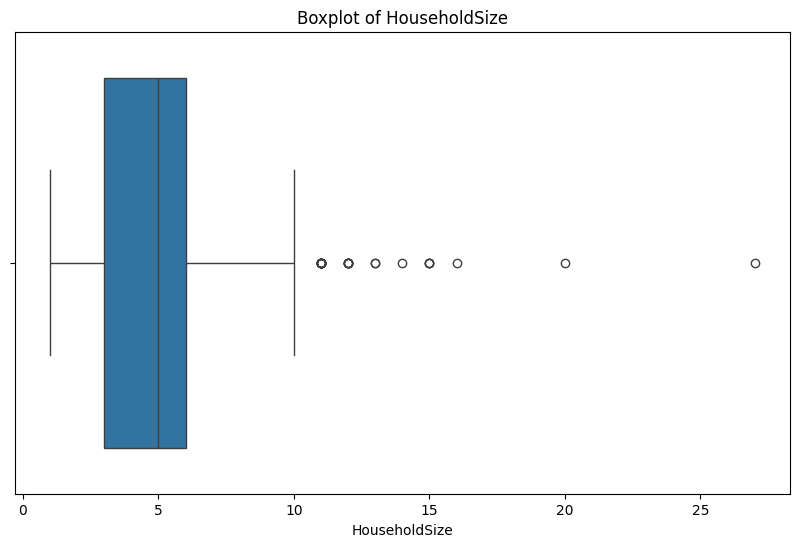

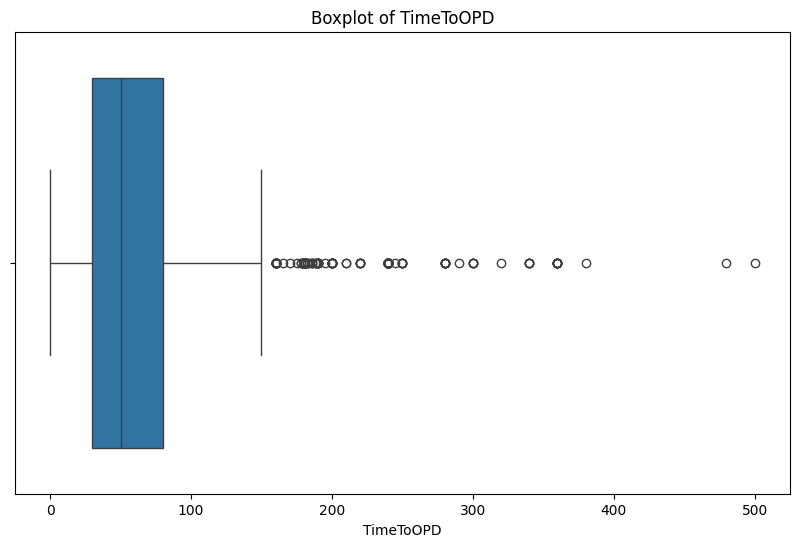

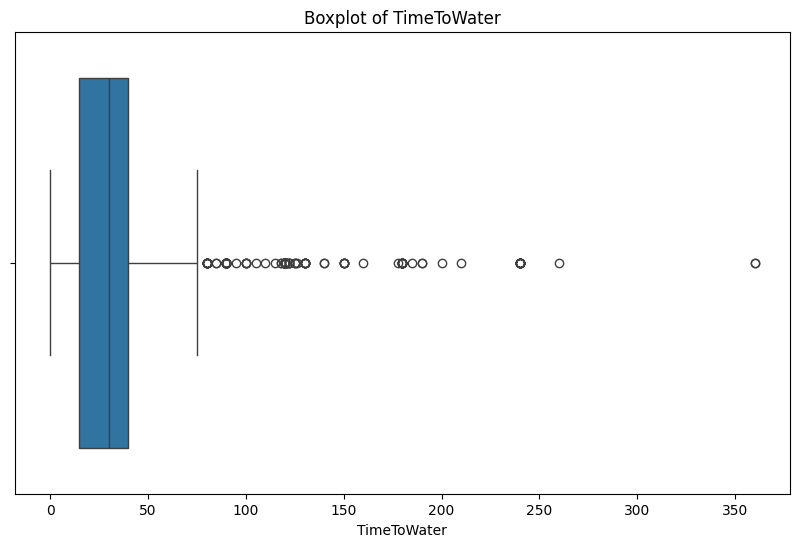

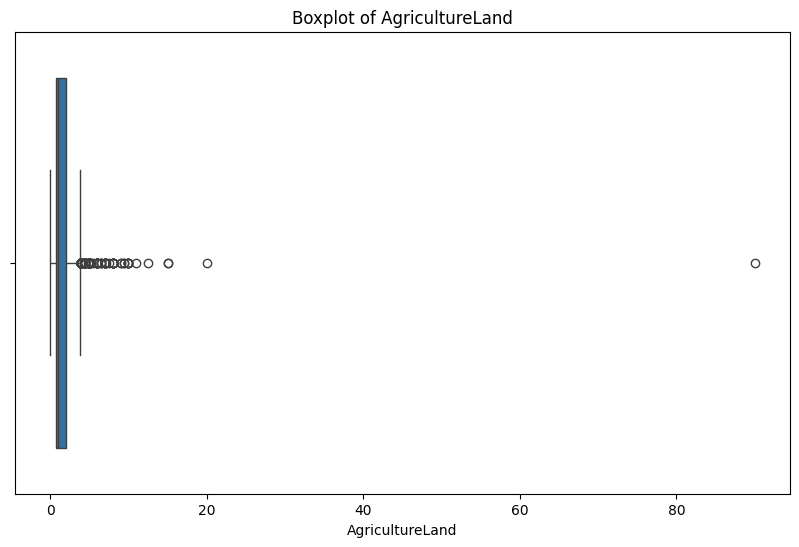

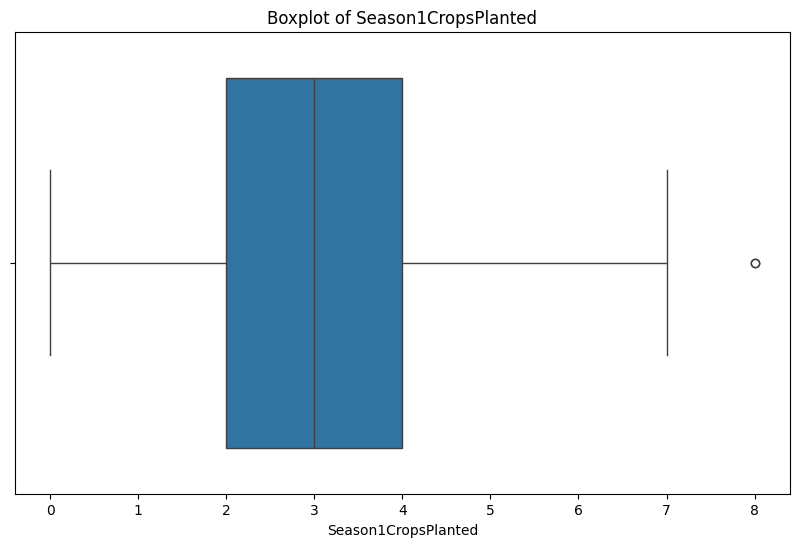

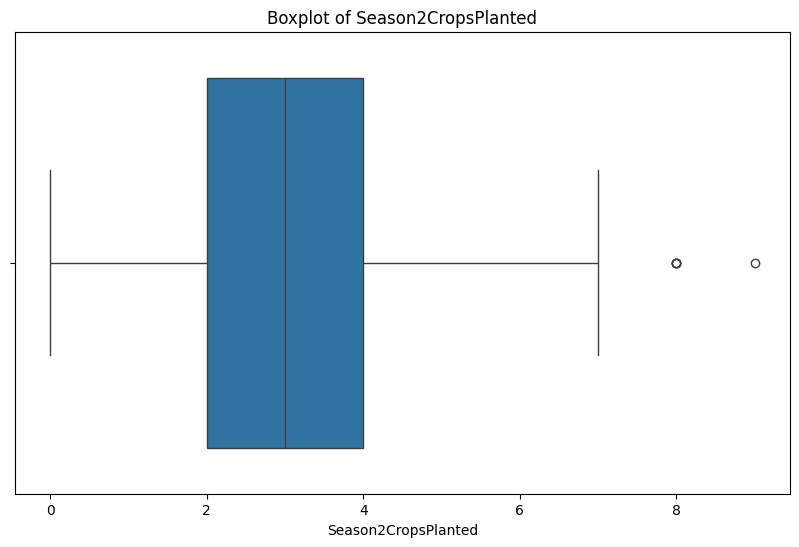

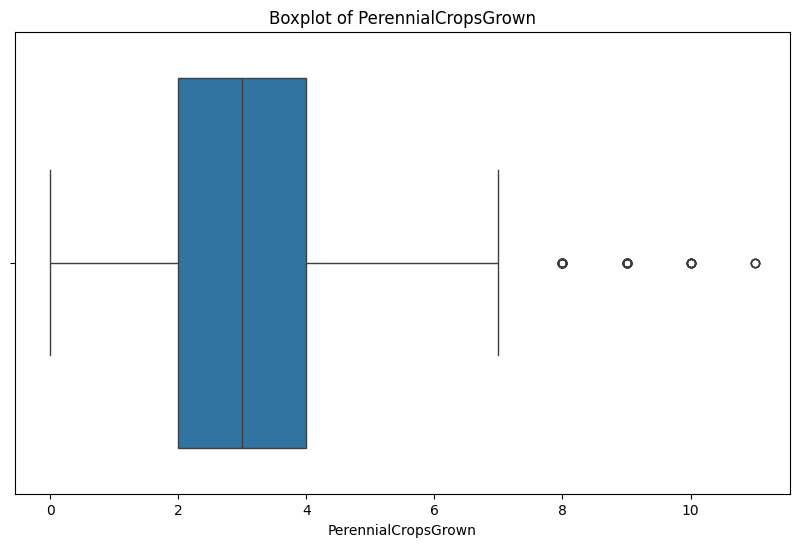

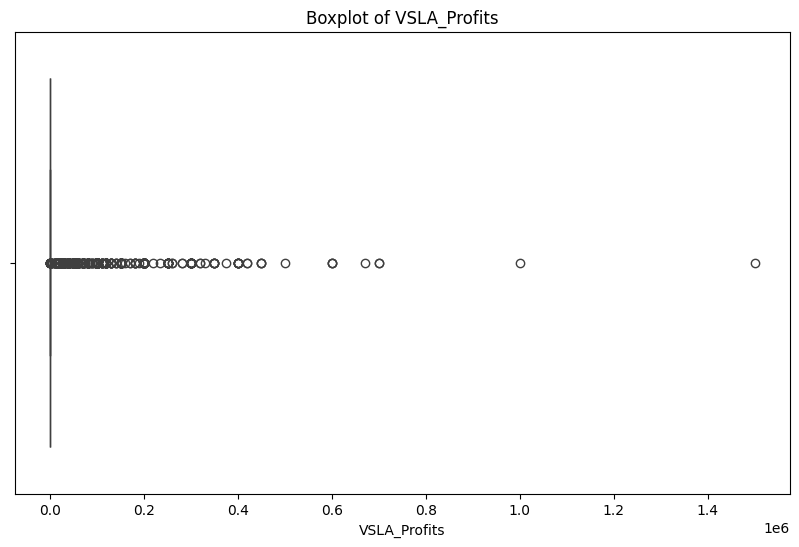

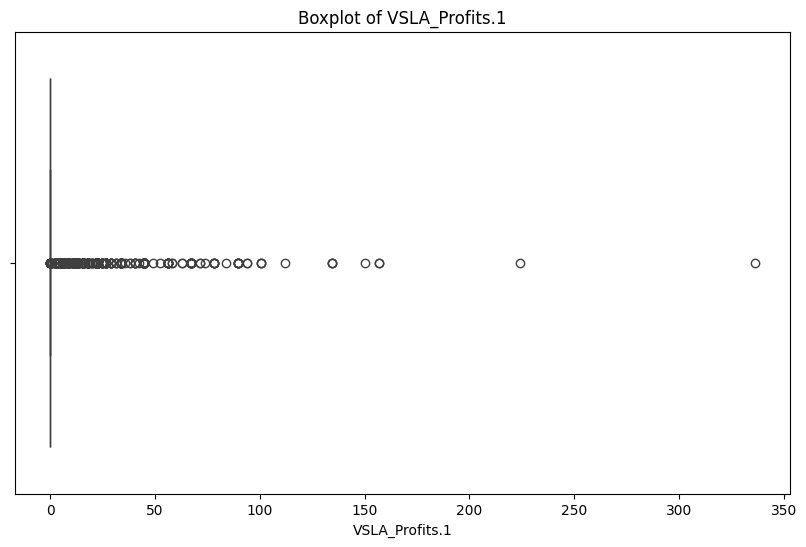

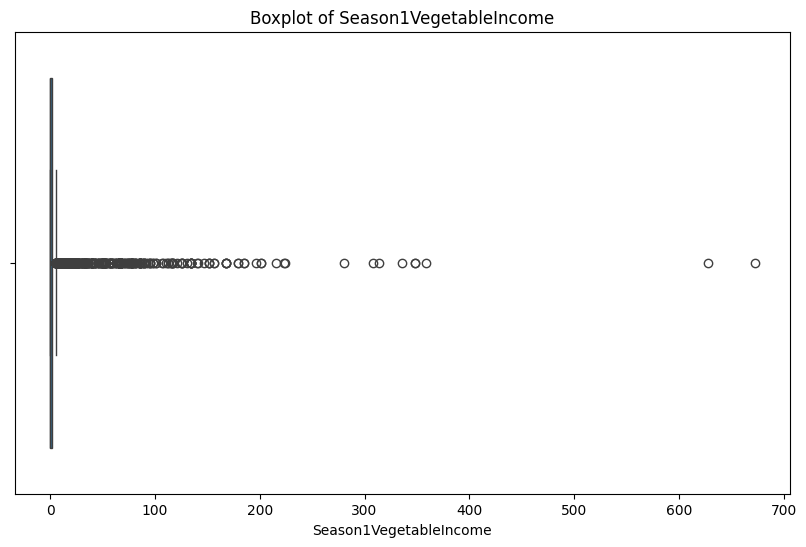

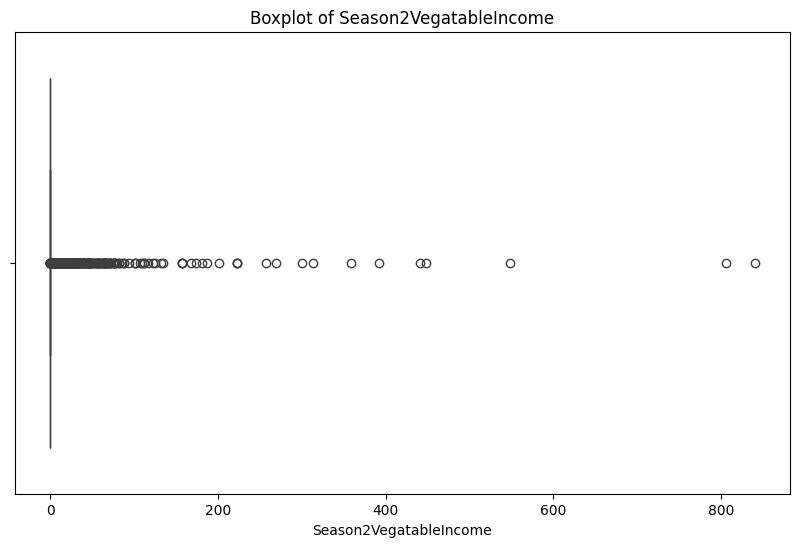

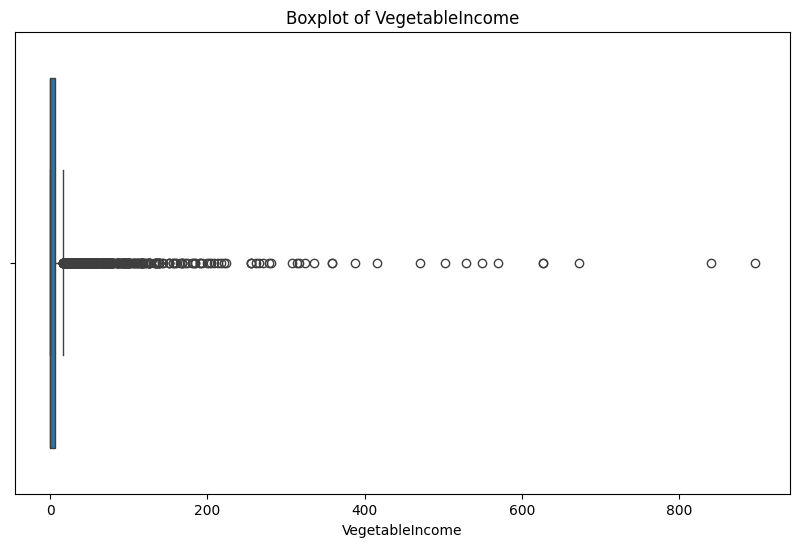

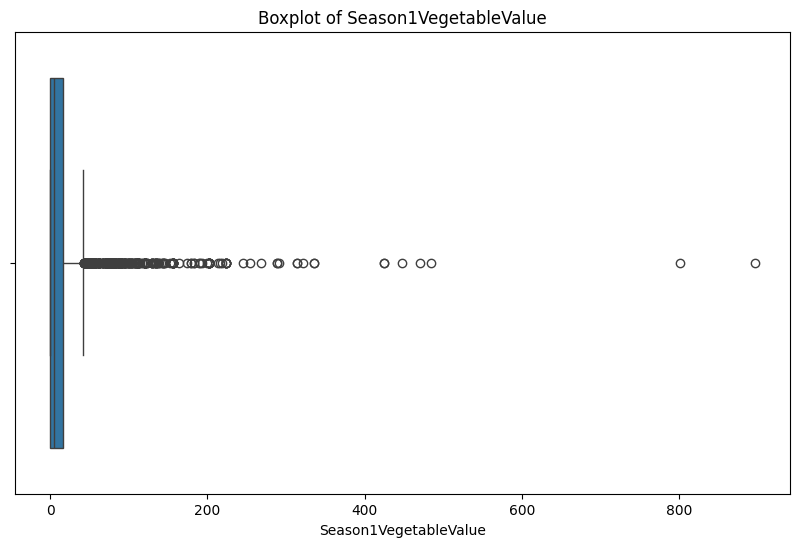

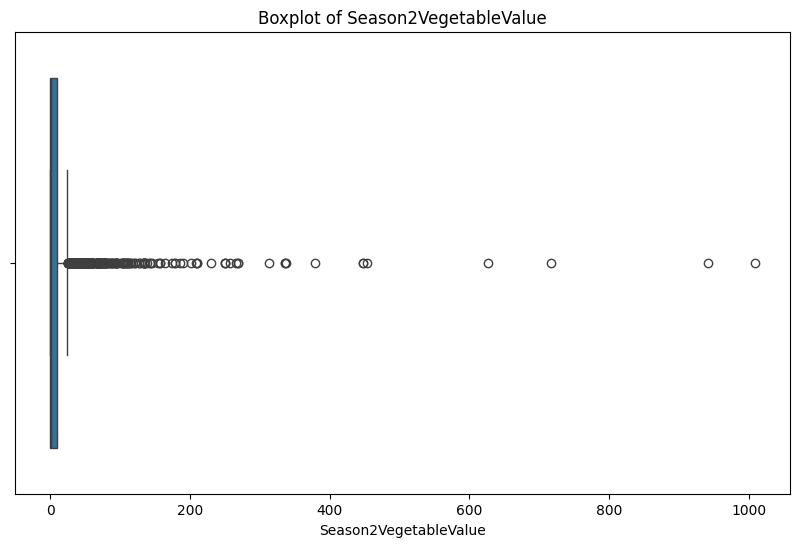

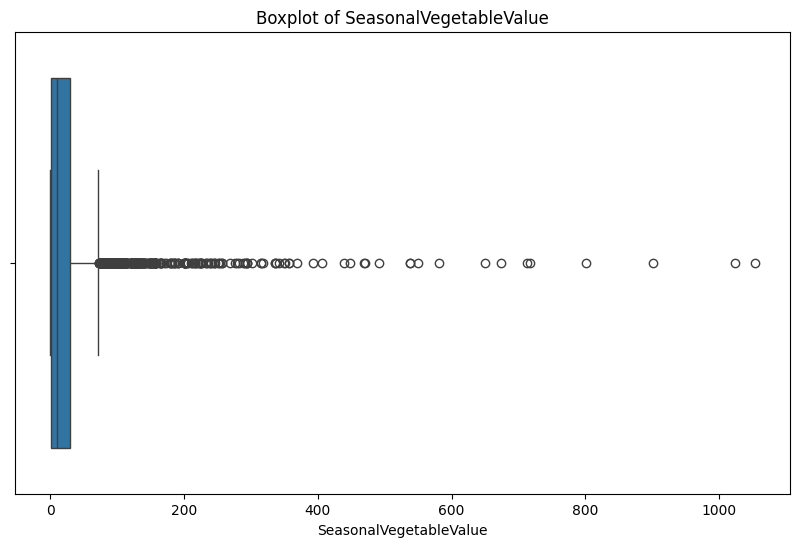

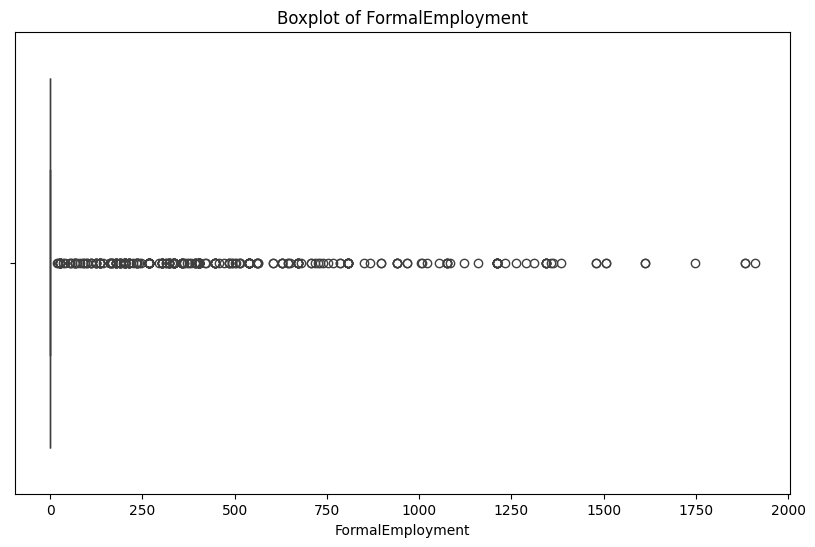

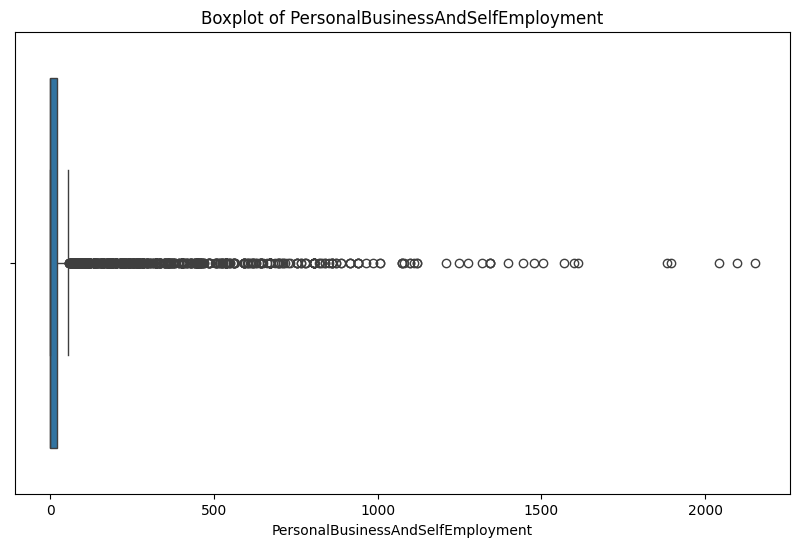

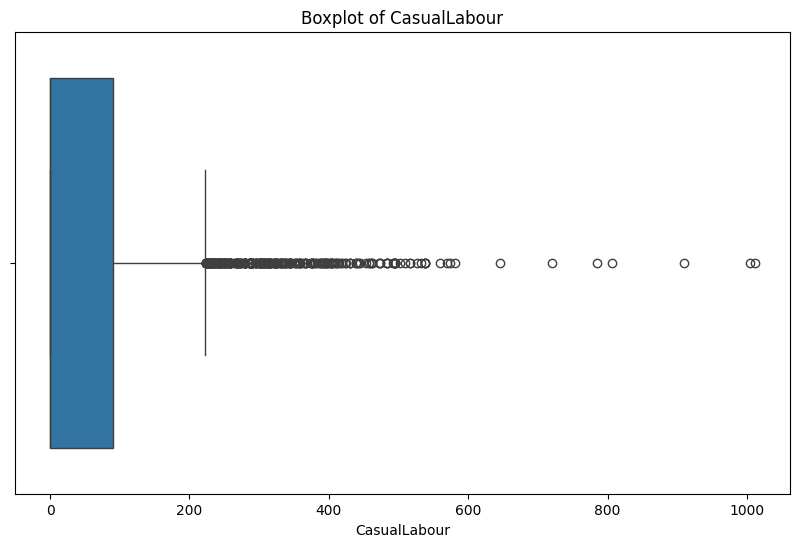

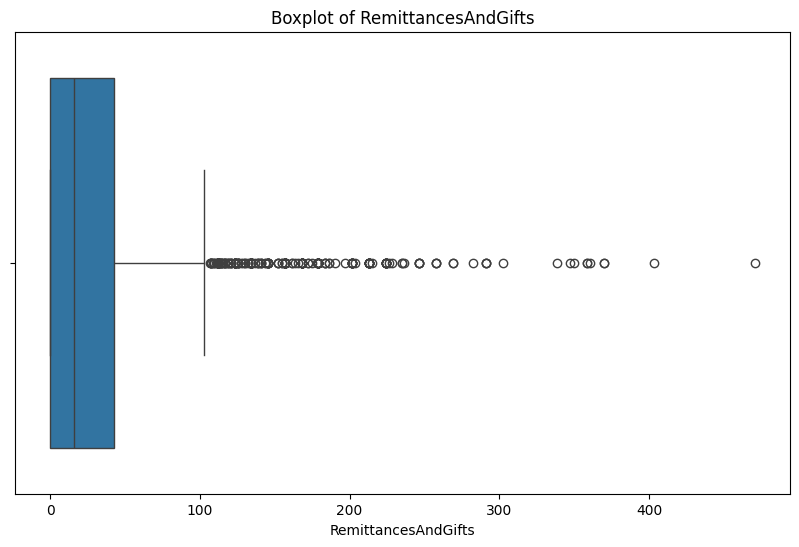

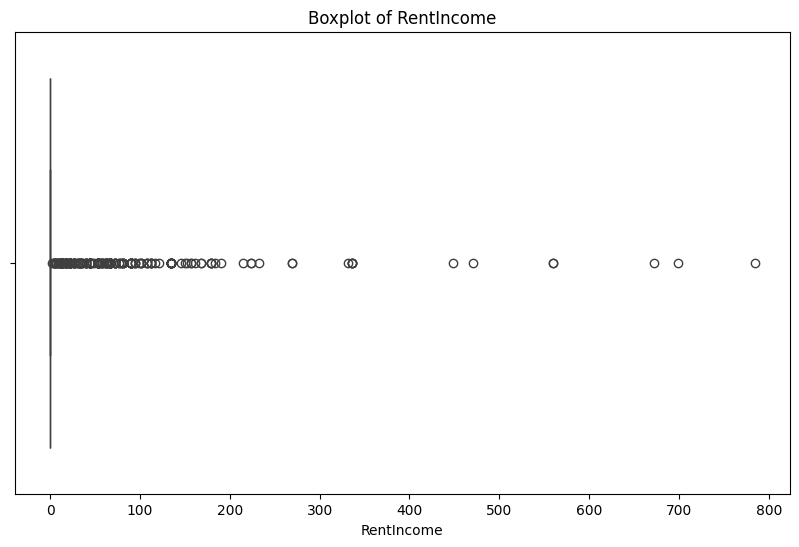

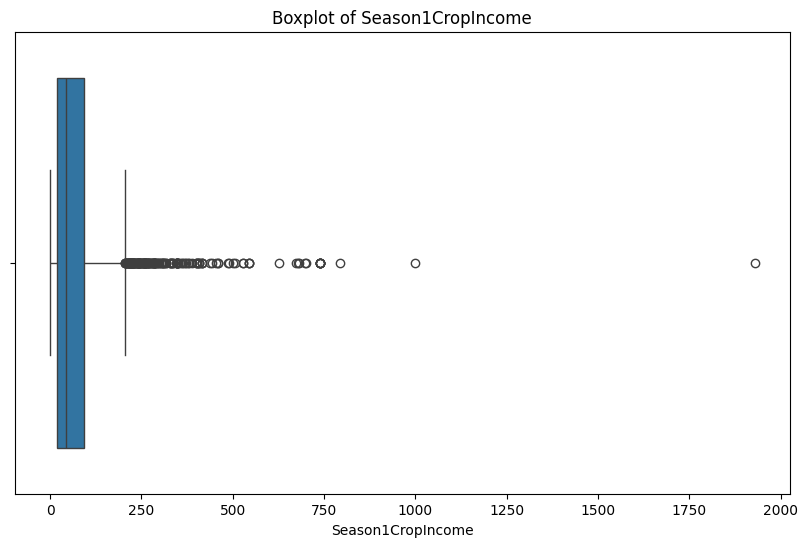

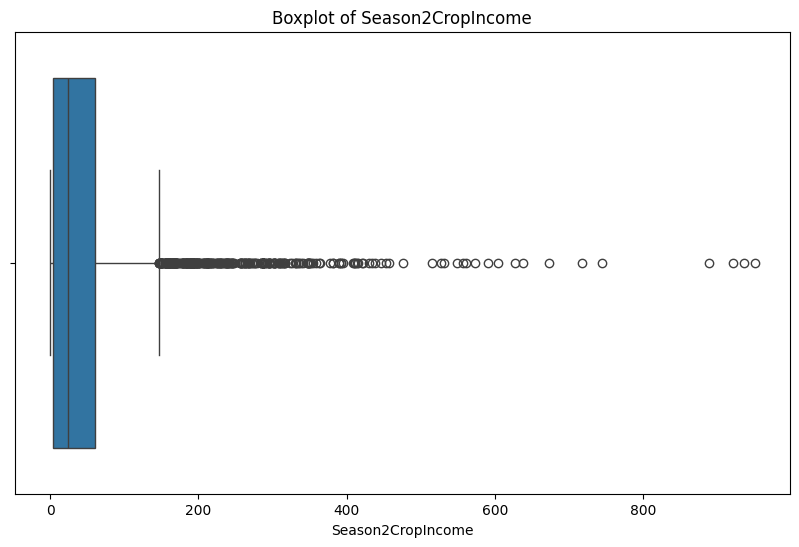

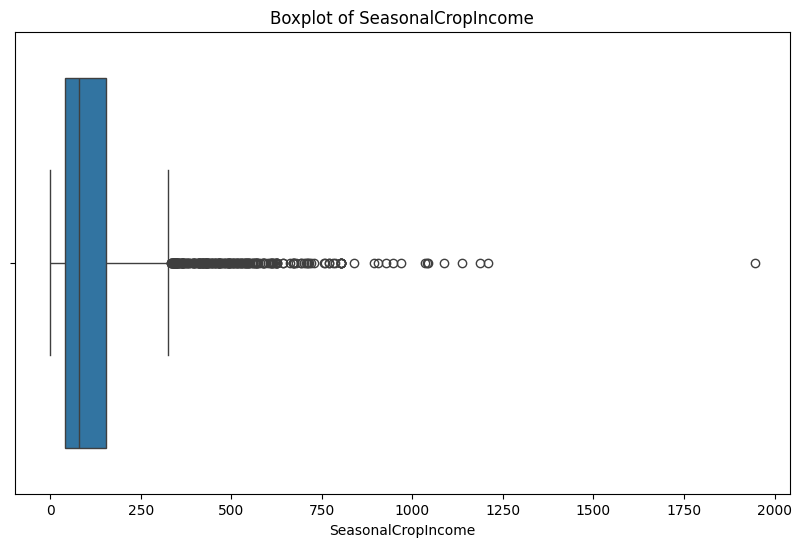

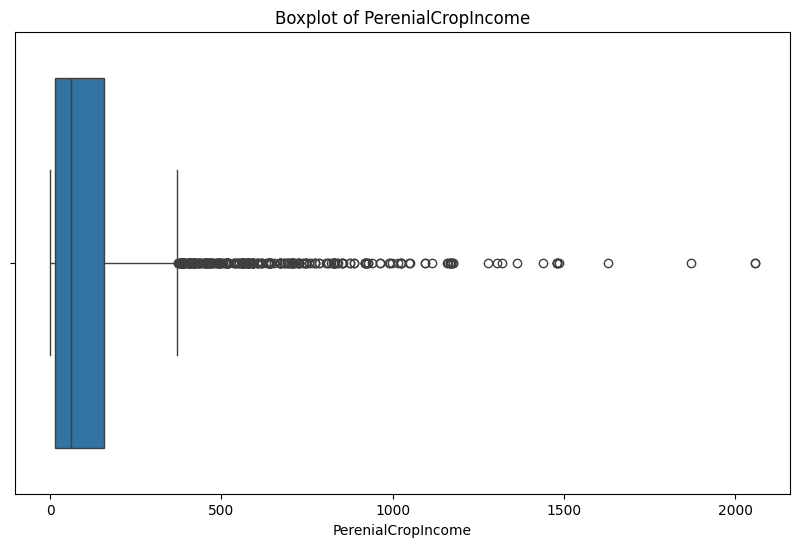

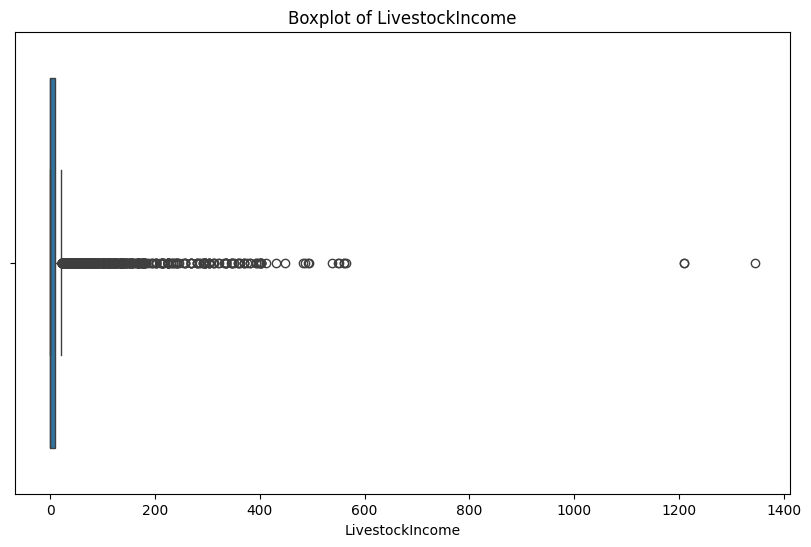

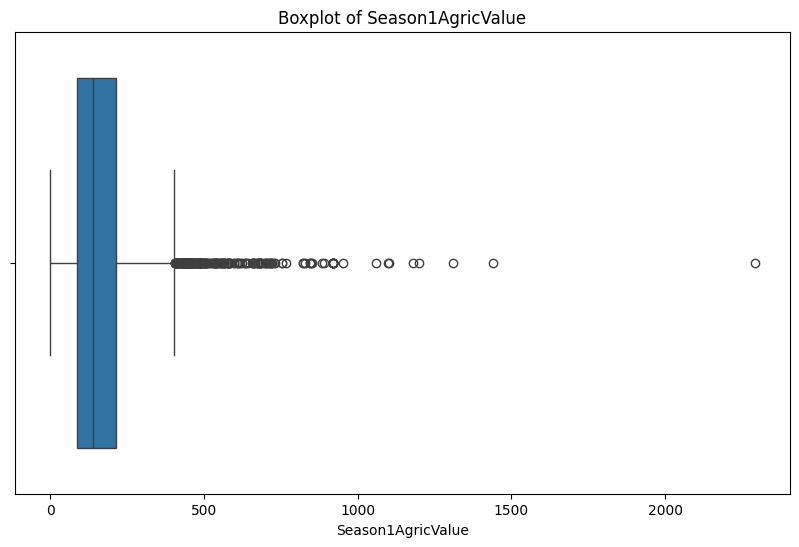

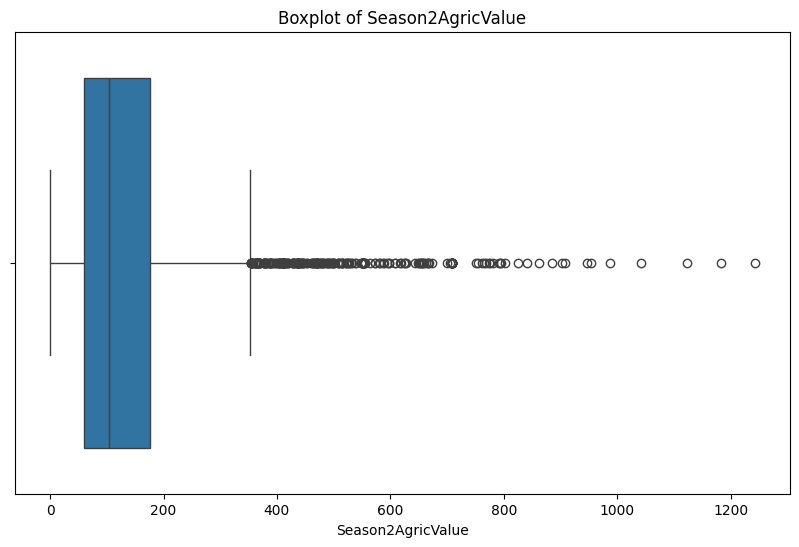

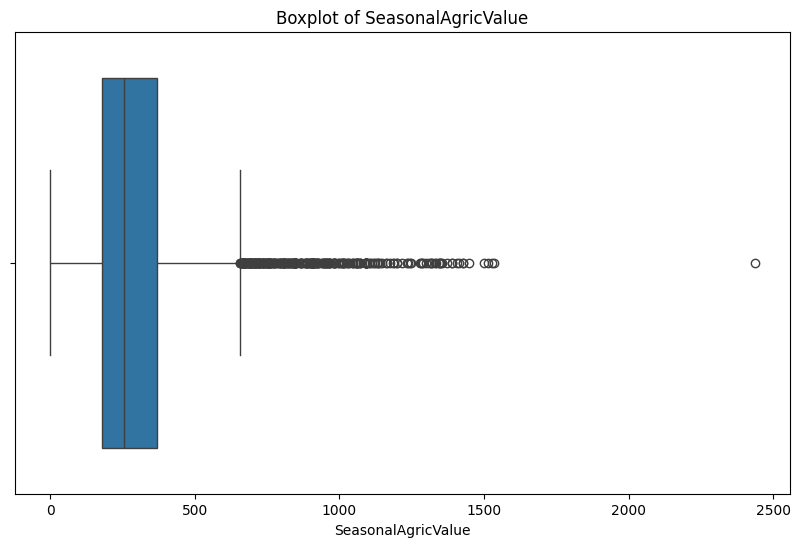

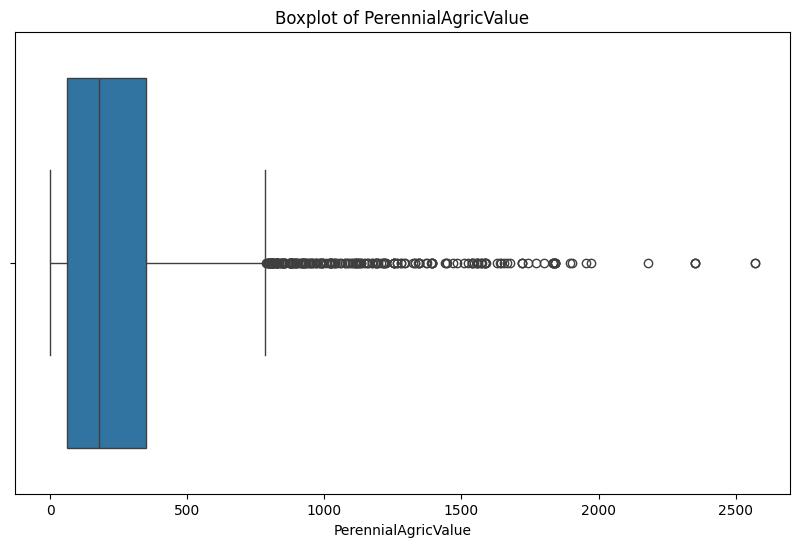

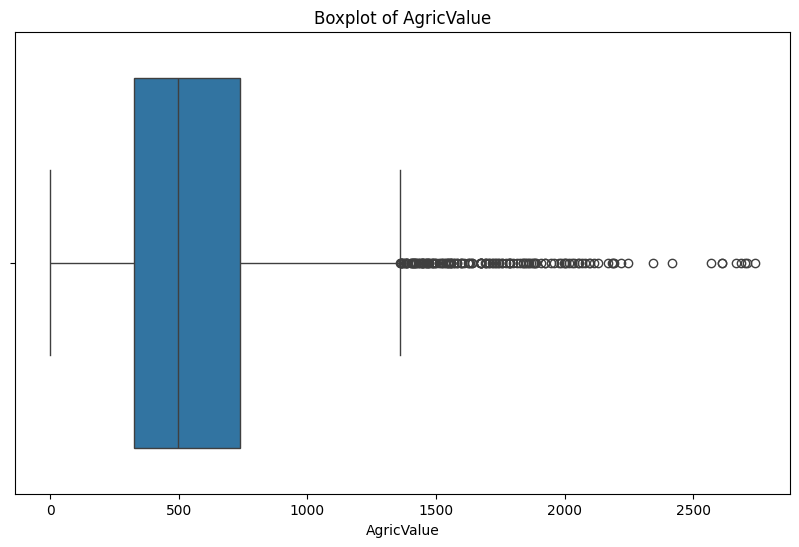

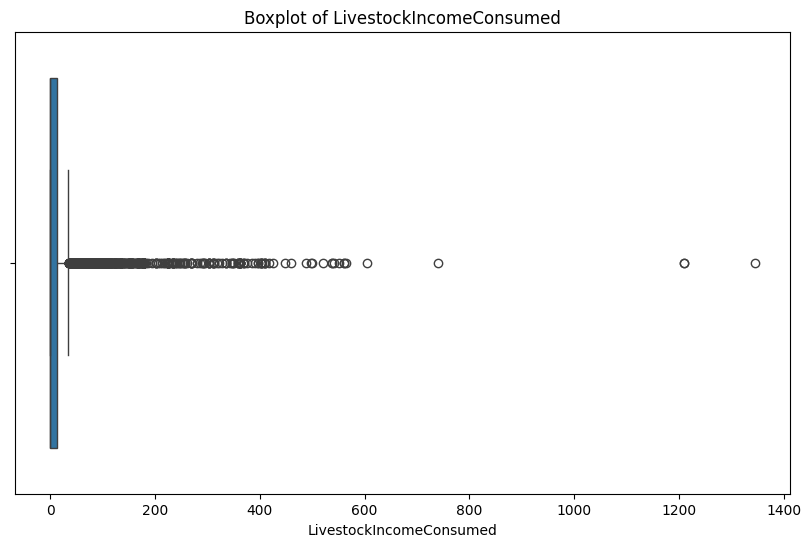

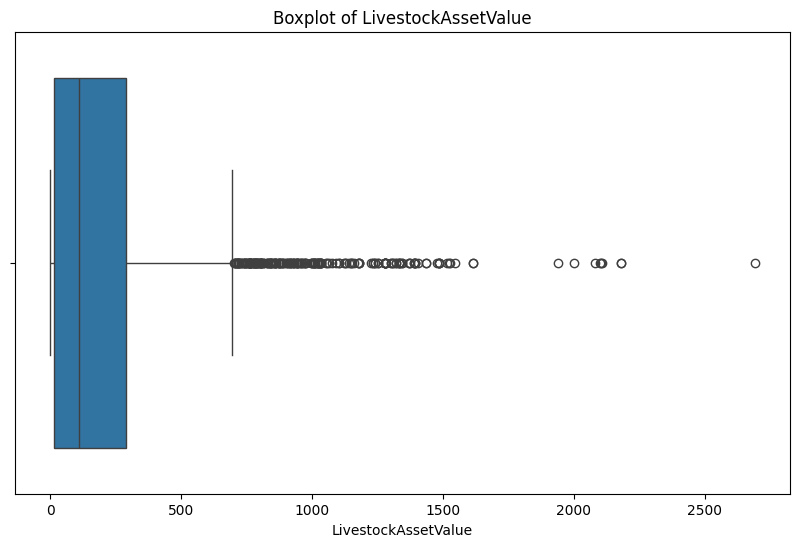

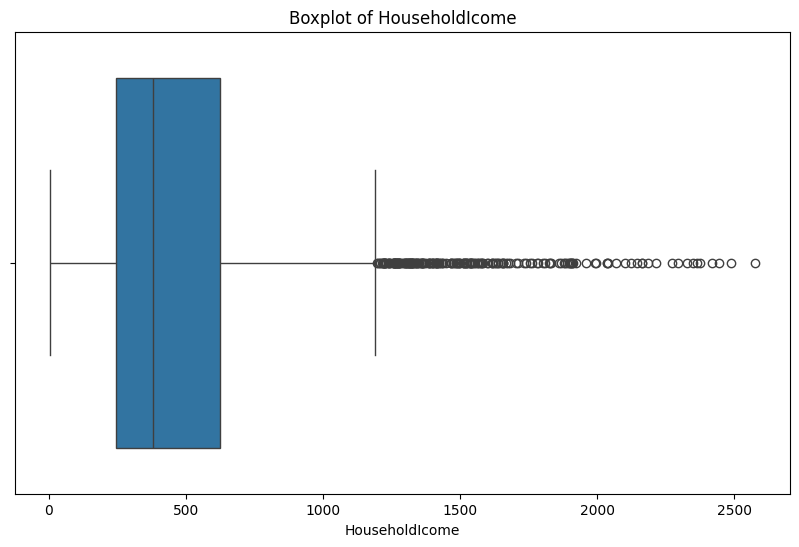

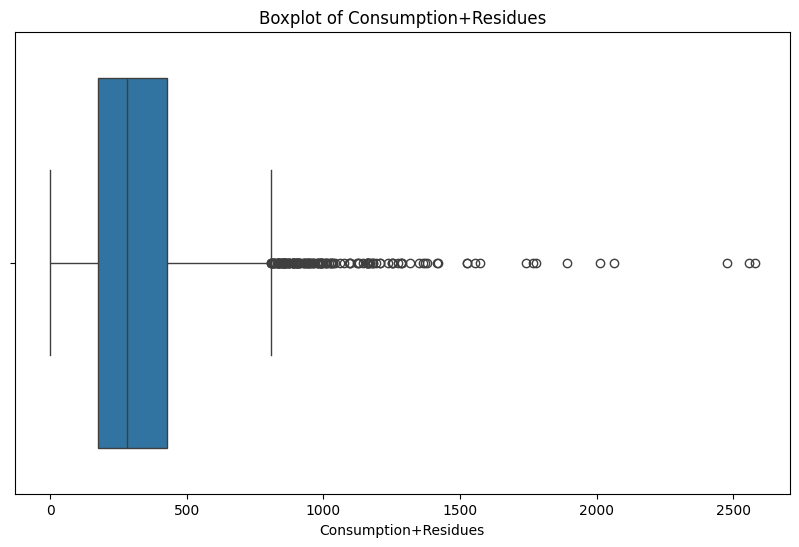

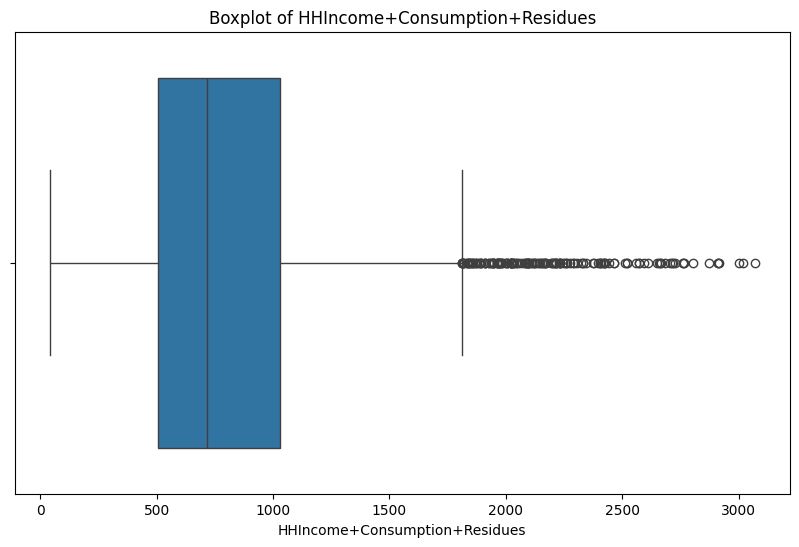

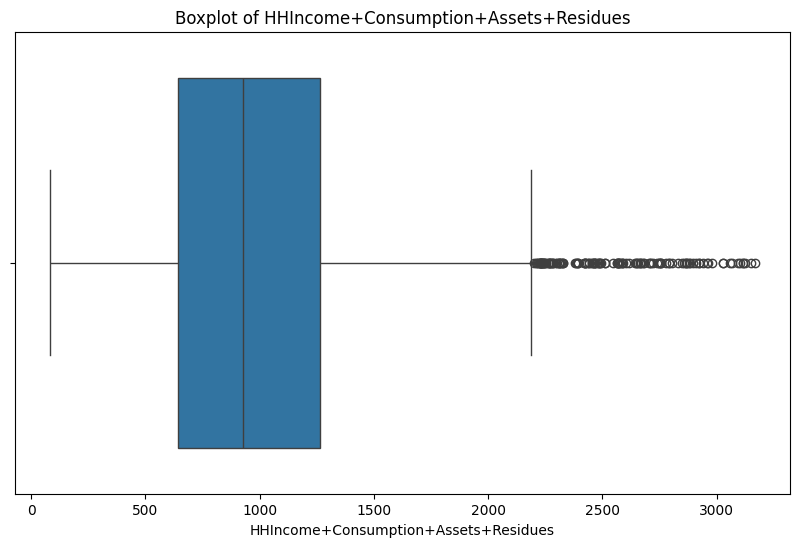

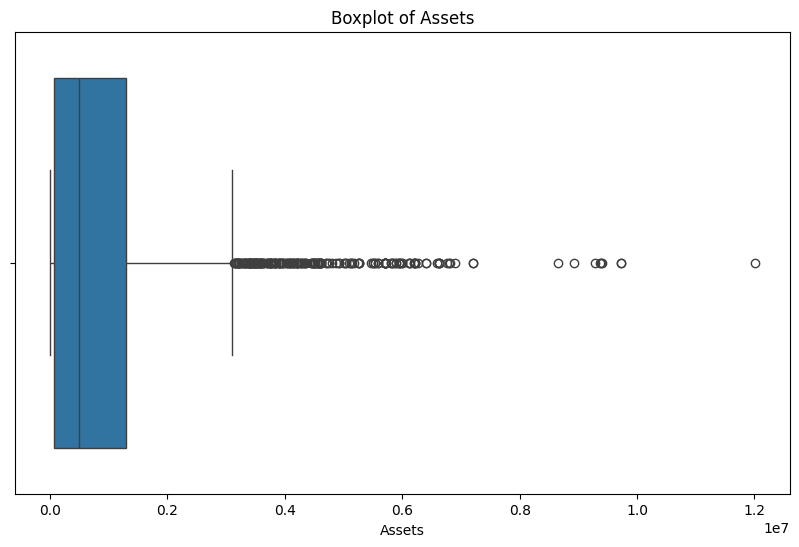

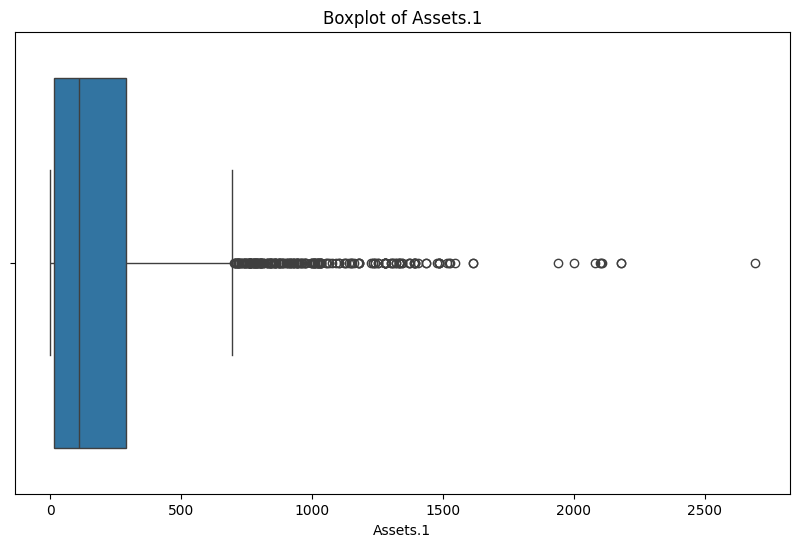

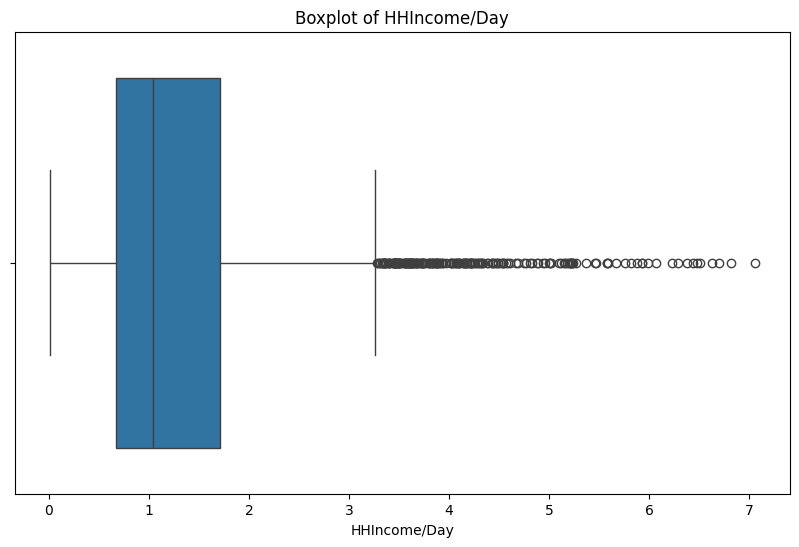

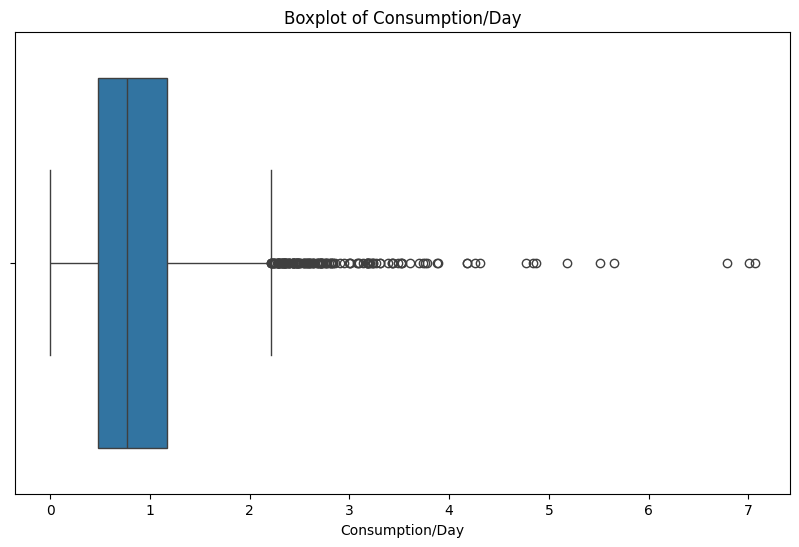

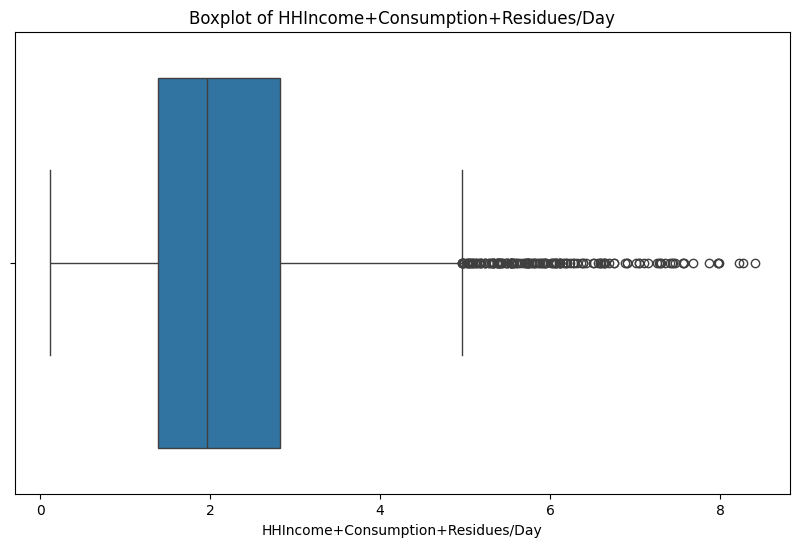

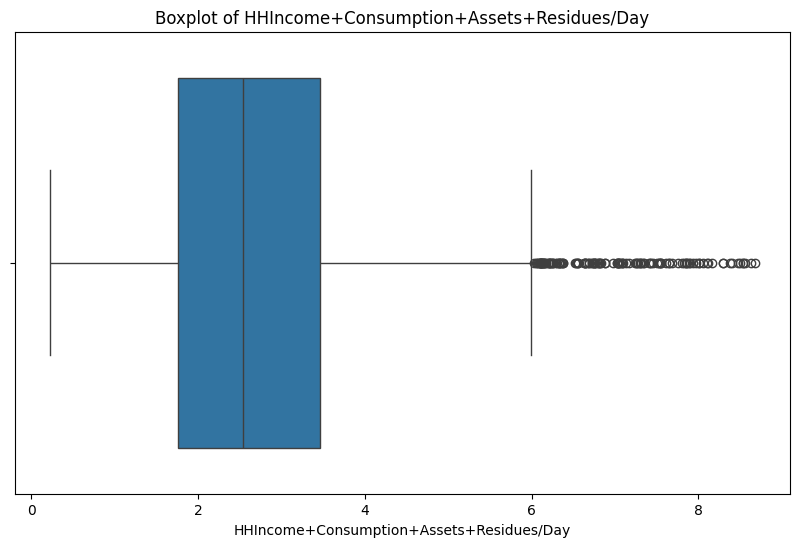

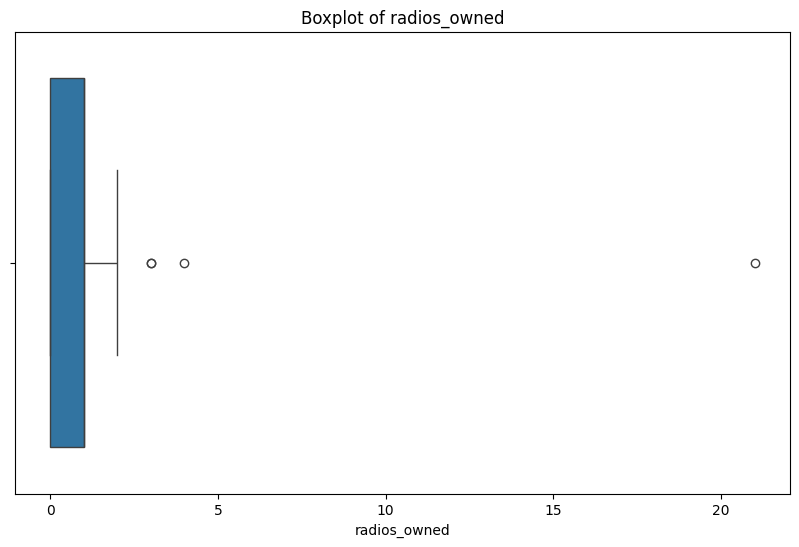

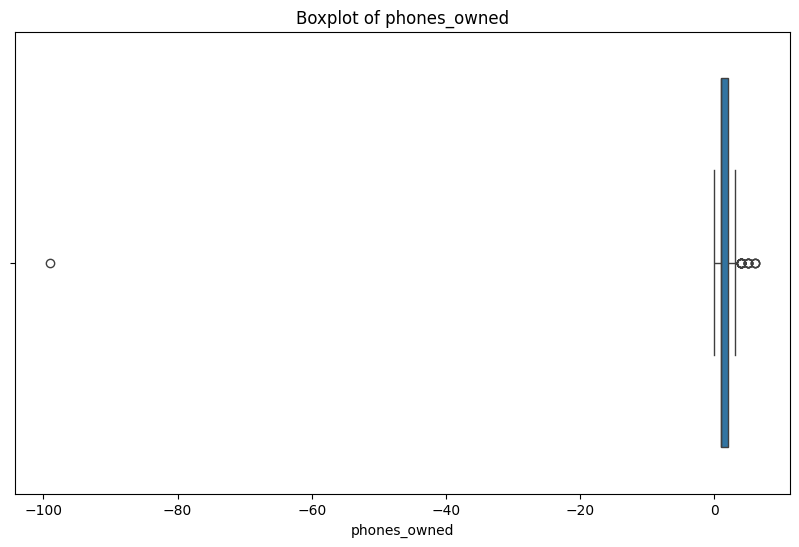

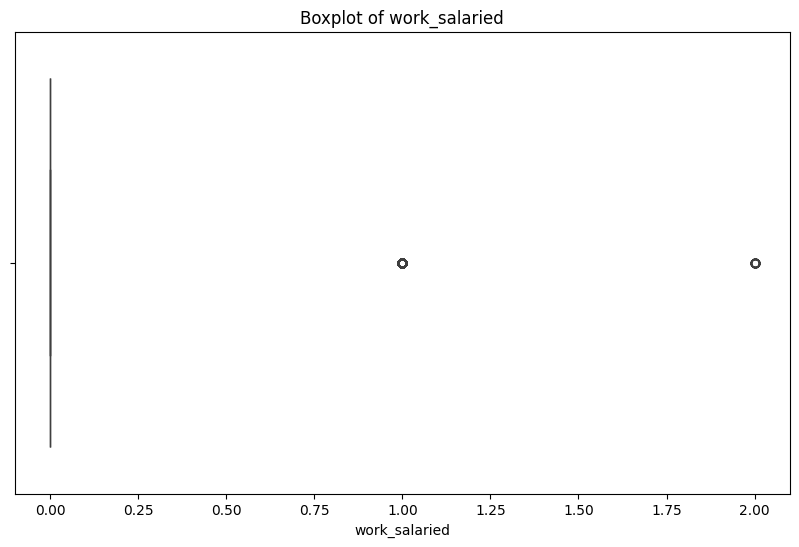

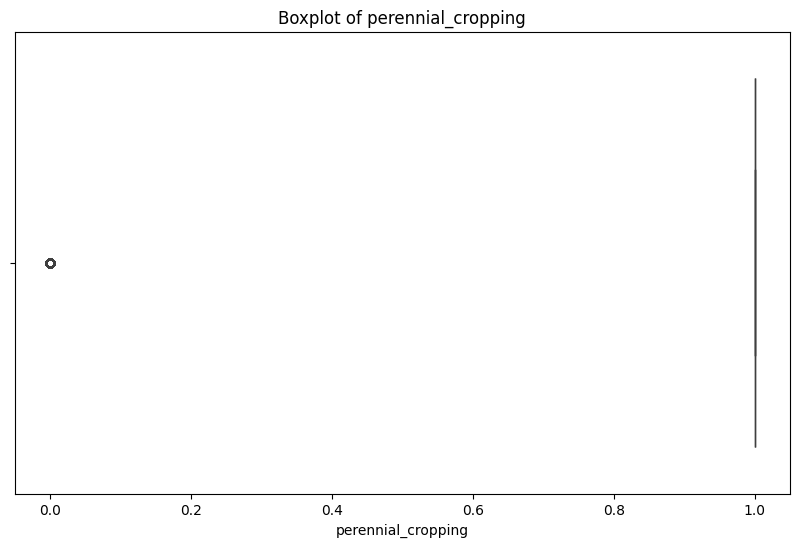

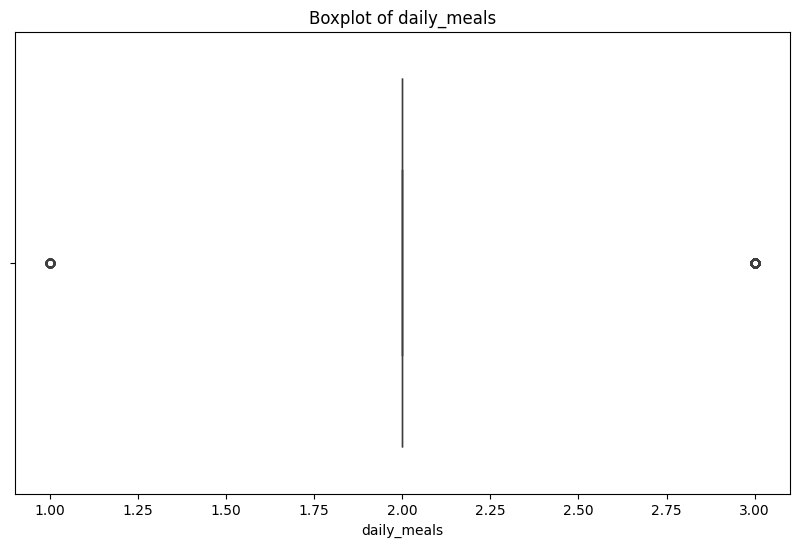

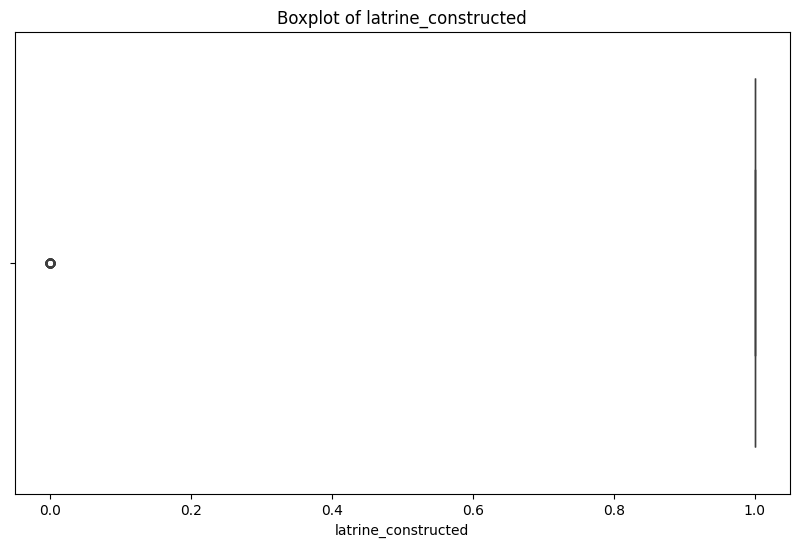

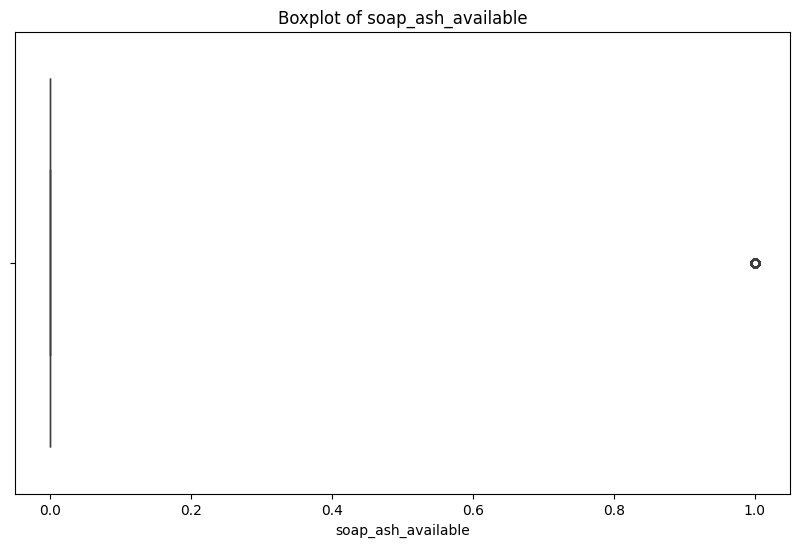

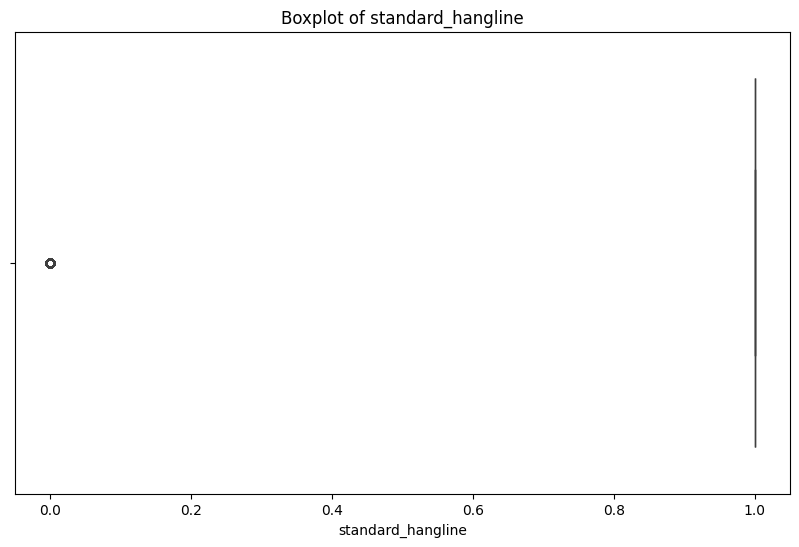

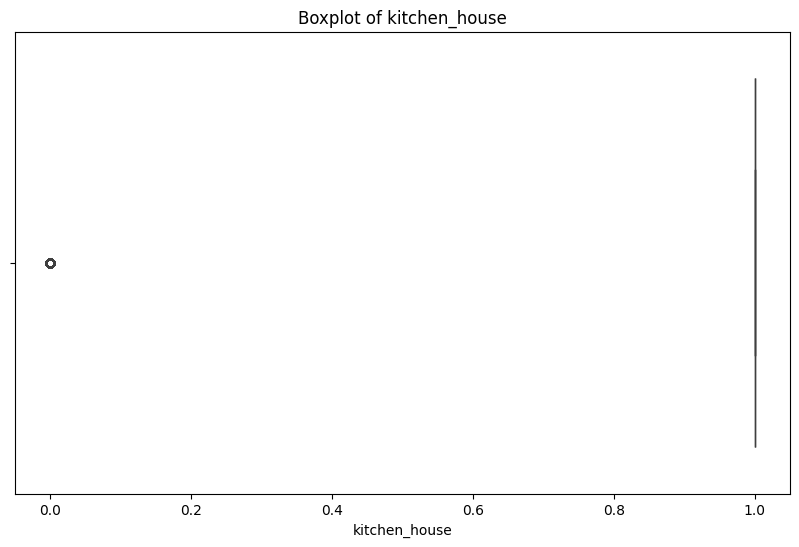

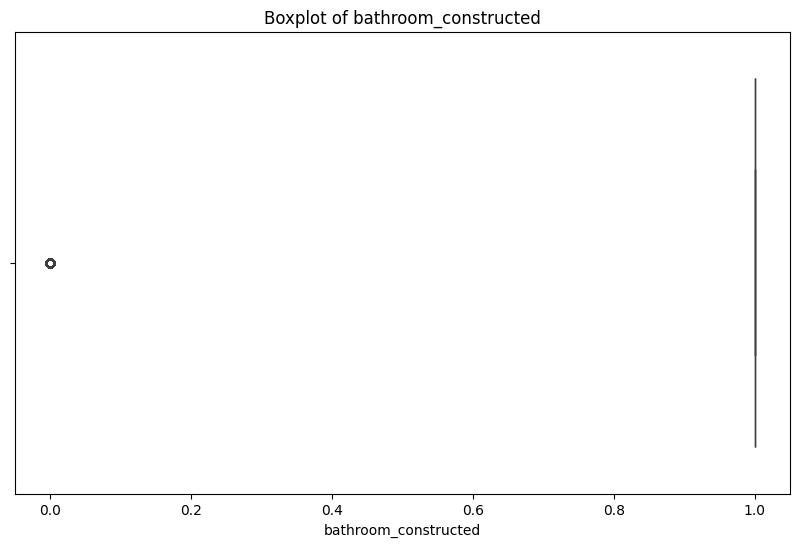

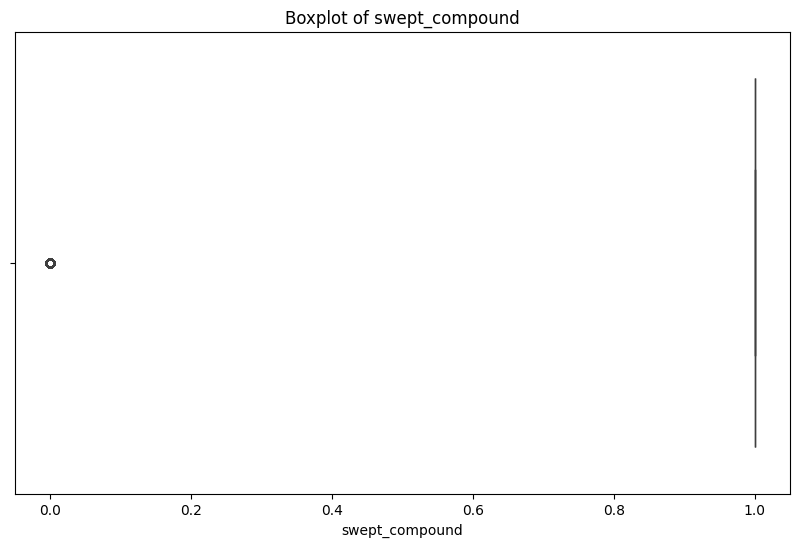

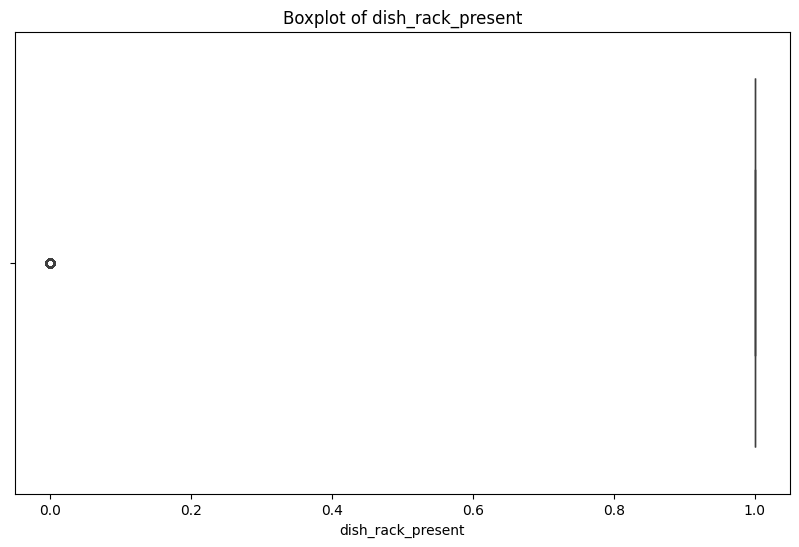

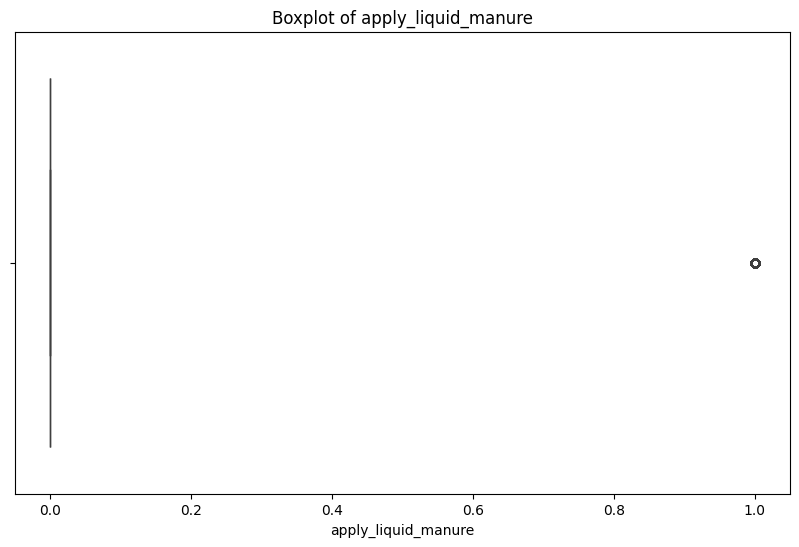

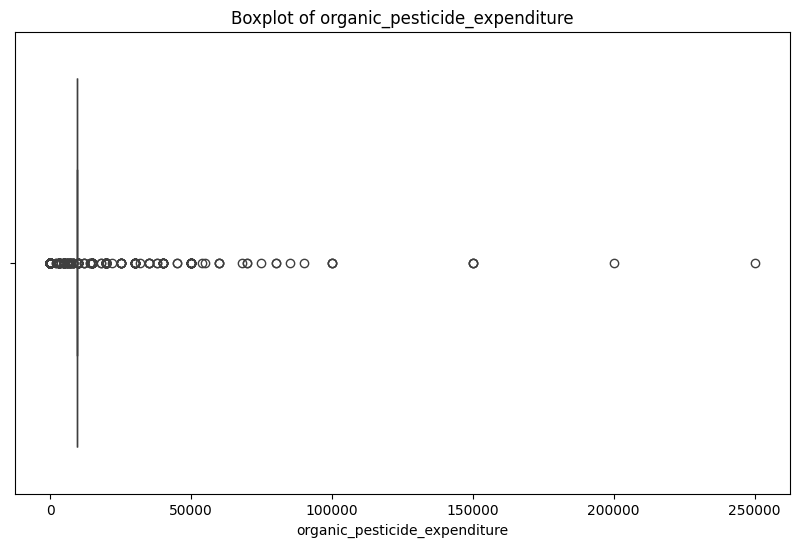

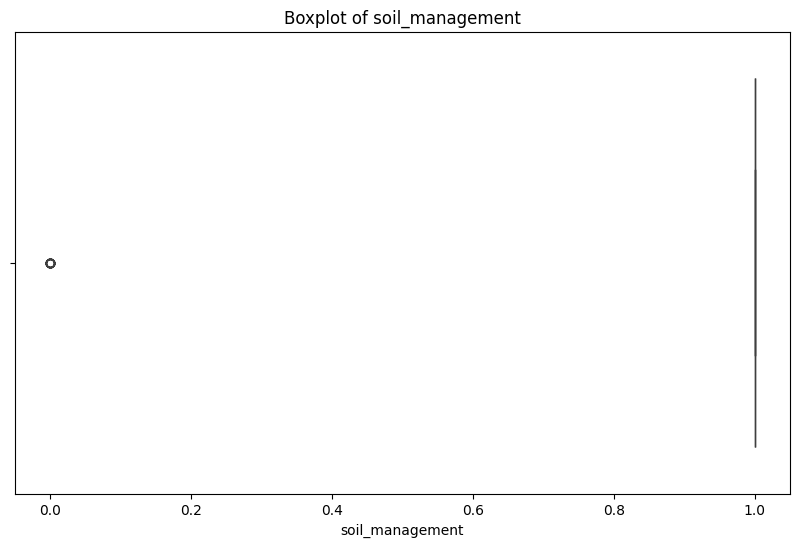

Column: HouseholdSize
IQR: 3.0
Lower Bound: -1.5
Upper Bound: 10.5
Number of Outliers: 31
Outliers: 
30     11
341    11
574    14
581    15
644    13
Name: HouseholdSize, dtype: int64

Column: TimeToOPD
IQR: 50.0
Lower Bound: -45.0
Upper Bound: 155.0
Number of Outliers: 304
Outliers: 
37     180
104    180
113    180
171    160
177    180
Name: TimeToOPD, dtype: int64

Column: TimeToWater
IQR: 25.0
Lower Bound: -22.5
Upper Bound: 77.5
Number of Outliers: 242
Outliers: 
10      80.0
91     120.0
102    190.0
143    180.0
163    100.0
Name: TimeToWater, dtype: float64

Column: AgricultureLand
IQR: 1.2
Lower Bound: -0.9999999999999998
Upper Bound: 3.8
Number of Outliers: 206
Outliers: 
17    4.0
23    6.0
33    4.0
49    4.0
52    4.0
Name: AgricultureLand, dtype: float64

Column: Season1CropsPlanted
IQR: 2.0
Lower Bound: -1.0
Upper Bound: 7.0
Number of Outliers: 2
Outliers: 
1697    8
2138    8
Name: Season1CropsPlanted, dtype: int64

Column: Season2CropsPlanted
IQR: 2.0
Lower Bound: -1

In [399]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Dictionary to hold outliers for each column
outliers_dict = {}

# Loop through each numerical column
for col in numerical_cols:
    if data[col].isnull().any():
        # Skip columns with NaN values
        continue
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = np.quantile(data[col], 0.25)
    q3 = np.quantile(data[col], 0.75)
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    if not outliers.empty:
        outliers_dict[col] = {
            'IQR': iqr,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Number of Outliers': len(outliers),
            'Outliers': outliers
        }

        # Plot boxplot for outliers
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# Print outliers details
for col, details in outliers_dict.items():
    print(f"Column: {col}")
    print(f"IQR: {details['IQR']}")
    print(f"Lower Bound: {details['Lower Bound']}")
    print(f"Upper Bound: {details['Upper Bound']}")
    print(f"Number of Outliers: {details['Number of Outliers']}")
    print(f"Outliers: \n{details['Outliers'].head()}\n")

In [400]:
#To remove the Outliers
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Copy the dataset to avoid altering the original one
cleaned_data = data.copy()

# Loop through each numerical column to remove outliers
for col in numerical_cols:
    if cleaned_data[col].isnull().any():
        # Skip columns with NaN values
        continue
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = np.quantile(cleaned_data[col], 0.25)
    q3 = np.quantile(cleaned_data[col], 0.75)
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Remove rows with outliers
    cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

# Check the shape of the cleaned data
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")

# Display the first few rows of the cleaned data
print(cleaned_data.head())

Original data shape: (3897, 75)
Cleaned data shape: (76, 75)
      District   Cluster     Village        HouseHoldID  HouseholdSize  \
7      Kanungu   Kihanda  Nyakarambi  KAN-NYA-MAS-K3930              4   
36     Kanungu   Kihanda   Nyakatoma  KAN-NYA-BAG-K4520              2   
122    Kanungu  Bujengwe      Kazahi  Kan-kaz-isa-k2048              5   
837  Rukungiri    Murama      Kahama  RUK-KAH-ATU-R8089              3   
934  Rukungiri     Ngoma    Kigarama  RUK-KIG-KET-R6550              6   

     TimeToOPD  TimeToWater  AgricultureLand  Season1CropsPlanted  \
7           60         20.0              2.0                    4   
36          40         30.0              2.0                    2   
122        120         30.0              0.5                    2   
837         15          3.0              0.8                    3   
934         30         45.0              2.5                    2   

     Season2CropsPlanted  PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  \


In [401]:
#Using the data dataframe but assigned to new cleaned data
data = cleaned_data 

In [402]:
#Section A, Creating a few new variables
'''
#Income Per Household Member:
data['Income_per_Household_Member'] = data['HouseholdIcome'] / data['HouseholdSize']
#Total Crop Income:
data['Total_Crop_Income'] = data['Season1CropIncome'] + data['Season2CropIncome'] + data['PerenialCropIncome']
#Total Agricultural Value:
data['Total_Agric_Value'] = data['Season1AgricValue'] + data['Season2AgricValue'] + data['PerennialAgricValue']
#Time to Essential Services:
data['Total_Time_to_Services'] = data['TimeToOPD'] + data['TimeToWater']
# VSLA Total Profits:
data['Total_VSLA_Profits'] = data['VSLA_Profits'] + data['VSLA_Profits.1']
#Total Vegetable Income:
data['Total_Vegetable_Income'] = data['Season1VegetableIncome'] + data['Season2VegatableIncome'] + data['VegetableIncome']
#Total Agricultural Income:
data['Total_Agric_Income'] = data['Total_Crop_Income'] + data['LivestockIncome'] + data['Total_Vegetable_Income']
#Household Wealth Indicator:
data['Wealth_Indicator'] = data['HouseholdIcome'] + data['Assets'] + data['Consumption+Residues']
#Daily Household Income per Person:
data['Income_per_Person_per_Day'] = data['HHIncome/Day'] / data['HouseholdSize']
#Livestock Profitability:
data['Livestock_Profitability'] = data['LivestockIncome'] / data['LivestockAssetValue']
#Employment Diversity Index:
data['Basic_Amenities_Score'] = data['latrine_constructed'] + data['tippy_tap_available'] + \
                                data['soap_ash_available'] + data['standard_hangline'] + \
                                data['kitchen_house'] + data['bathroom_constructed'] + \
                                data['swept_compound'] + data['dish_rack_present']
#Agricultural Efficiency:
data['Agric_Efficiency'] = data['AgricultureLand'] / (data['Season1CropsPlanted'] + data['Season2CropsPlanted'] + data['PerennialCropsGrown']) '''



"\n#Income Per Household Member:\ndata['Income_per_Household_Member'] = data['HouseholdIcome'] / data['HouseholdSize']\n#Total Crop Income:\ndata['Total_Crop_Income'] = data['Season1CropIncome'] + data['Season2CropIncome'] + data['PerenialCropIncome']\n#Total Agricultural Value:\ndata['Total_Agric_Value'] = data['Season1AgricValue'] + data['Season2AgricValue'] + data['PerennialAgricValue']\n#Time to Essential Services:\ndata['Total_Time_to_Services'] = data['TimeToOPD'] + data['TimeToWater']\n# VSLA Total Profits:\ndata['Total_VSLA_Profits'] = data['VSLA_Profits'] + data['VSLA_Profits.1']\n#Total Vegetable Income:\ndata['Total_Vegetable_Income'] = data['Season1VegetableIncome'] + data['Season2VegatableIncome'] + data['VegetableIncome']\n#Total Agricultural Income:\ndata['Total_Agric_Income'] = data['Total_Crop_Income'] + data['LivestockIncome'] + data['Total_Vegetable_Income']\n#Household Wealth Indicator:\ndata['Wealth_Indicator'] = data['HouseholdIcome'] + data['Assets'] + data['Cons

In [403]:
data.shape[1]

75

In [404]:
#Create a new variable called ‘ProgressStatus’ on ‘HHIncome+Consumption+Residues/Day’
# Define function to classify ProgressStatus
def classify_ProgressStatus(value):
    if value >= 2.15:
        return "On Track"
    elif 1.77<=value<2.15:
        return "At Risk"
    elif 1.25<=value<1.77:
        return "Struggling"
    else:
        return "Severely Struggling"
# Apply function to create 'Credit_risk_classification' column
data['ProgressStatus'] = data['HHIncome+Consumption+Residues/Day'].apply(classify_ProgressStatus)

In [405]:
#Viewing function result
data['ProgressStatus'].value_counts()

ProgressStatus
On Track               1704
Struggling              901
Severely Struggling     757
At Risk                 535
Name: count, dtype: int64

In [406]:
#Dropping HHIncome+Consumption+Residues/Day to remove multicollinearity
data = data.drop(columns='HHIncome+Consumption+Residues/Day')

#Dropping HouseHoldID, It doesnt add any statistical sense to the analysis 
#data = data.drop(columns='HouseHoldID')

In [407]:
'''
#Identify the columns that were used in the creation of new variables in Section A
# List of columns to drop
columns_to_drop = [
    'HouseholdIcome', 'HouseholdSize', 'Season1CropIncome', 'Season2CropIncome', 'PerenialCropIncome',
    'Season1AgricValue', 'Season2AgricValue', 'PerennialAgricValue', 'TimeToOPD', 'TimeToWater',
    'VSLA_Profits', 'VSLA_Profits.1', 'Season1VegetableIncome', 'Season2VegatableIncome', 'VegetableIncome',
    'LivestockIncome', 'Assets', 'Consumption+Residues', 'HHIncome/Day', 'LivestockAssetValue',
    'latrine_constructed', 'tippy_tap_available', 'soap_ash_available', 'standard_hangline', 'kitchen_house',
    'bathroom_constructed', 'swept_compound', 'dish_rack_present', 'AgricultureLand', 'Season1CropsPlanted',
    'Season2CropsPlanted', 'PerennialCropsGrown'
]

# Drop columns from the DataFrame
data = data.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print(data.head()) '''

"\n#Identify the columns that were used in the creation of new variables in Section A\n# List of columns to drop\ncolumns_to_drop = [\n    'HouseholdIcome', 'HouseholdSize', 'Season1CropIncome', 'Season2CropIncome', 'PerenialCropIncome',\n    'Season1AgricValue', 'Season2AgricValue', 'PerennialAgricValue', 'TimeToOPD', 'TimeToWater',\n    'VSLA_Profits', 'VSLA_Profits.1', 'Season1VegetableIncome', 'Season2VegatableIncome', 'VegetableIncome',\n    'LivestockIncome', 'Assets', 'Consumption+Residues', 'HHIncome/Day', 'LivestockAssetValue',\n    'latrine_constructed', 'tippy_tap_available', 'soap_ash_available', 'standard_hangline', 'kitchen_house',\n    'bathroom_constructed', 'swept_compound', 'dish_rack_present', 'AgricultureLand', 'Season1CropsPlanted',\n    'Season2CropsPlanted', 'PerennialCropsGrown'\n]\n\n# Drop columns from the DataFrame\ndata = data.drop(columns=columns_to_drop)\n\n# Display the cleaned DataFrame\nprint(data.head()) "

In [408]:
null_percentage = data.isnull().sum() * 100 / len(data)
columns_with_null_values = null_percentage[null_percentage > 0].index
print(columns_with_null_values)

columns_with_null_data = data[columns_with_null_values]
columns_with_null_data.head()

Index([], dtype='object')


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [409]:
columns_with_null_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3897 entries, 0 to 3896
Empty DataFrame


In [410]:
'''
data['Livestock_Profitability'] = data['Livestock_Profitability'].fillna(value=data['Livestock_Profitability'].mean())
data['Agric_Efficiency'] = data['Agric_Efficiency'].fillna(value=data['Agric_Efficiency'].mean())
'''

"\ndata['Livestock_Profitability'] = data['Livestock_Profitability'].fillna(value=data['Livestock_Profitability'].mean())\ndata['Agric_Efficiency'] = data['Agric_Efficiency'].fillna(value=data['Agric_Efficiency'].mean())\n"

In [411]:
data.head()

District    Cluster    Village        HouseHoldID  HouseholdSize  TimeToOPD  \
0  Kanungu  Rutendere   Kangyeyo  KAN-KAN-FER-K1768              3         60   
1  Kanungu    Kihanda  Omurwambu  KAN-OMU-KAN-K4711              3        120   
2  Kanungu   Bujengwe     Byumba  KAN-BYU-ANN-K4055              2         40   
3  Kanungu   Bujengwe     Byumba  KAN-BYU-YUS-K4026              8         15   
4  Kanungu   Bujengwe     Kazahi  KAN-KAZ-FAU-K2057              5        120   

   TimeToWater  AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0         35.0         0.250000                    0                    6   
1         10.0         1.000000                    2                    3   
2         10.0         1.583627                    3                    3   
3         40.0         1.000000                    2                    4   
4         51.0         1.000000                    2                    2   

   PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0                    1             0        0.000000                0.000000   
1                    3             0        0.000000                0.000000   
2                    2             0        0.000000                0.000000   
3                    4         20000        4.481111                0.000000   
4                    1             0        0.000000               22.405556   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                     0.0         0.000000               3.920972   
1                     0.0         0.000000               0.000000   
2                     0.0         0.000000               0.672167   
3                     0.0         0.000000               6.945722   
4                     0.0        22.405556              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0         0.0           0.000000          45.931389           45.931389   
1         0.0           0.000000          13.219278           13.219278   
2         0.0          43.018667          21.285278           64.303944   
3         0.0         123.230556           3.360833          126.591389   
4         0.0          22.405556           0.896222           23.301778   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0           31.367778              0.0           3.920972         115.500639   
1          103.065556              0.0          57.694306          75.058611   
2           14.787667              0.0          89.398167          55.005639   
3           27.782889              0.0         175.077011          87.381667   
4            0.000000              0.0          67.664778          35.624833   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0          119.421611           109.787222  229.208833   
1          132.752917           170.282222  303.035139   
2          144.403806            34.952667  179.356472   
3          262.458678            62.735556  325.194233   
4          103.289611           197.168889  300.458500   

   

In [412]:
#Target Variable  is ProgressStatus
#features are other variables in the dataset

In [413]:
#Exploratory Data Analysis

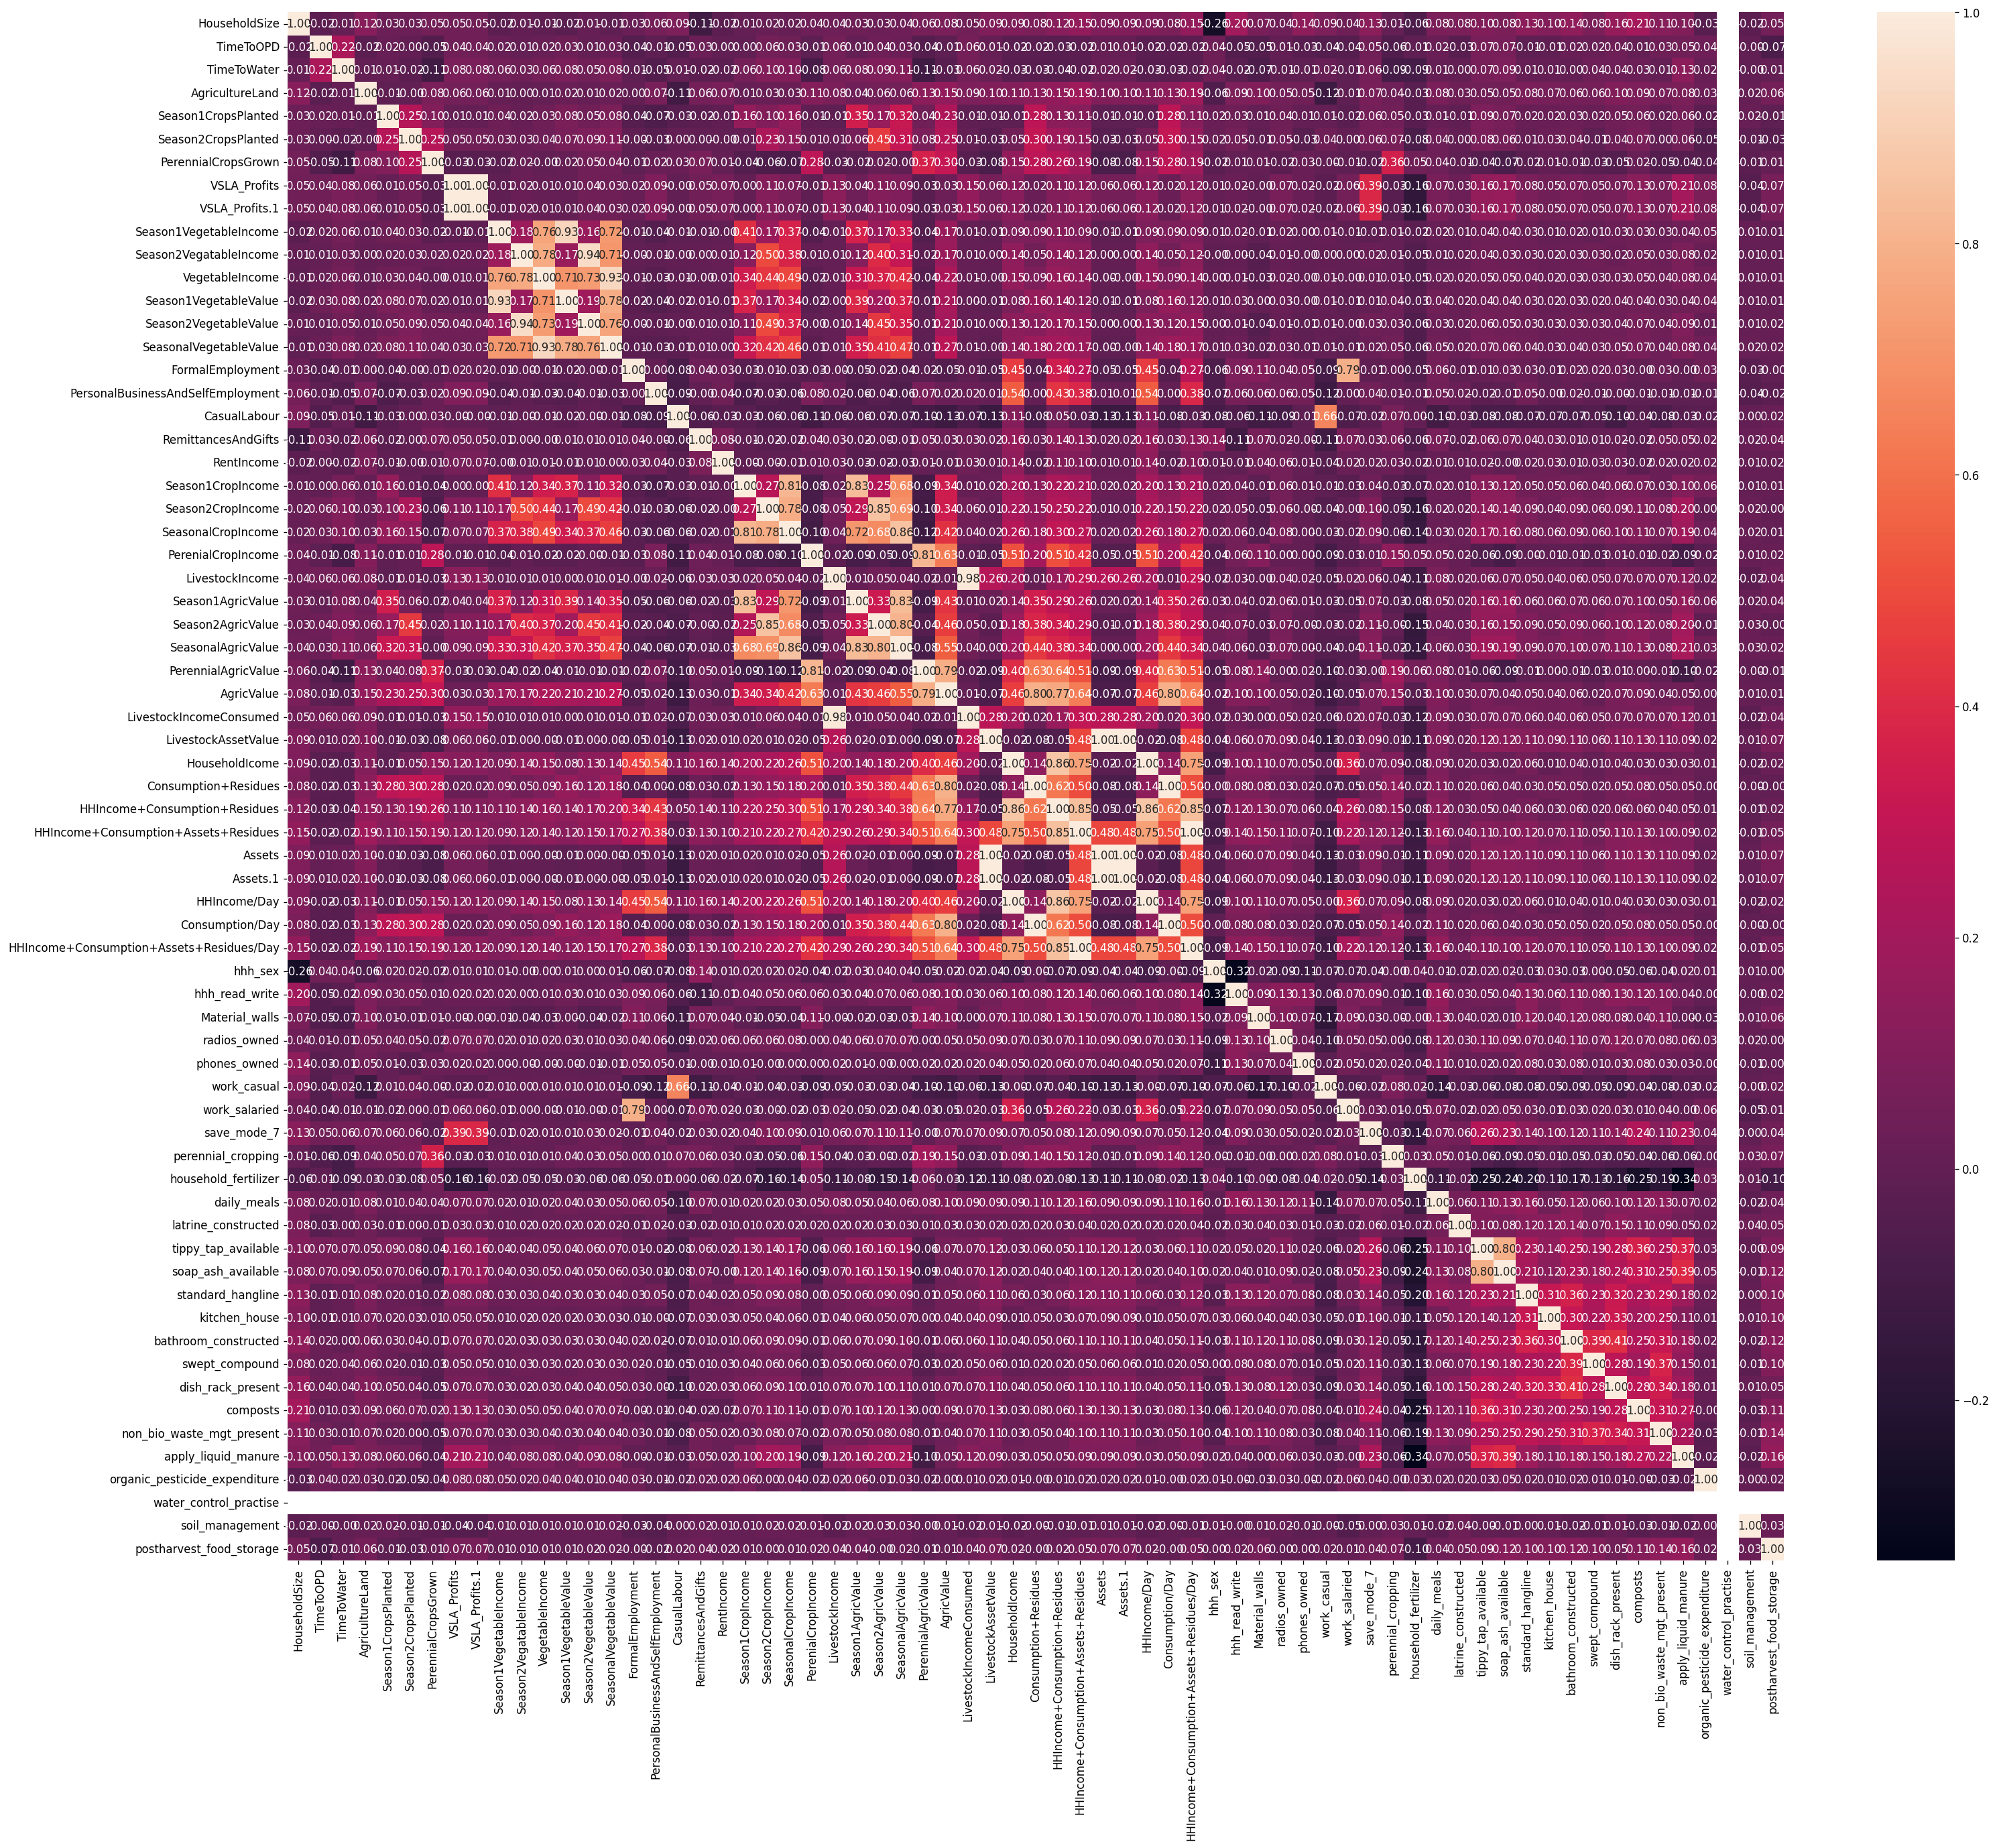

In [414]:
#Correlation matrix for numerical values
numerical_data = data.select_dtypes(include=['int', 'float'])
correlation_matrix = numerical_data.corr()

# Heatmap of correlation matrix
fig = plt.figure(figsize=(30,25), dpi = 120)
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f')
#plt.title('Correlation Heatmap')
plt.show()

In [415]:
data.head()

District    Cluster    Village        HouseHoldID  HouseholdSize  TimeToOPD  \
0  Kanungu  Rutendere   Kangyeyo  KAN-KAN-FER-K1768              3         60   
1  Kanungu    Kihanda  Omurwambu  KAN-OMU-KAN-K4711              3        120   
2  Kanungu   Bujengwe     Byumba  KAN-BYU-ANN-K4055              2         40   
3  Kanungu   Bujengwe     Byumba  KAN-BYU-YUS-K4026              8         15   
4  Kanungu   Bujengwe     Kazahi  KAN-KAZ-FAU-K2057              5        120   

   TimeToWater  AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0         35.0         0.250000                    0                    6   
1         10.0         1.000000                    2                    3   
2         10.0         1.583627                    3                    3   
3         40.0         1.000000                    2                    4   
4         51.0         1.000000                    2                    2   

   PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0                    1             0        0.000000                0.000000   
1                    3             0        0.000000                0.000000   
2                    2             0        0.000000                0.000000   
3                    4         20000        4.481111                0.000000   
4                    1             0        0.000000               22.405556   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                     0.0         0.000000               3.920972   
1                     0.0         0.000000               0.000000   
2                     0.0         0.000000               0.672167   
3                     0.0         0.000000               6.945722   
4                     0.0        22.405556              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0         0.0           0.000000          45.931389           45.931389   
1         0.0           0.000000          13.219278           13.219278   
2         0.0          43.018667          21.285278           64.303944   
3         0.0         123.230556           3.360833          126.591389   
4         0.0          22.405556           0.896222           23.301778   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0           31.367778              0.0           3.920972         115.500639   
1          103.065556              0.0          57.694306          75.058611   
2           14.787667              0.0          89.398167          55.005639   
3           27.782889              0.0         175.077011          87.381667   
4            0.000000              0.0          67.664778          35.624833   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0          119.421611           109.787222  229.208833   
1          132.752917           170.282222  303.035139   
2          144.403806            34.952667  179.356472   
3          262.458678            62.735556  325.194233   
4          103.289611           197.168889  300.458500   

   

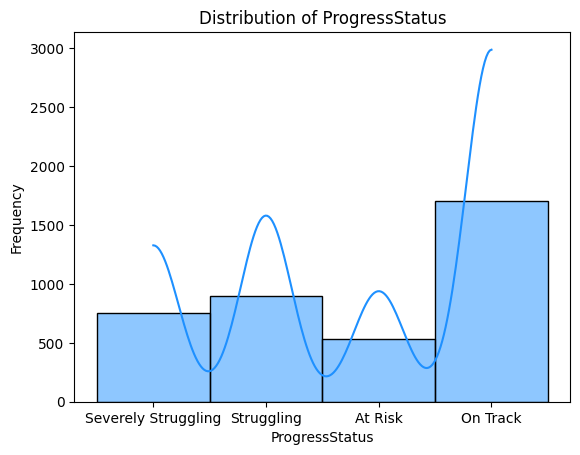

In [416]:
#Distribution of ProgressStatus
sns.histplot(data['ProgressStatus'], bins=100, kde=True, color= '#1E90FF')
plt.title('Distribution of ProgressStatus')
plt.xlabel('ProgressStatus')
plt.ylabel('Frequency')
plt.show()

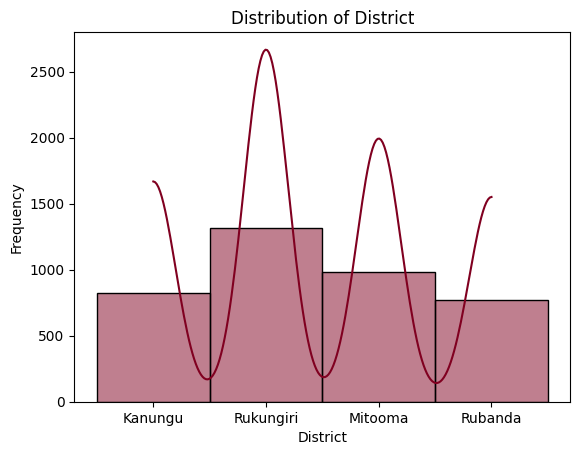

In [417]:
#Distribution of District
sns.histplot(data['District'], bins=30, kde=True, color= '#800020')
plt.title('Distribution of District')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.show()

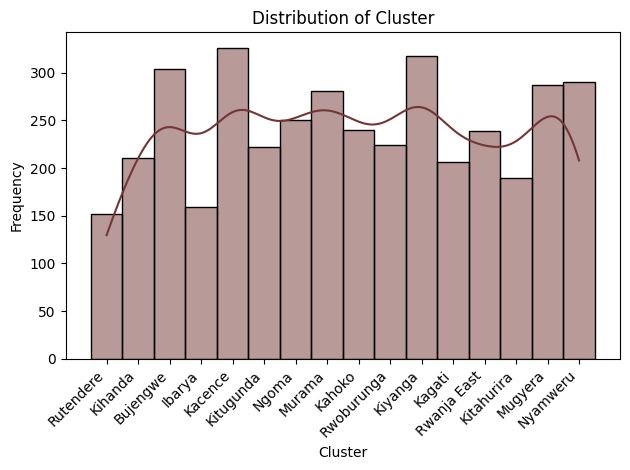

In [418]:
#Distribution of EstimatedSalary
sns.histplot(data['Cluster'], bins=1000, kde=True, color= '#733635')
plt.title('Distribution of Cluster')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [419]:
#List of feature columns (excluding target variables)
features = data.columns.difference(['ProgressStatus'])

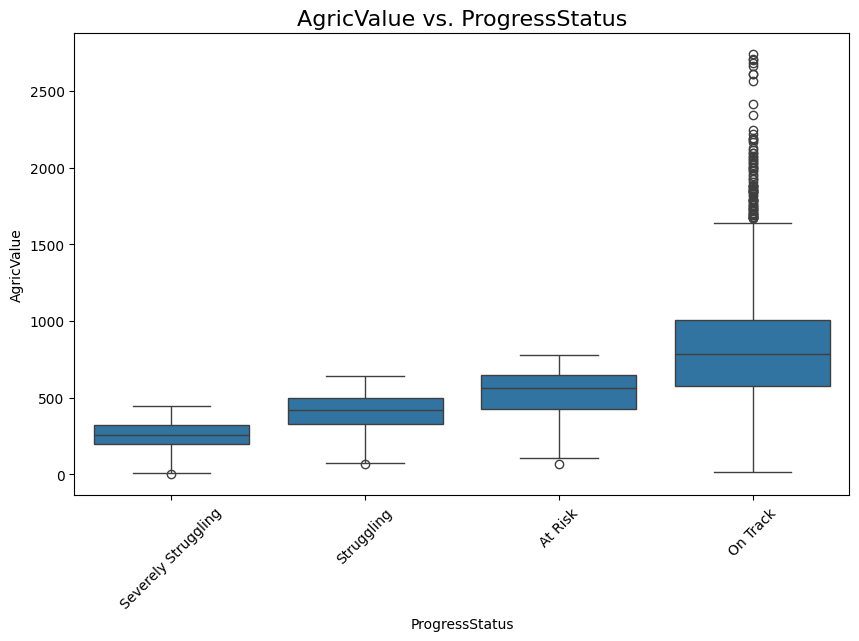

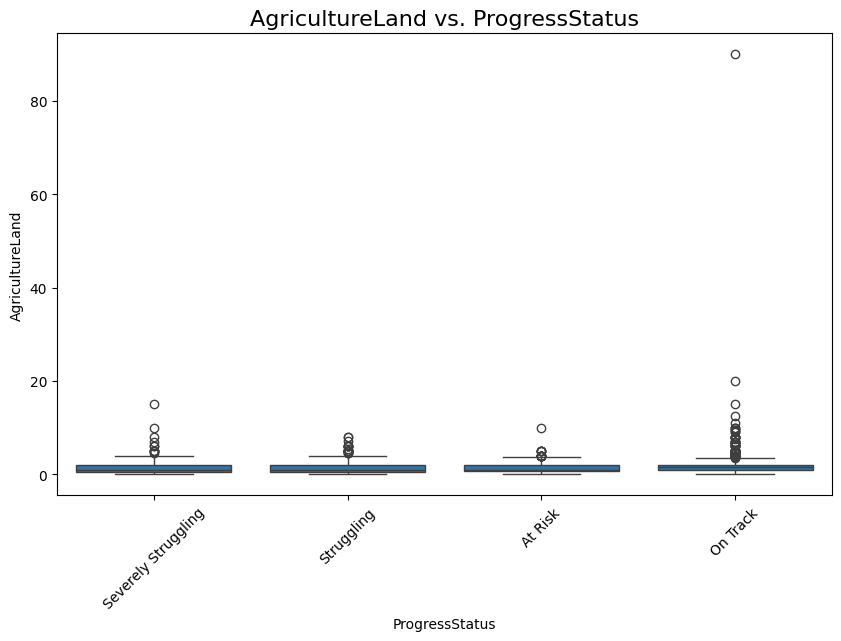

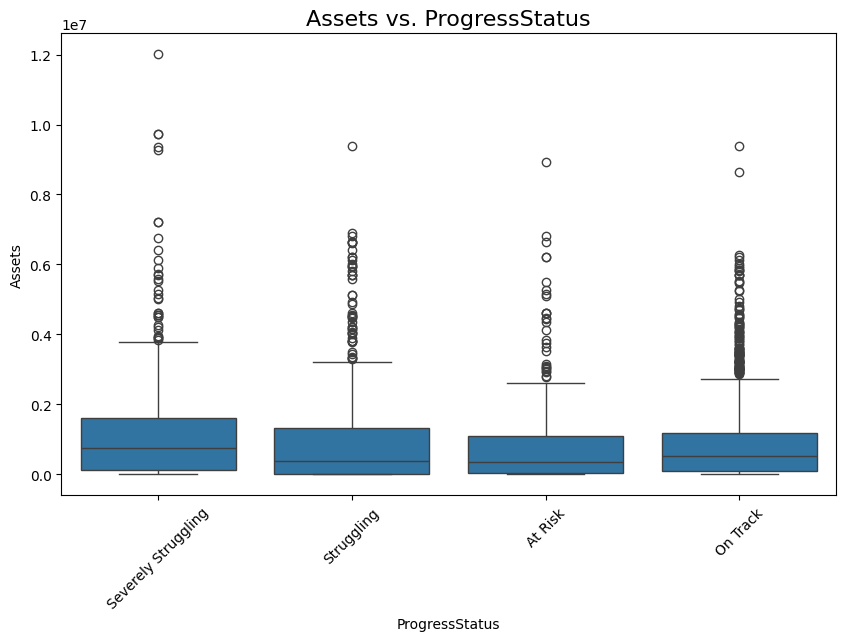

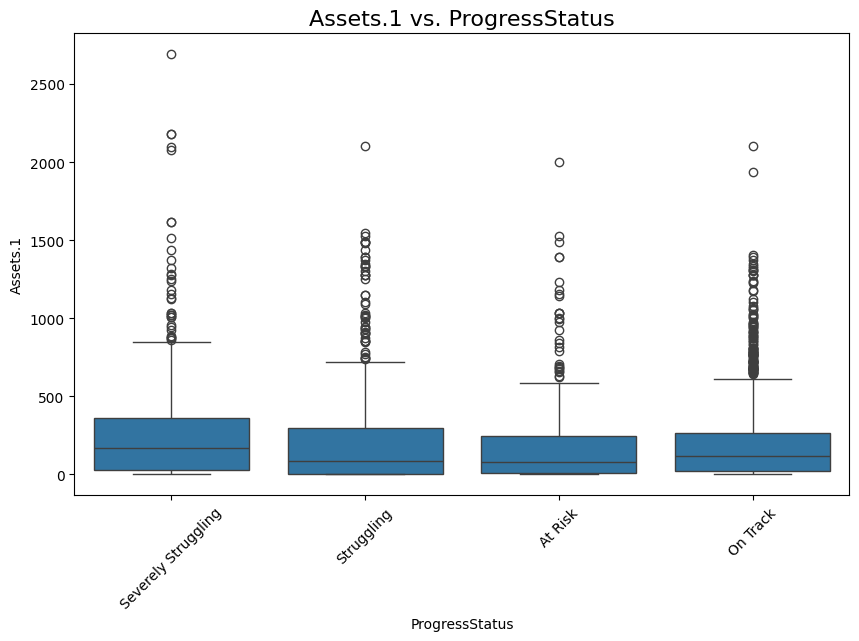

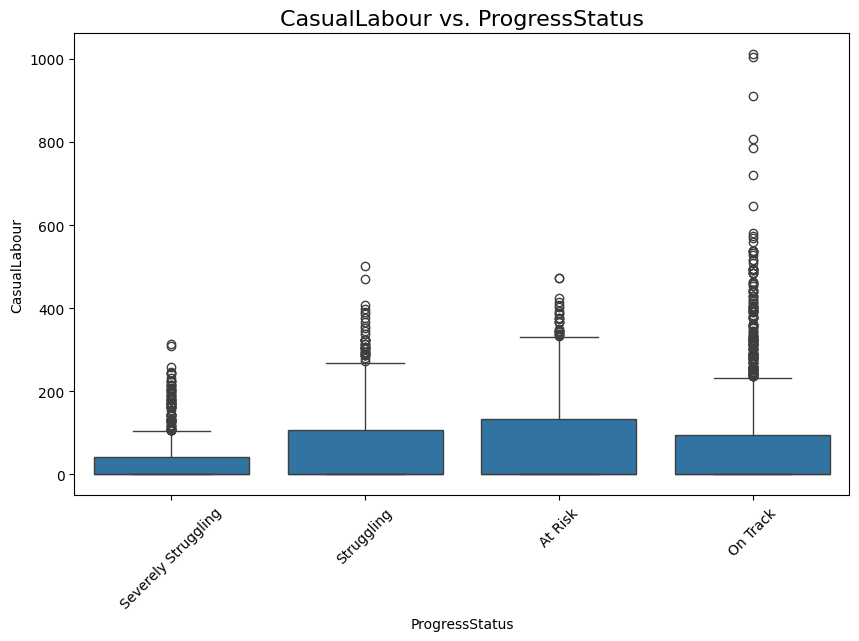

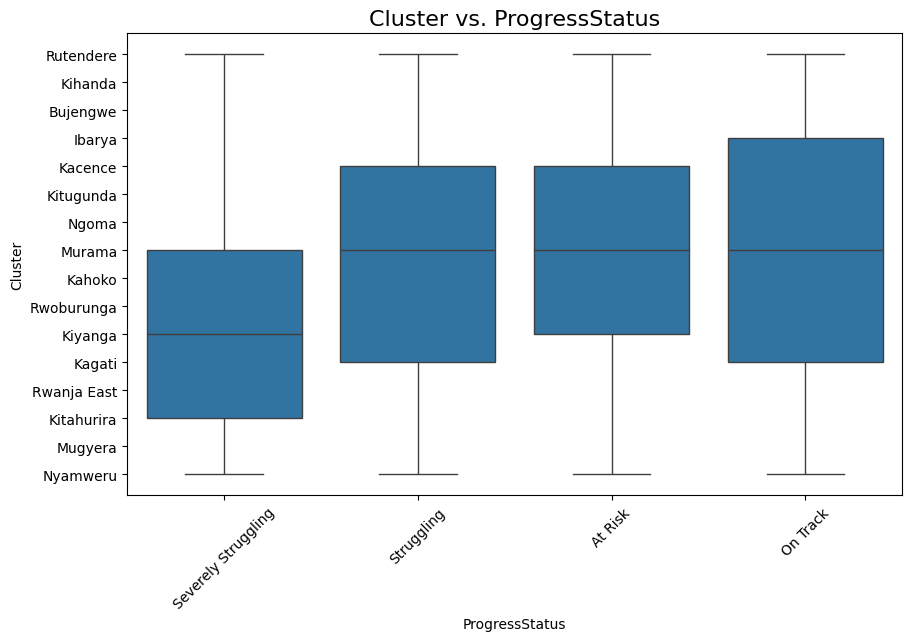

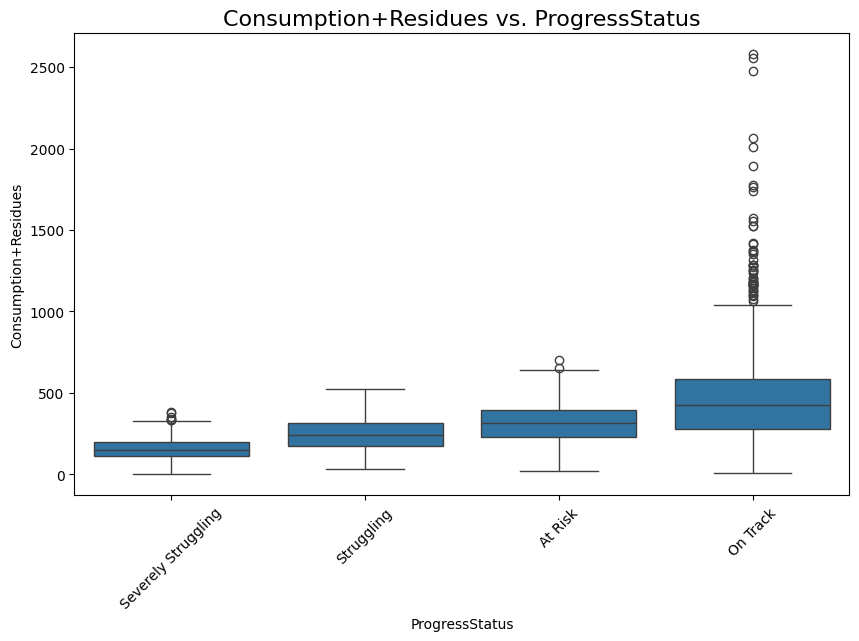

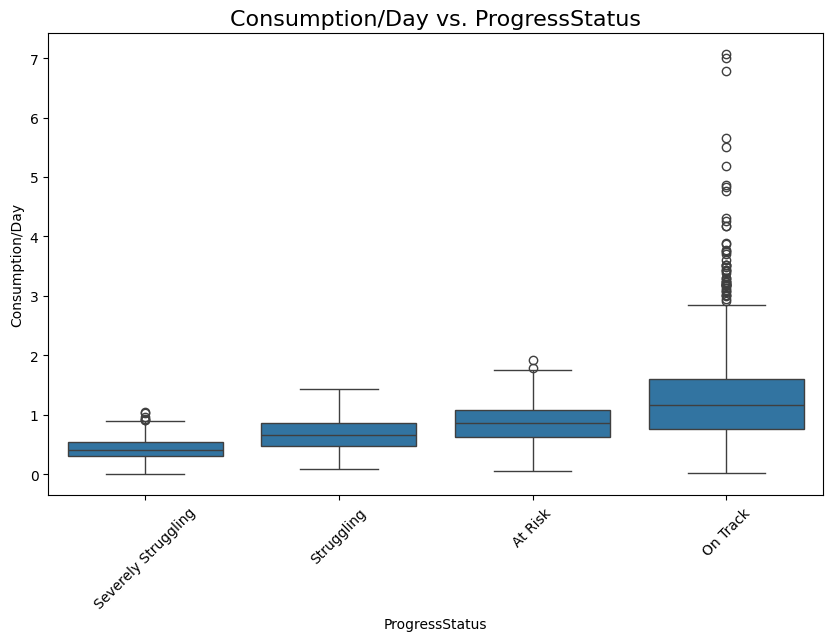

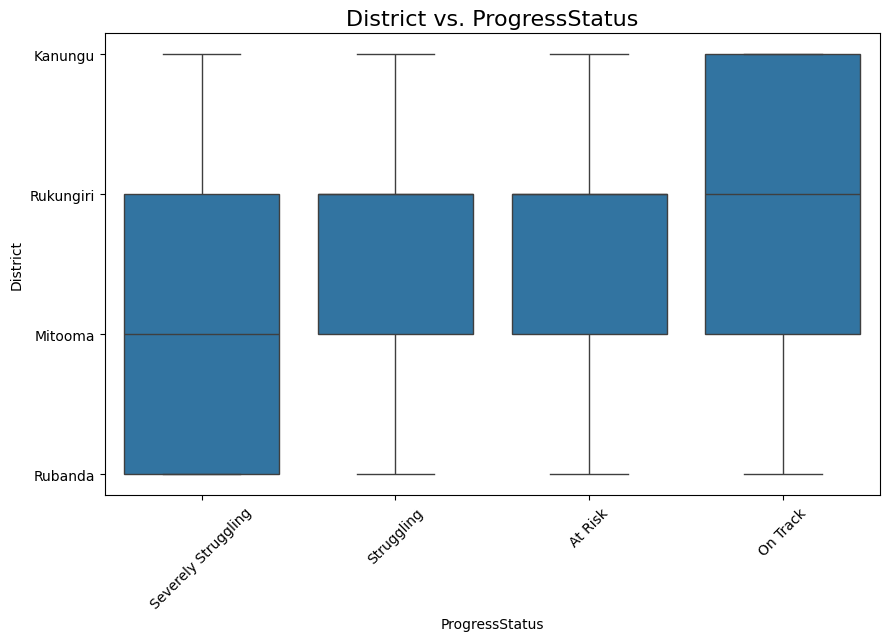

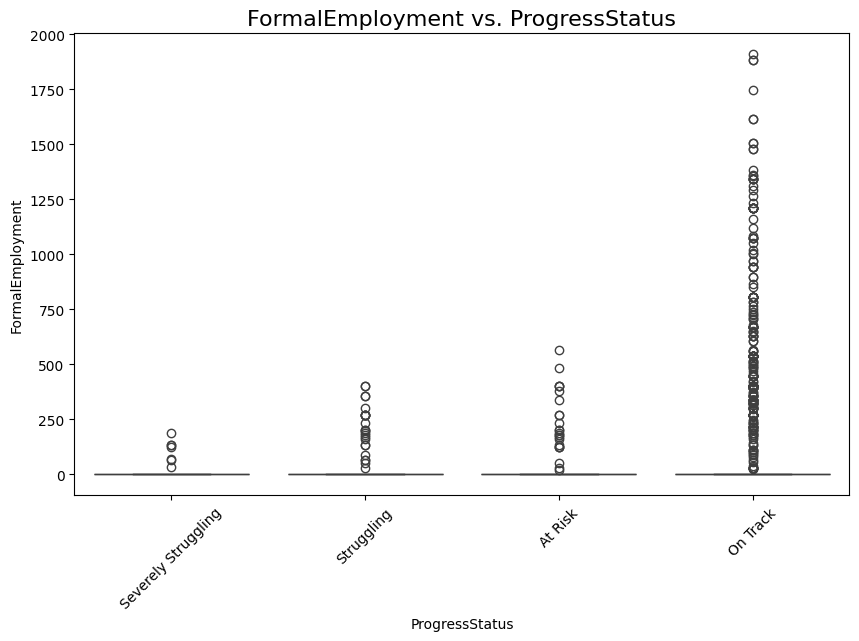

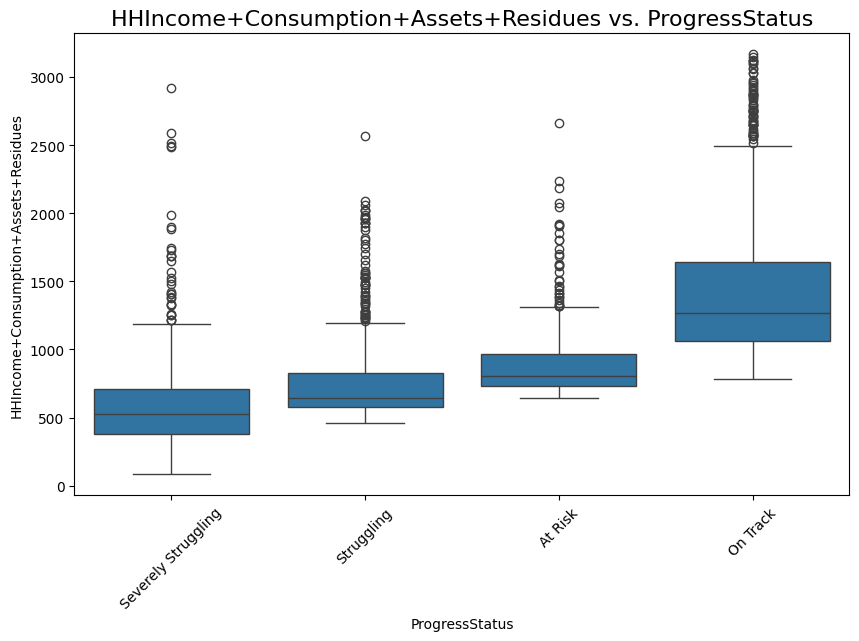

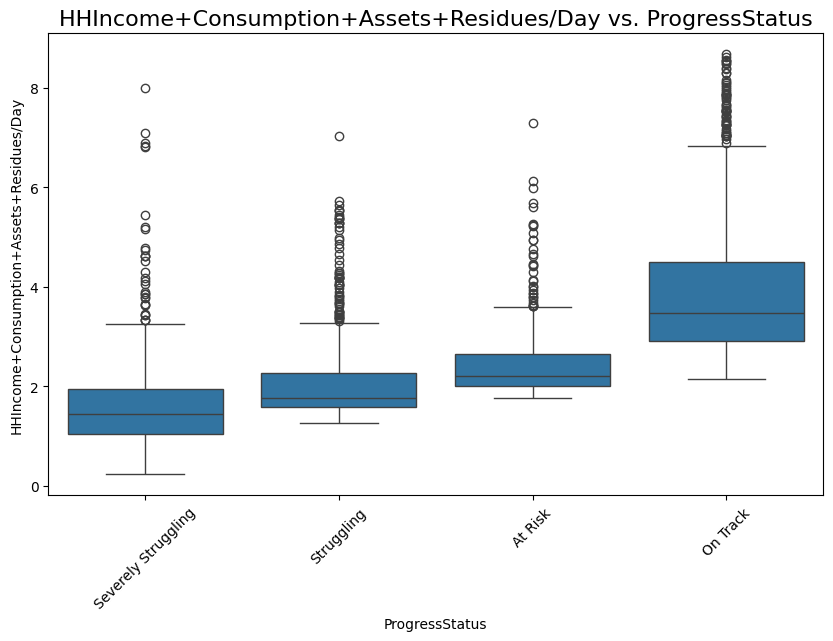

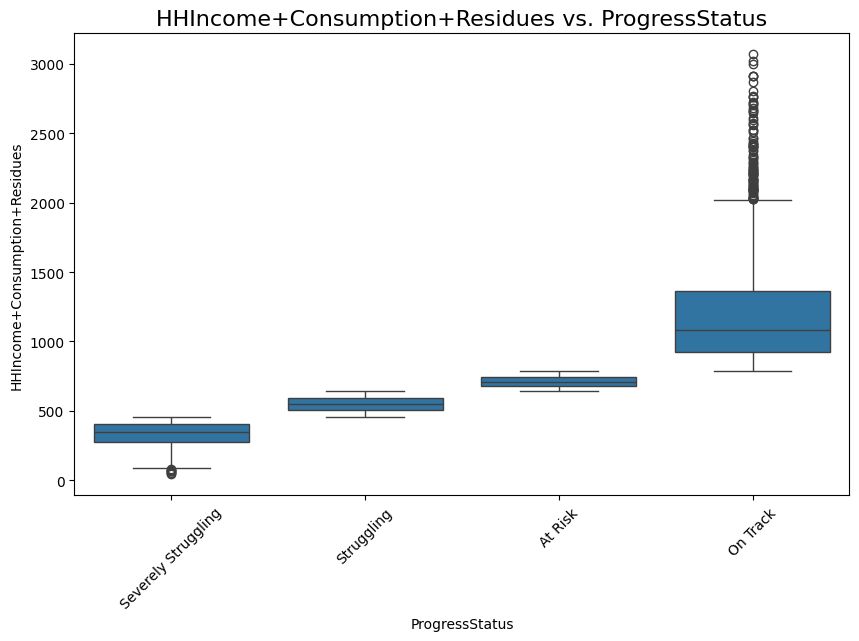

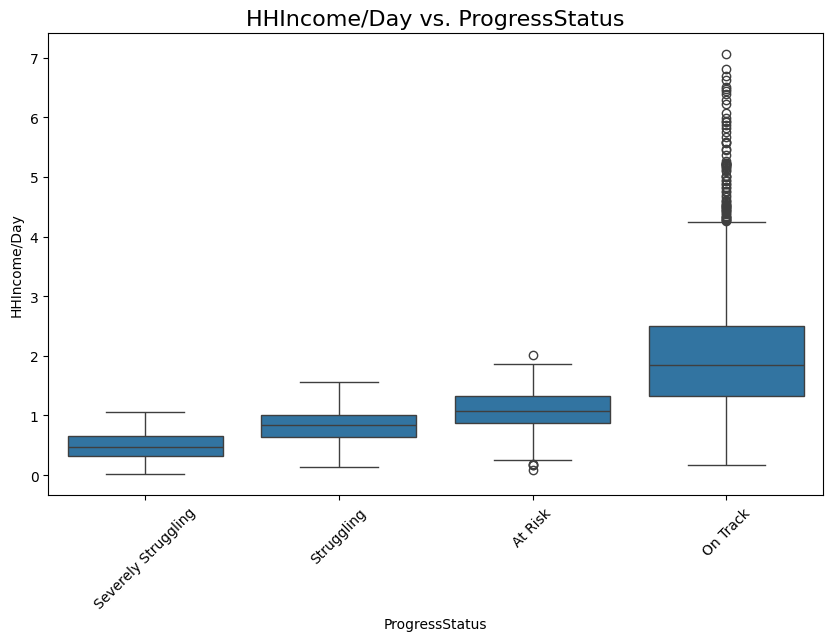

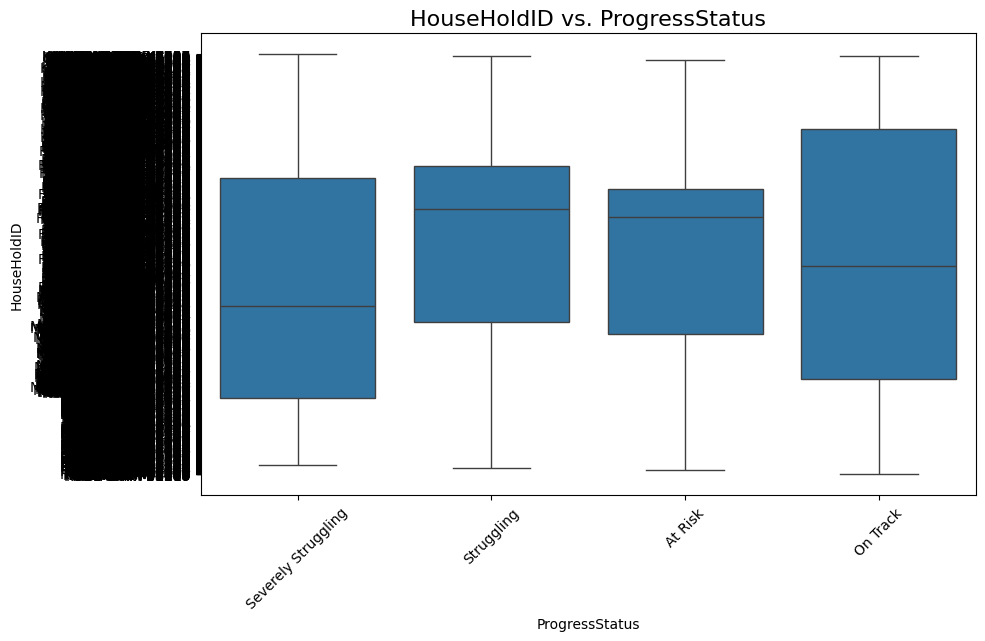

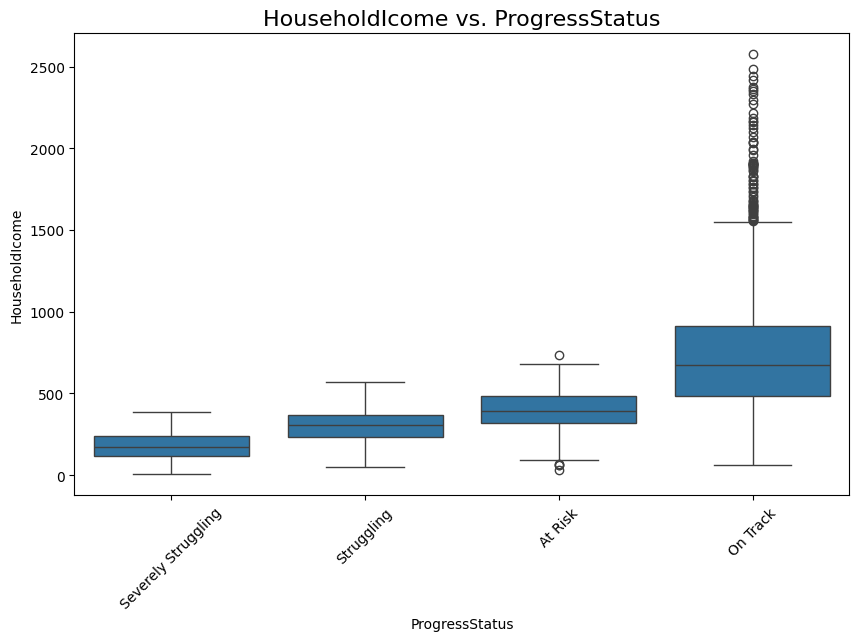

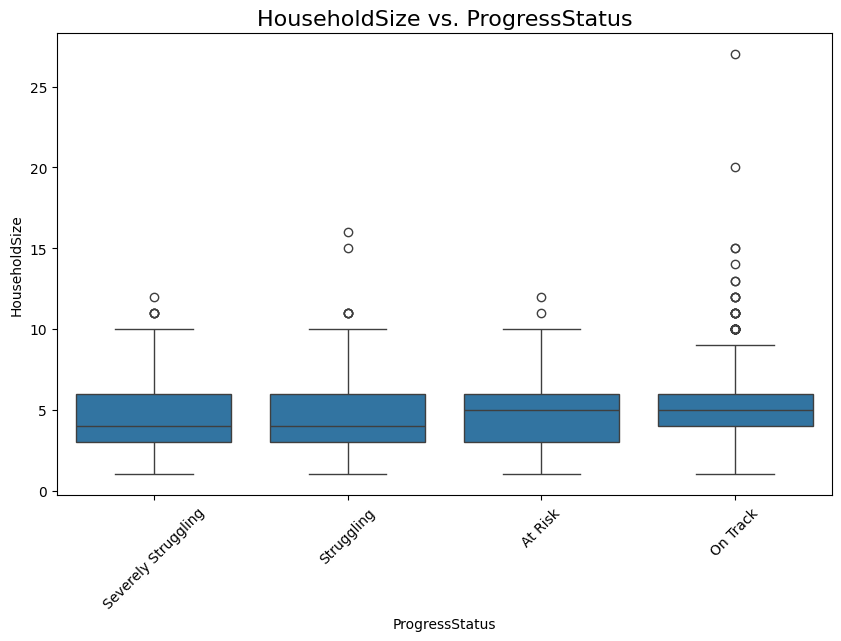

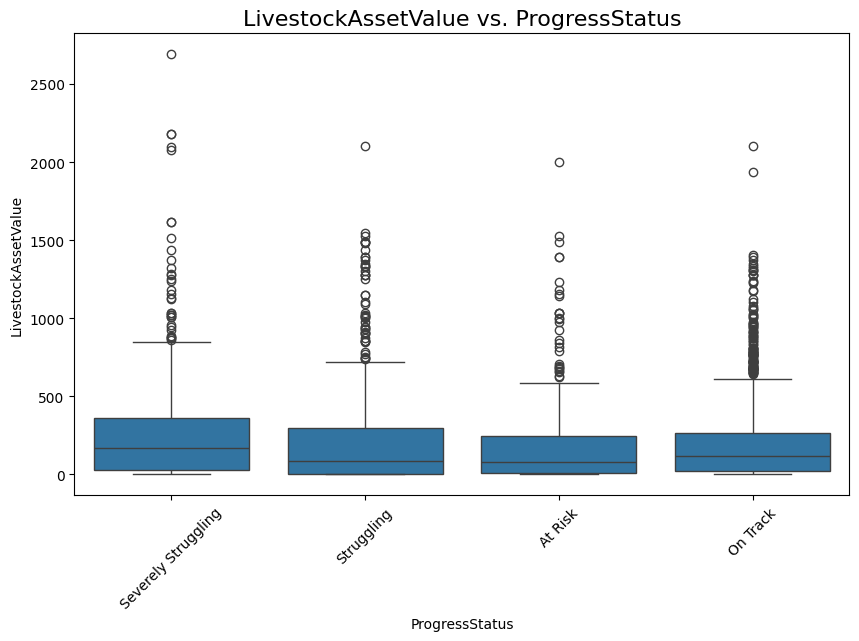

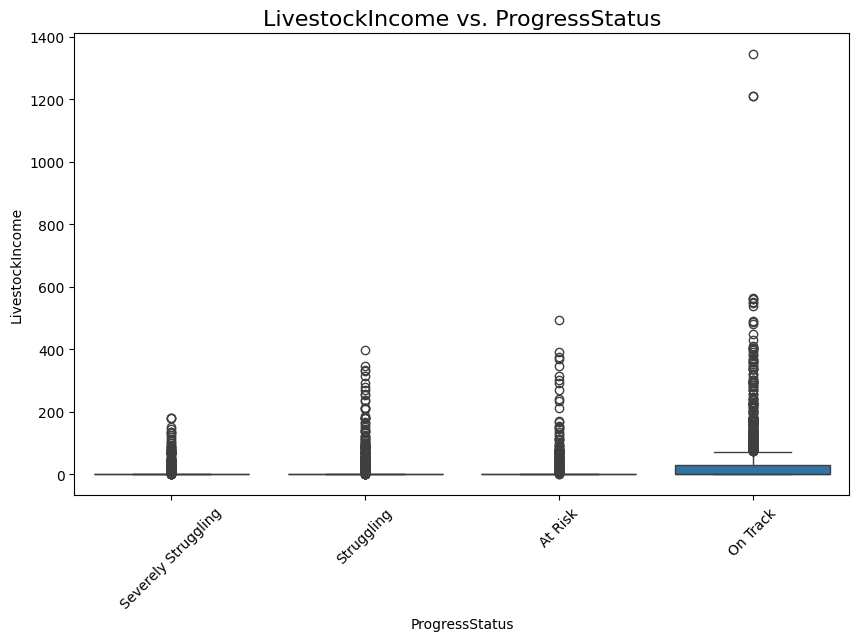

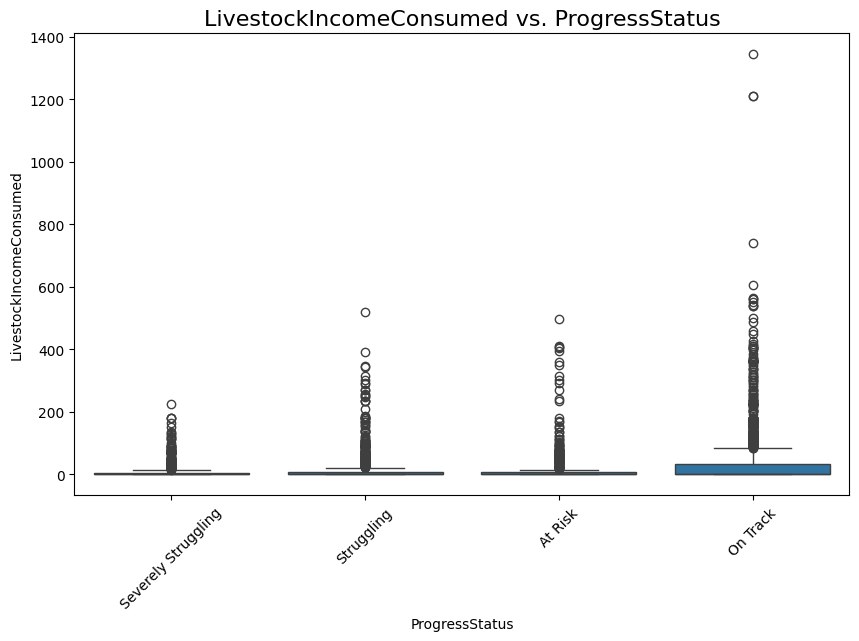

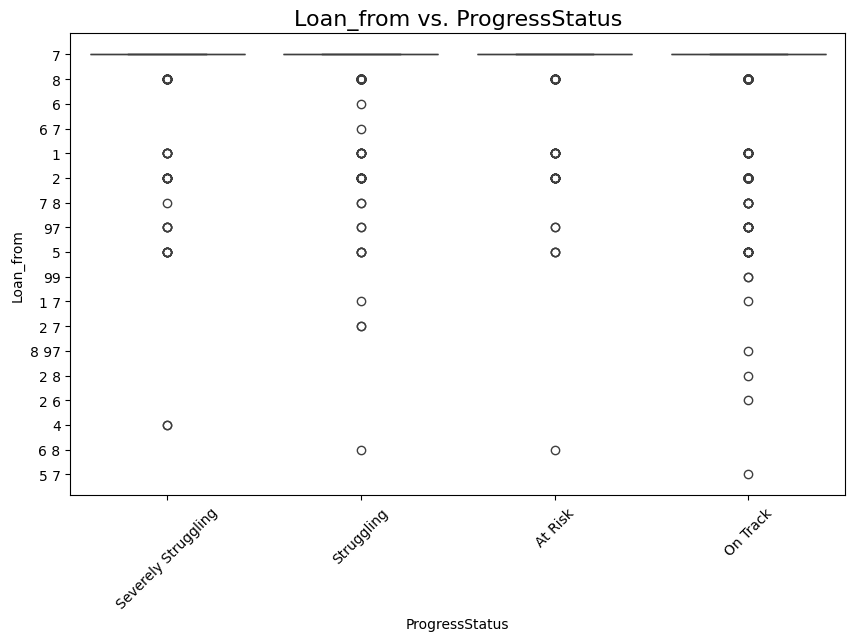

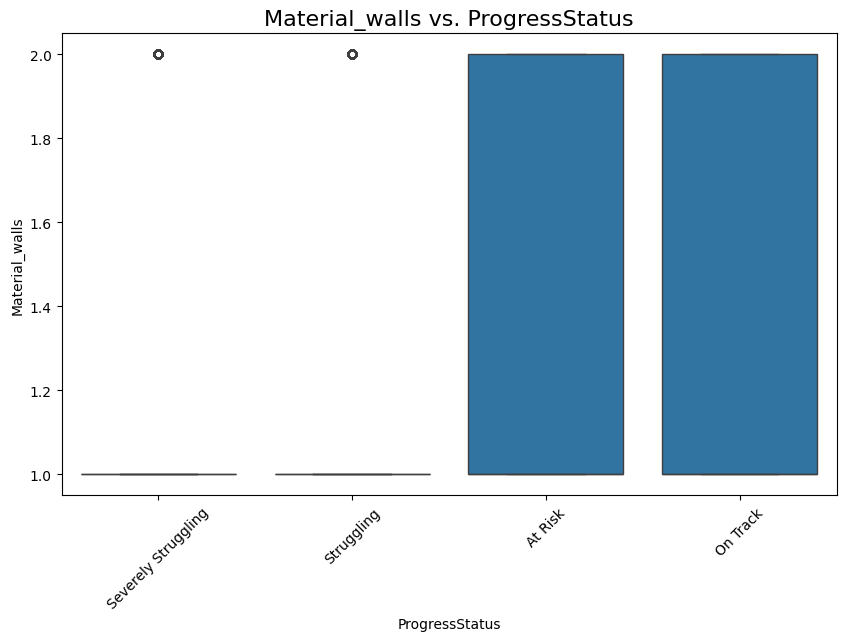

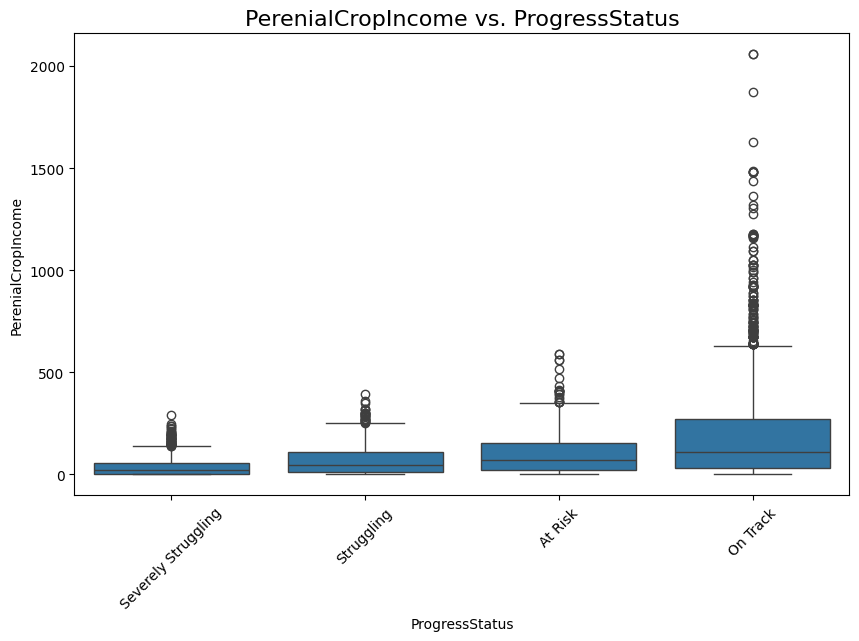

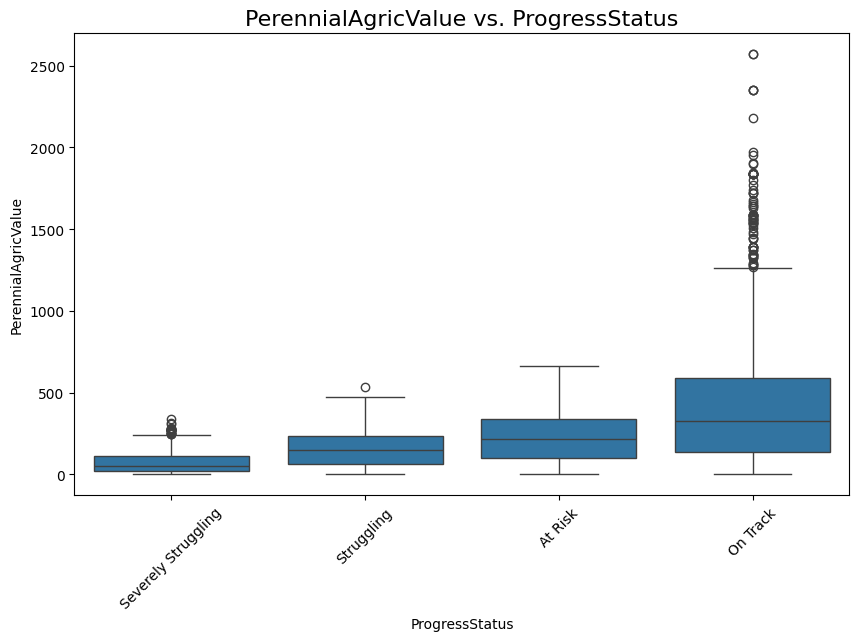

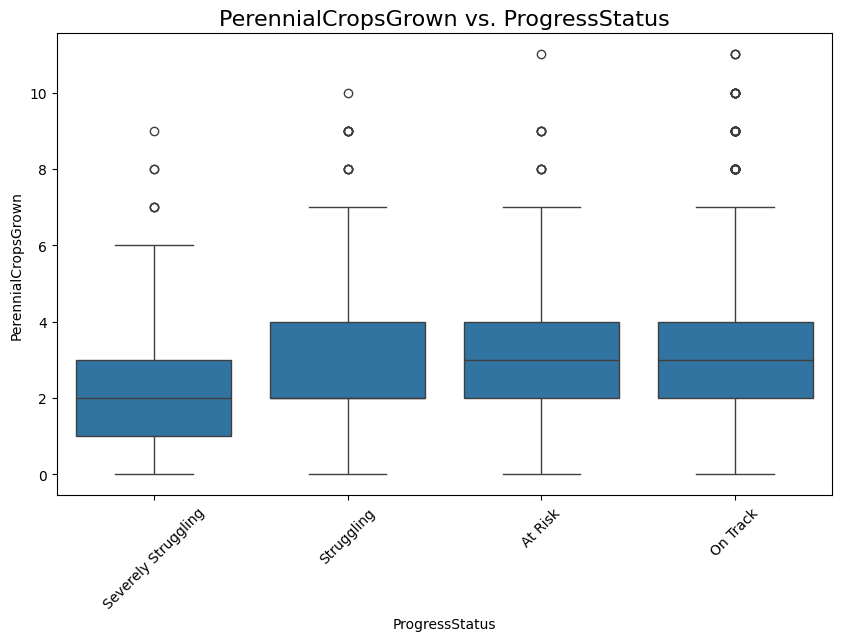

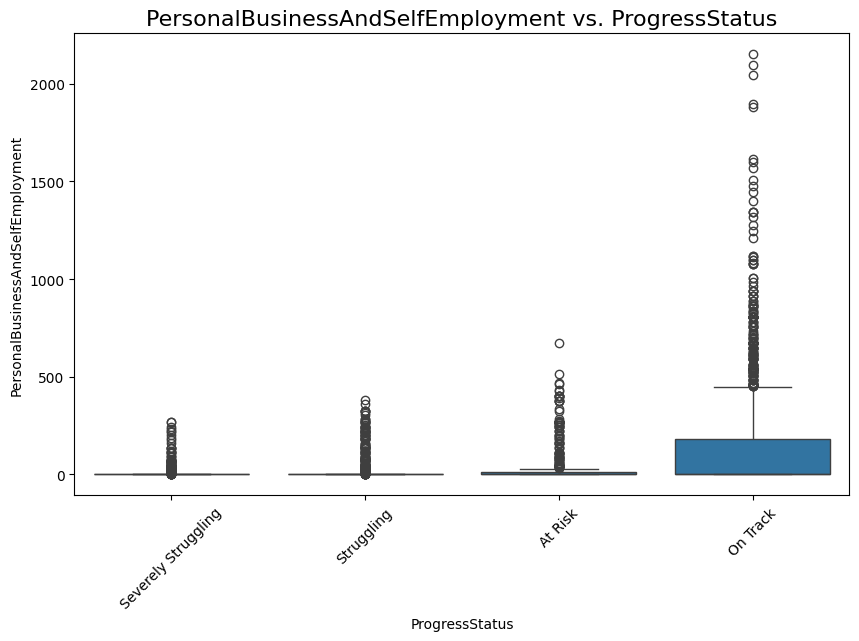

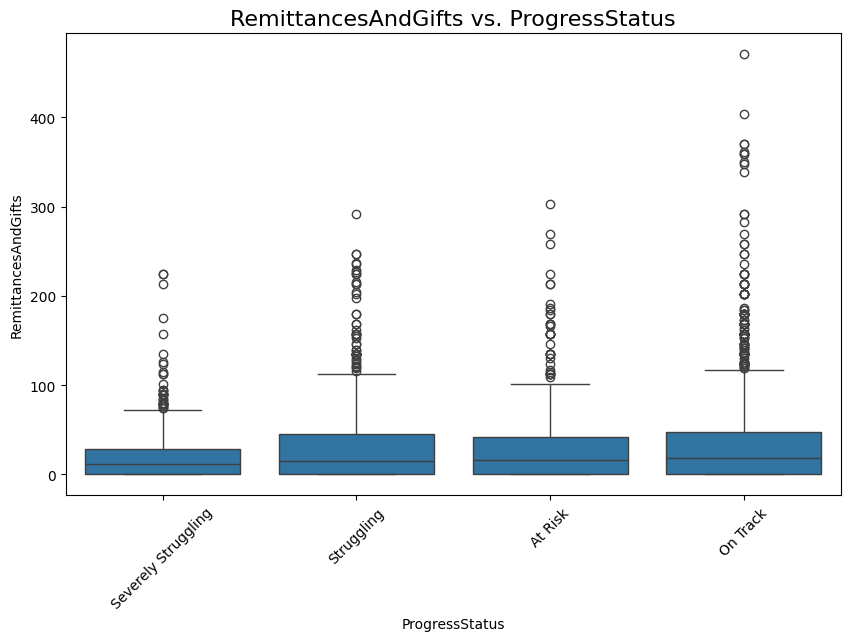

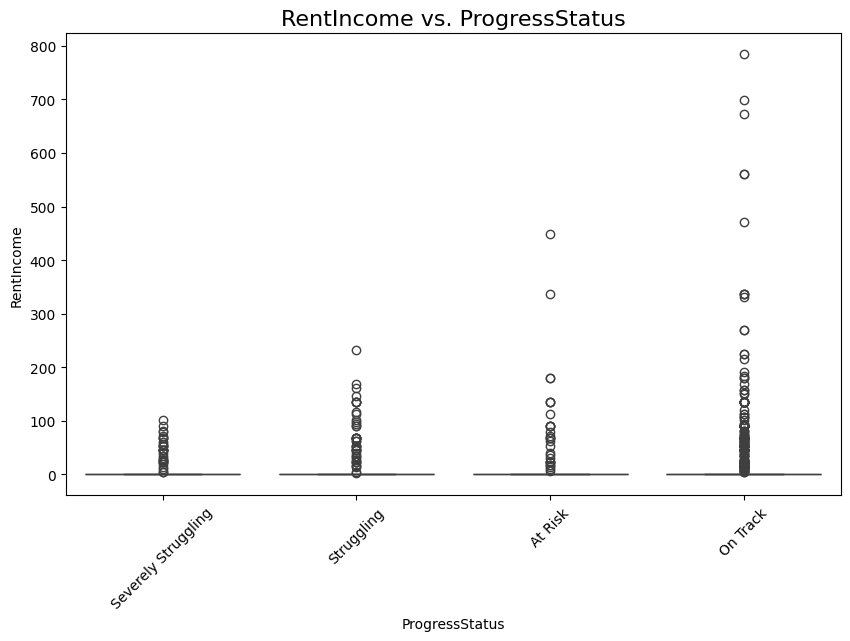

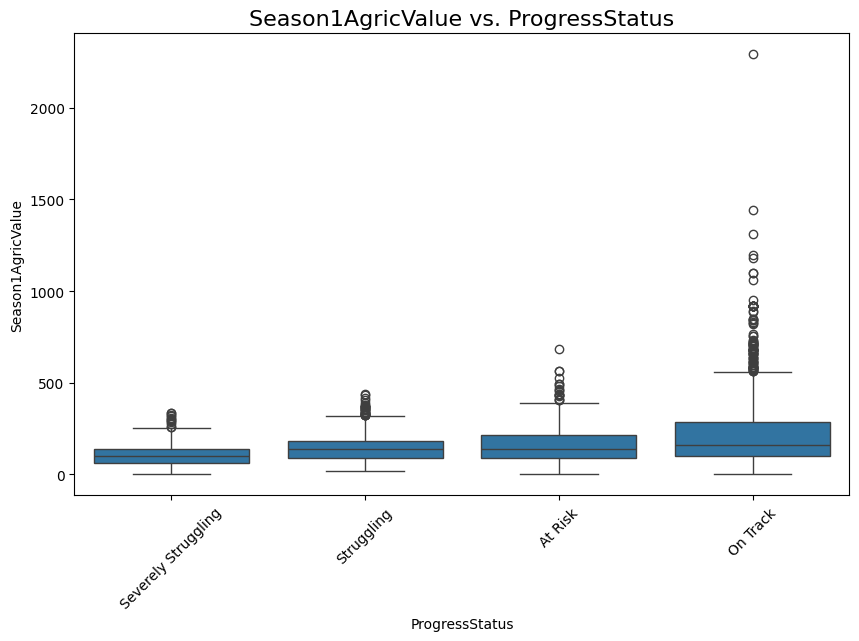

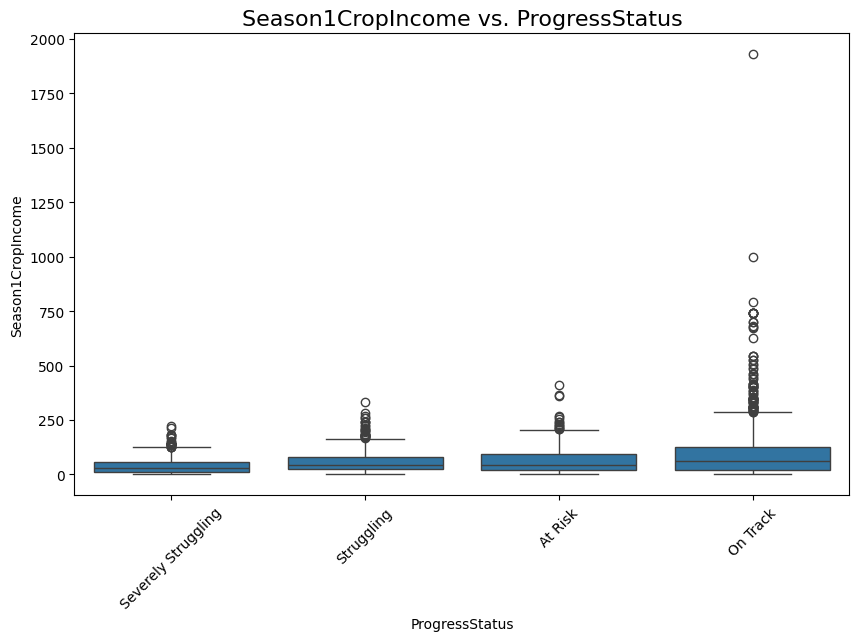

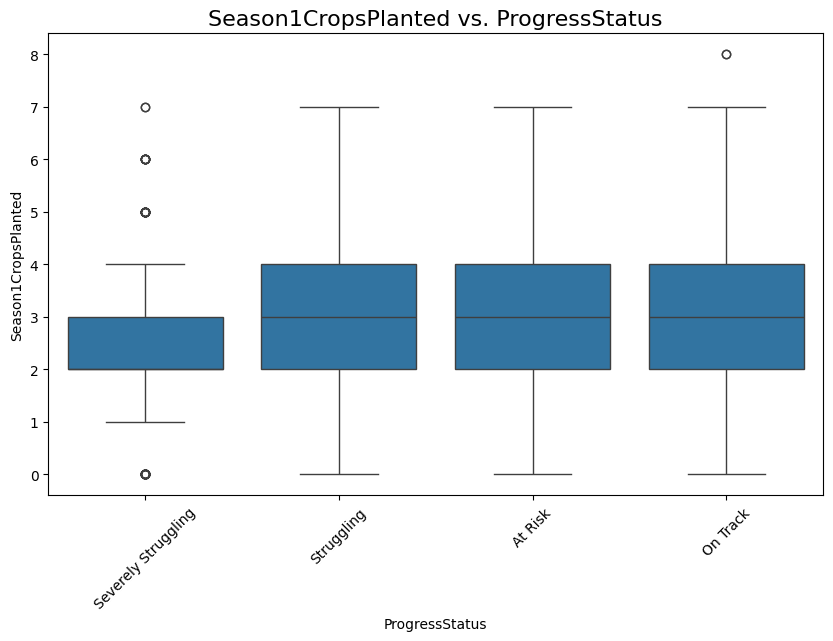

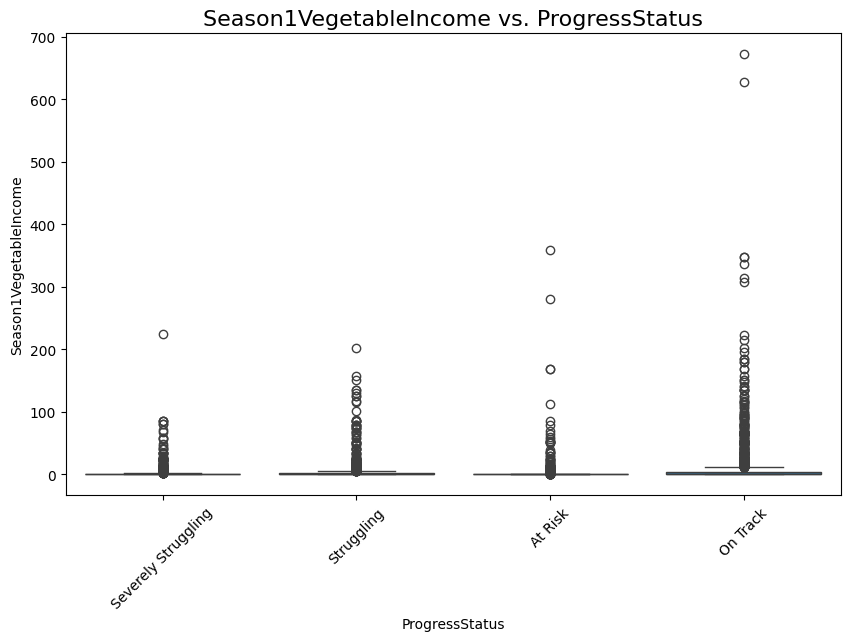

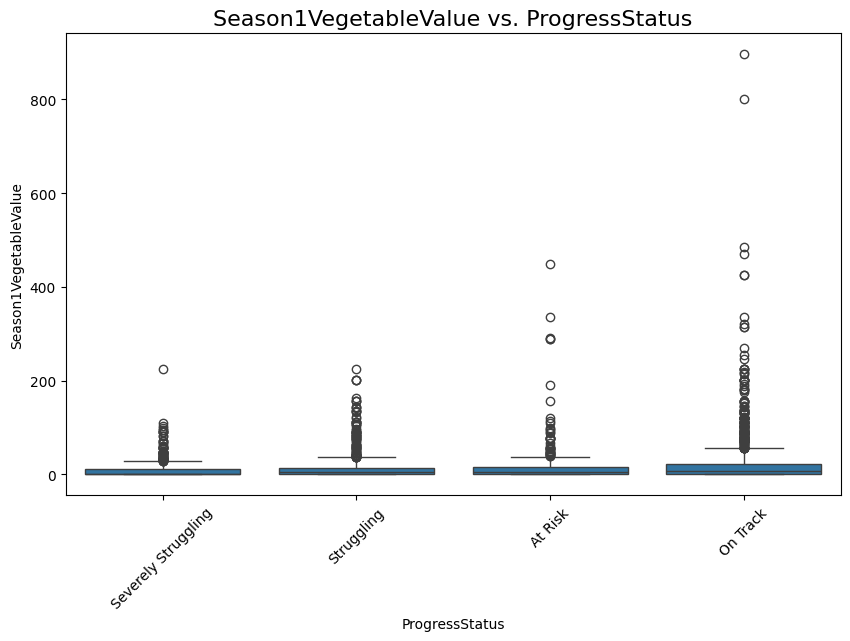

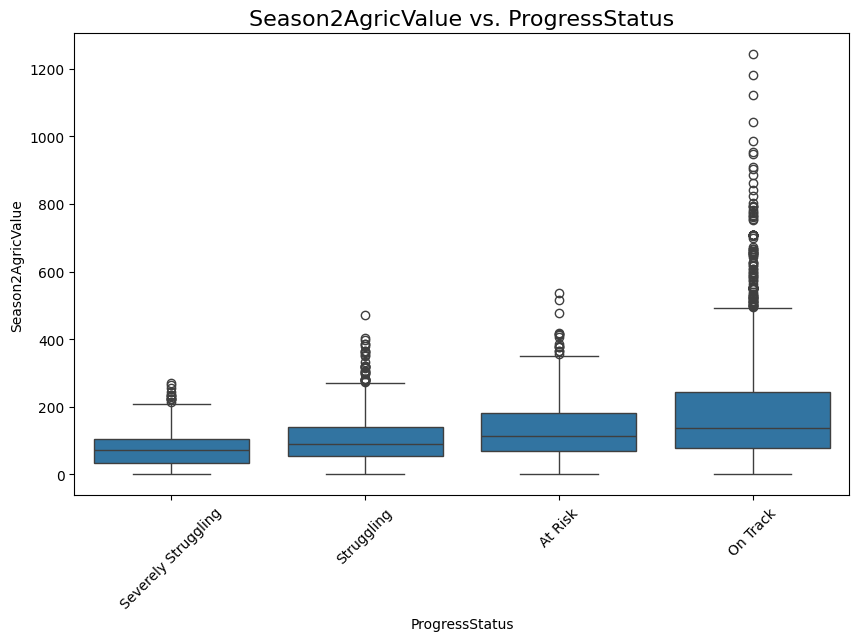

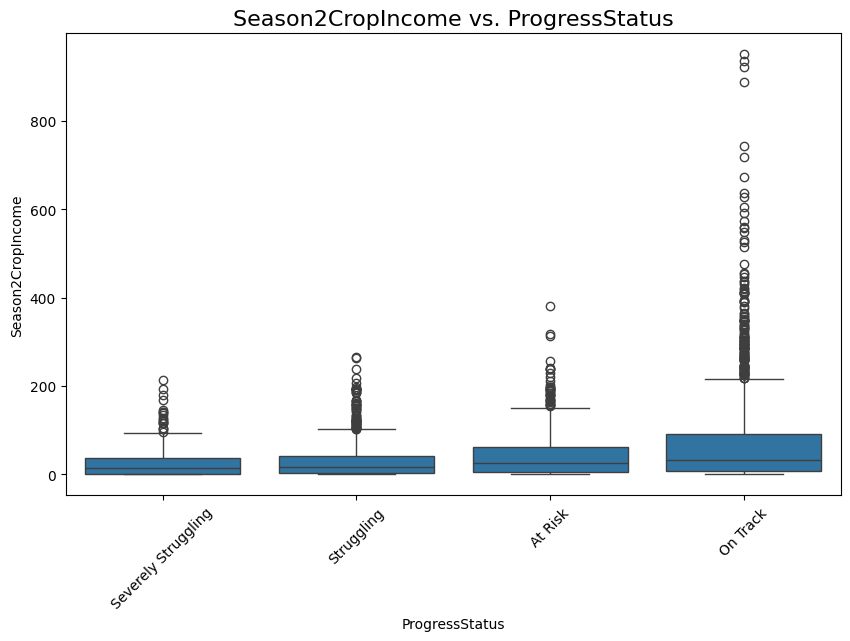

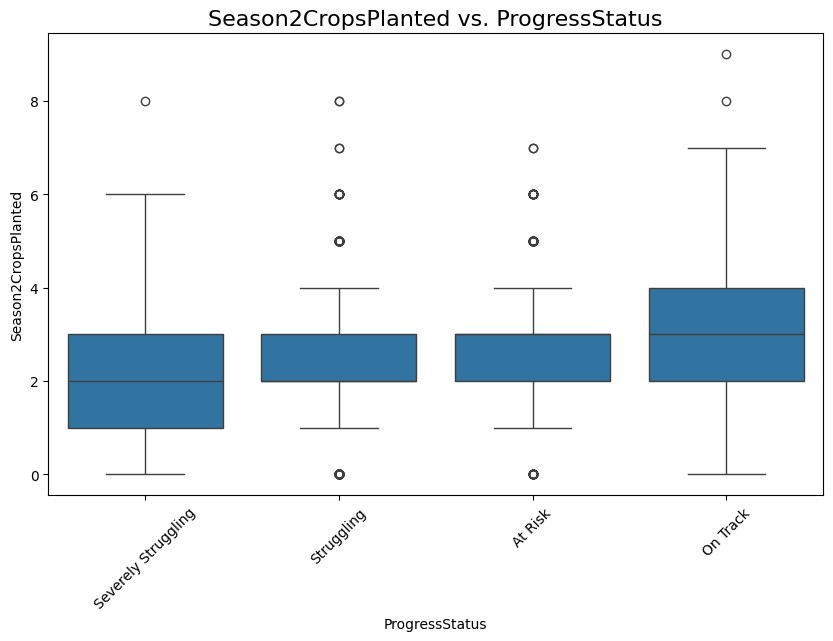

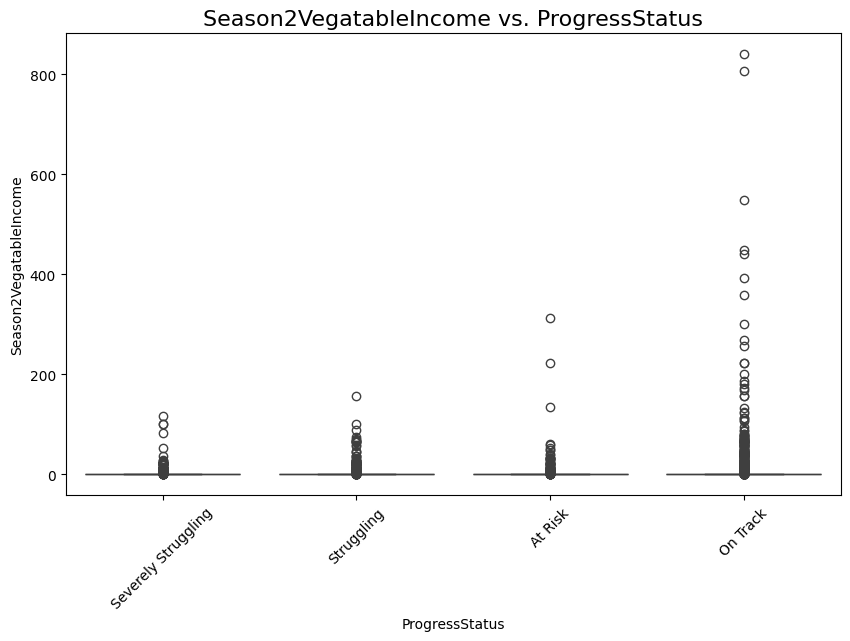

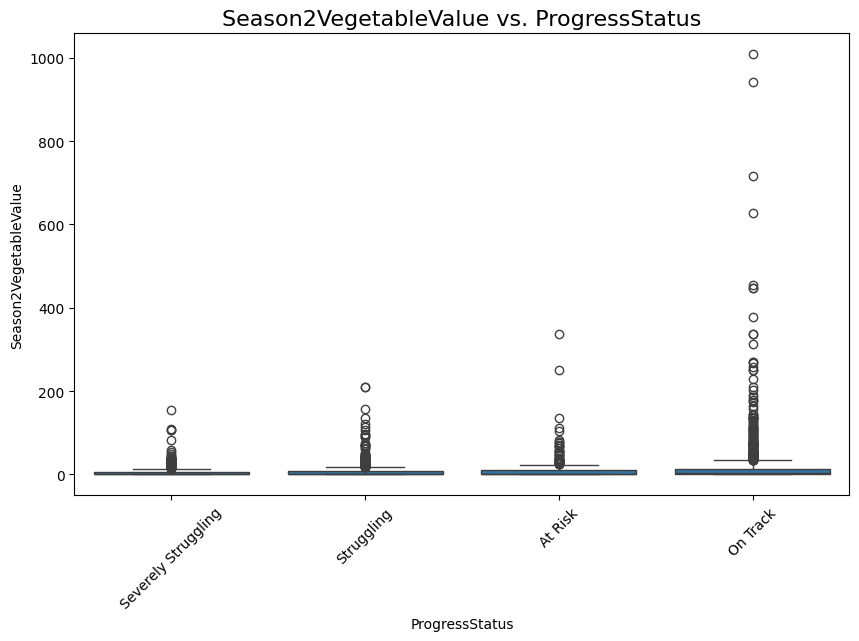

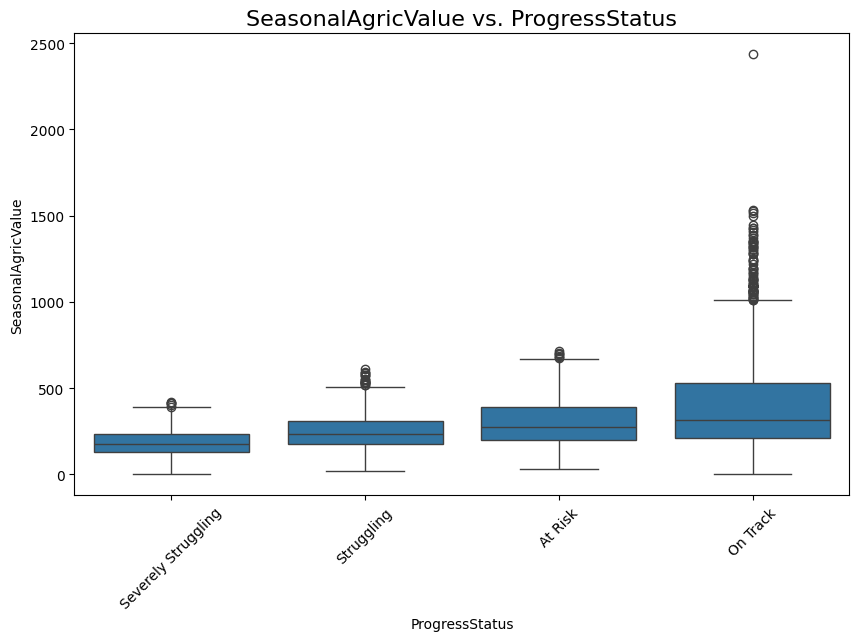

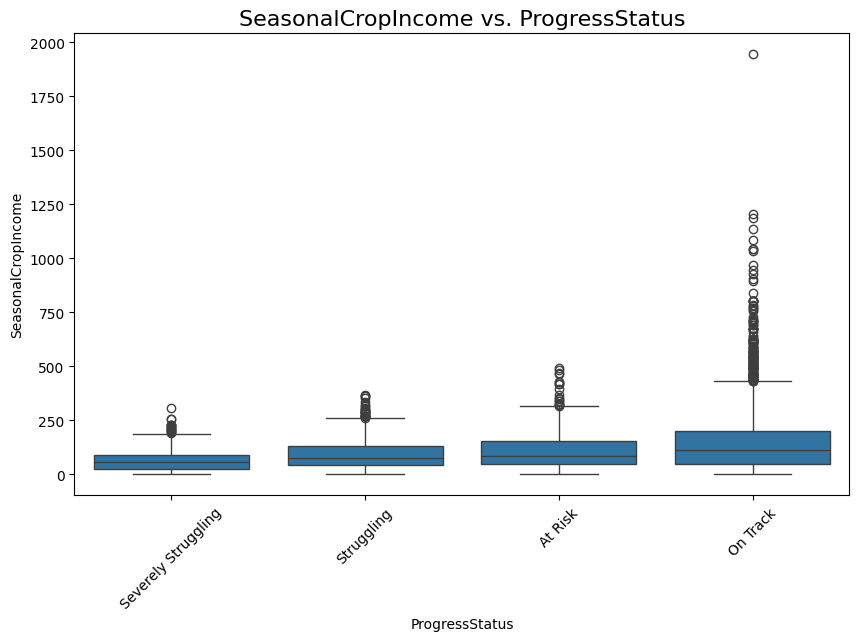

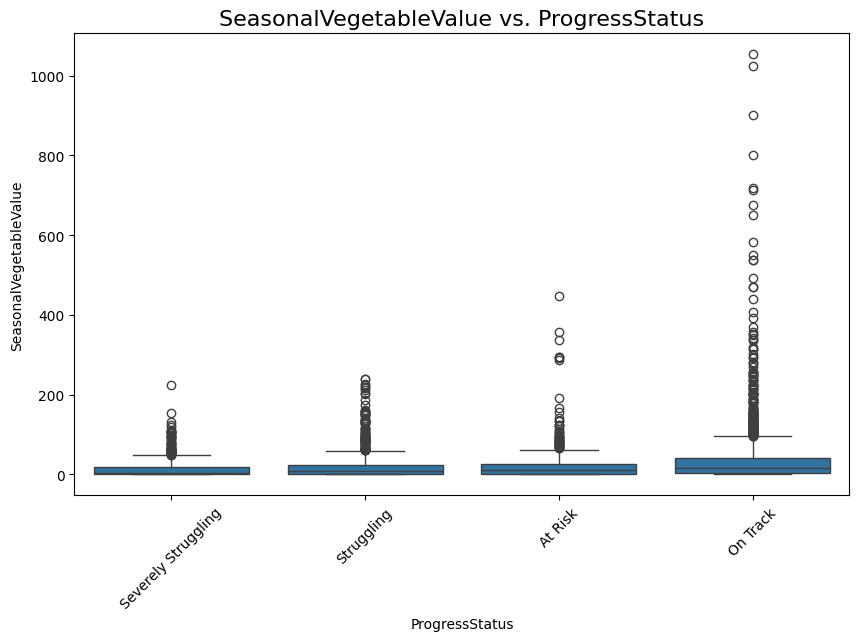

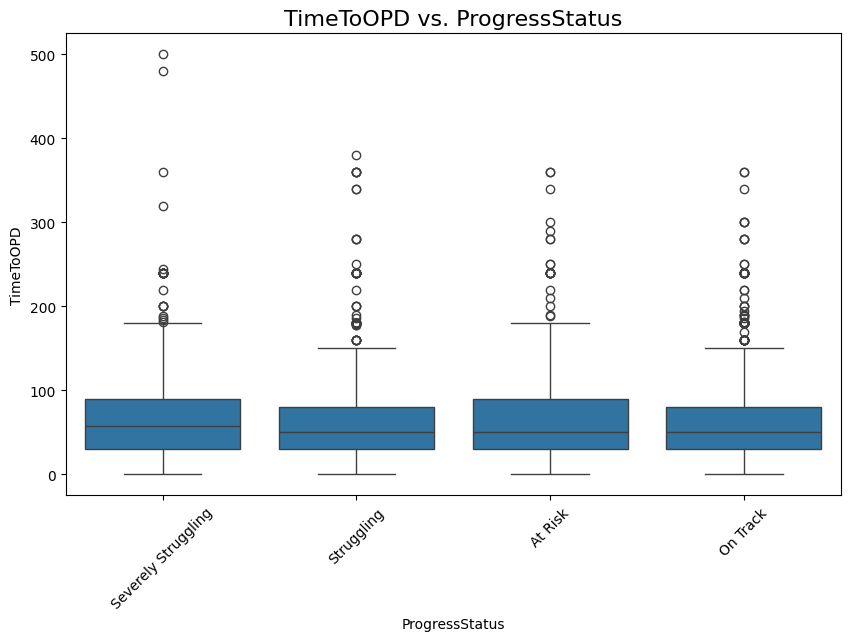

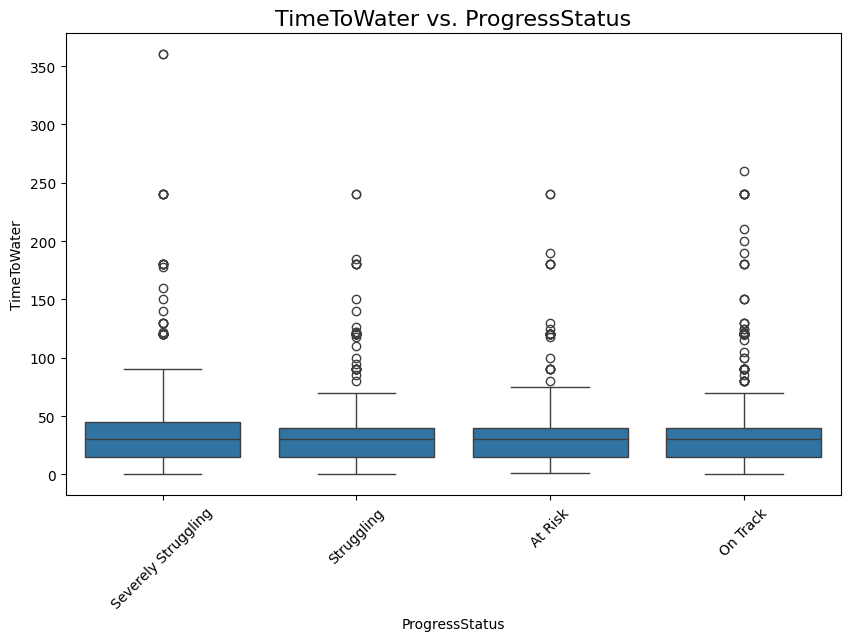

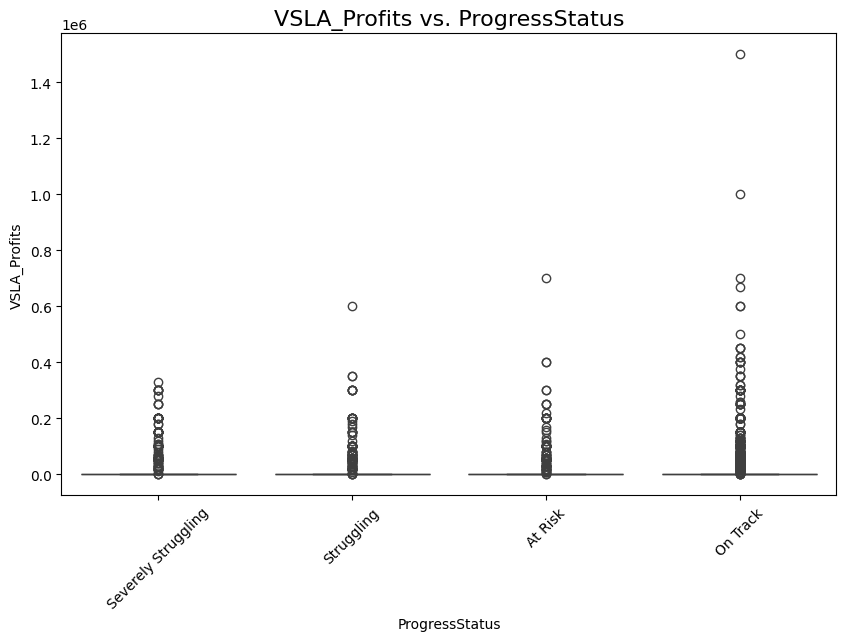

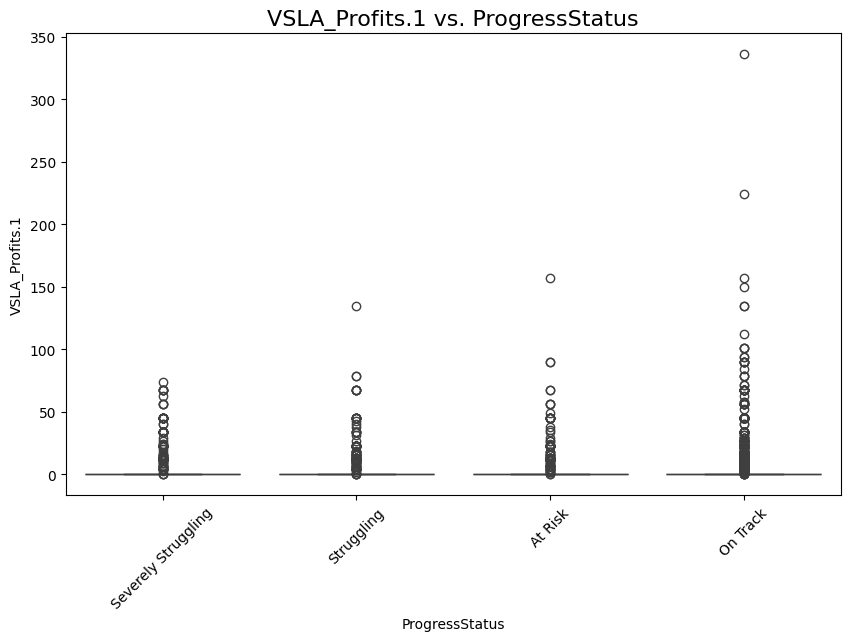

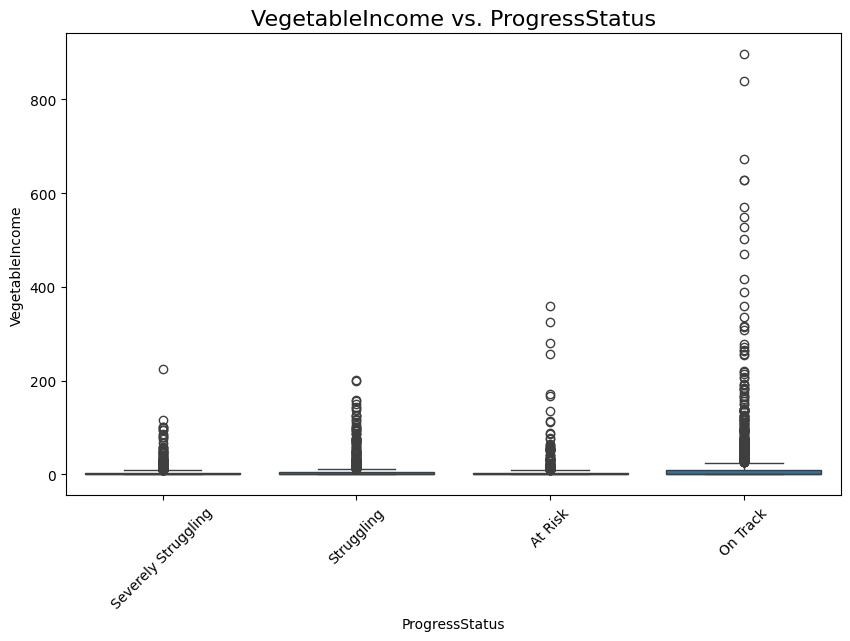

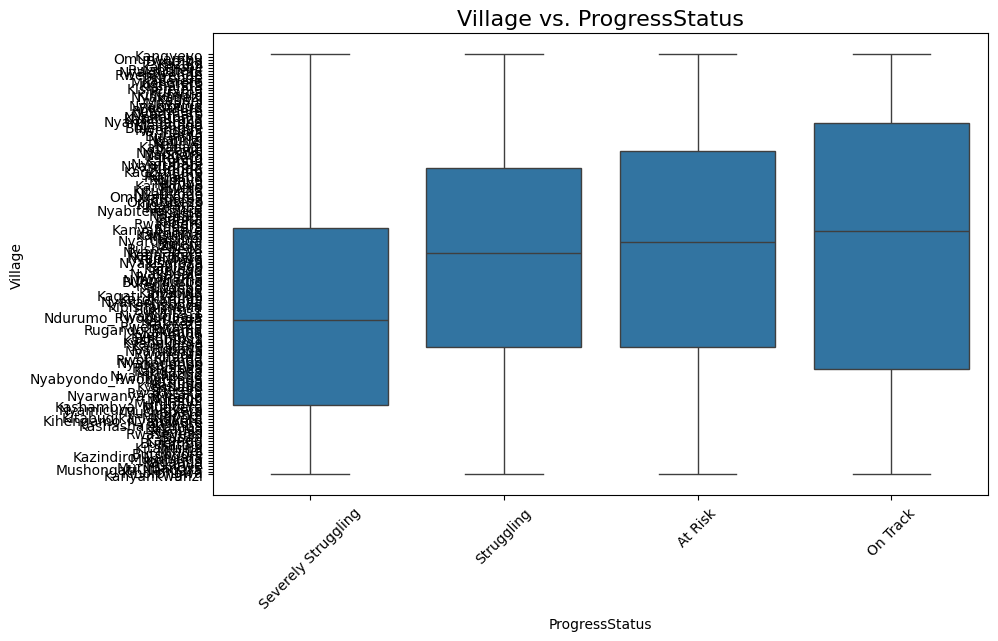

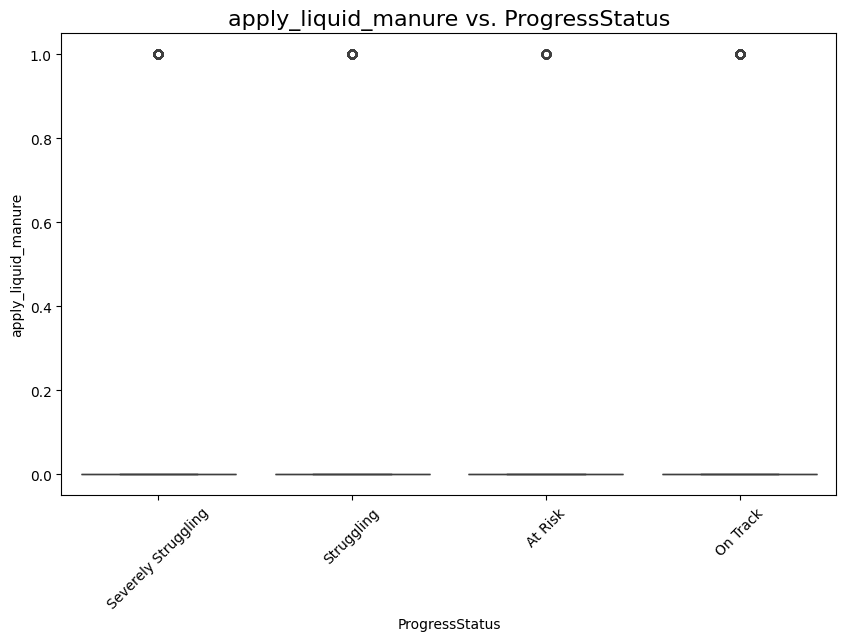

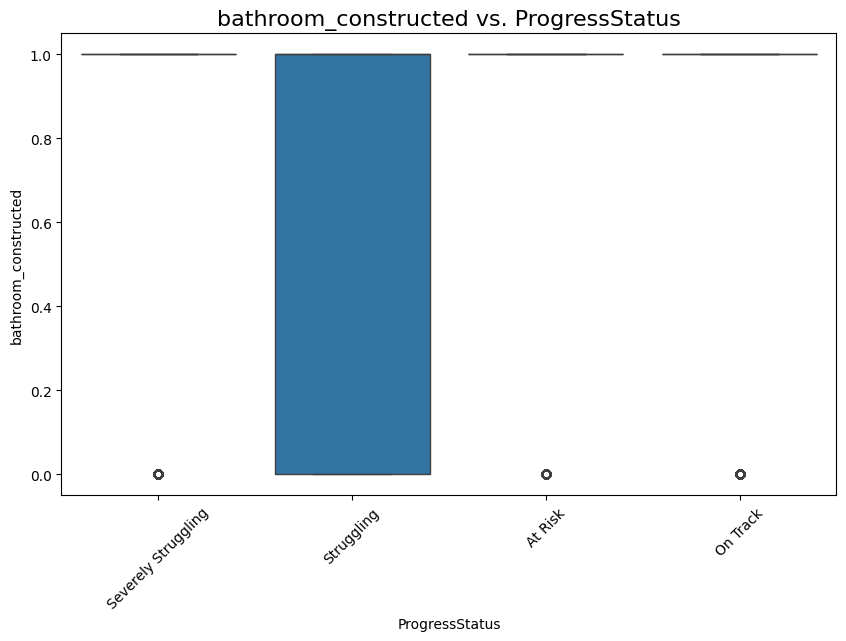

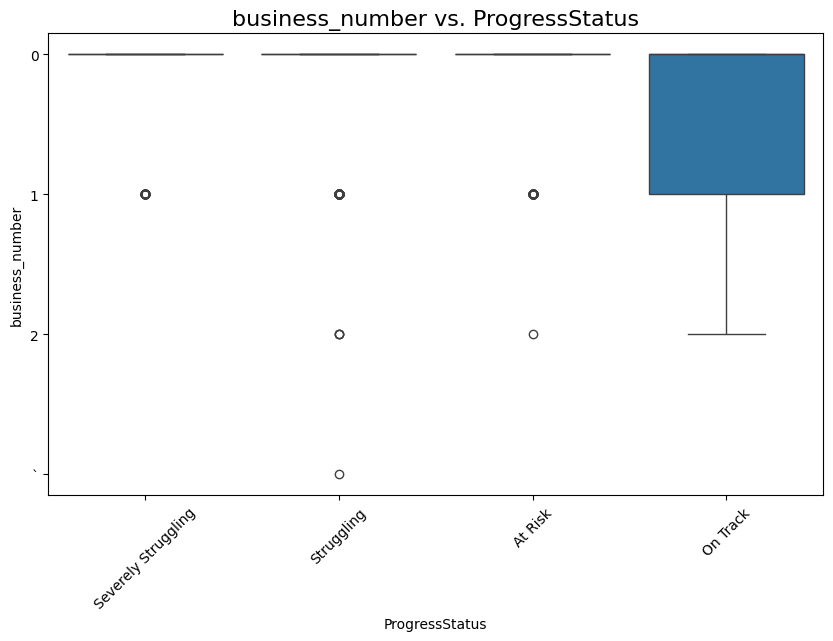

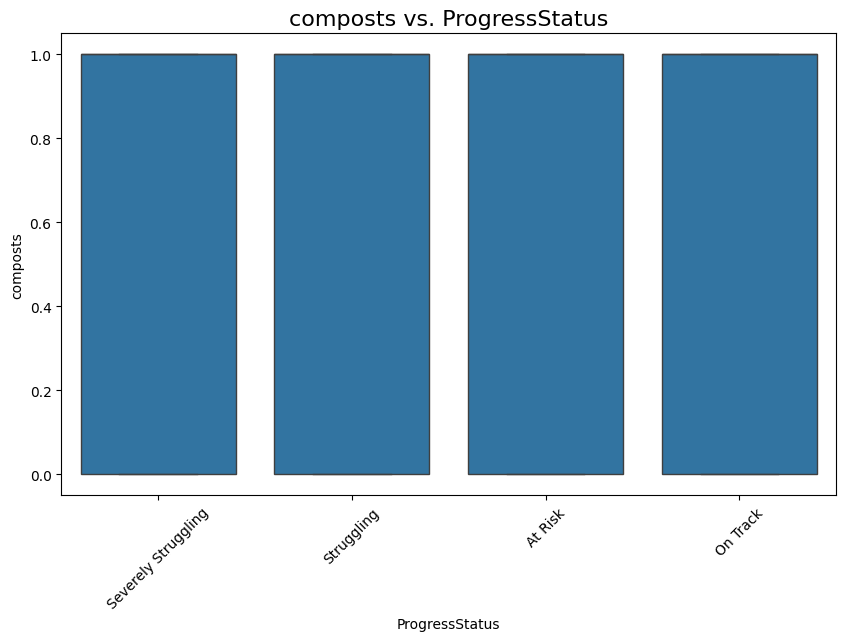

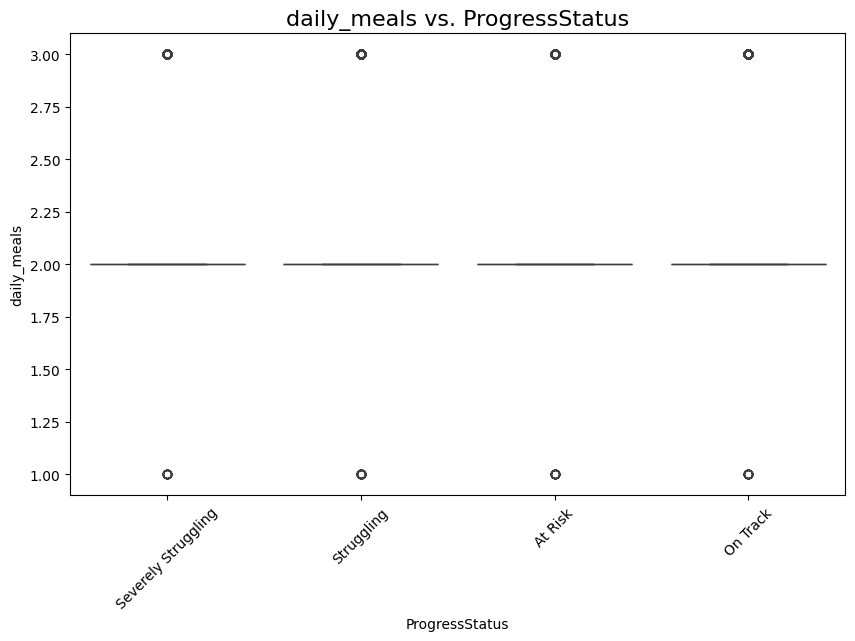

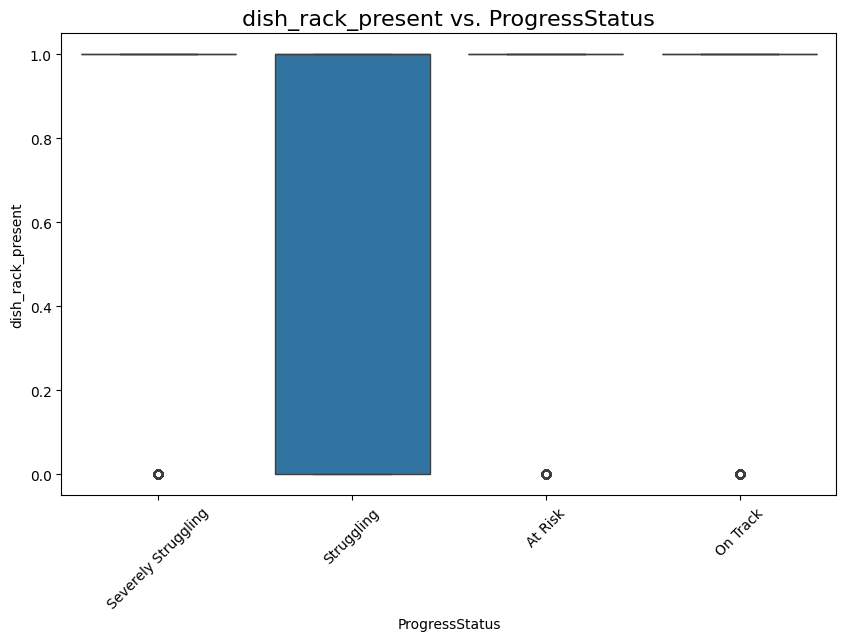

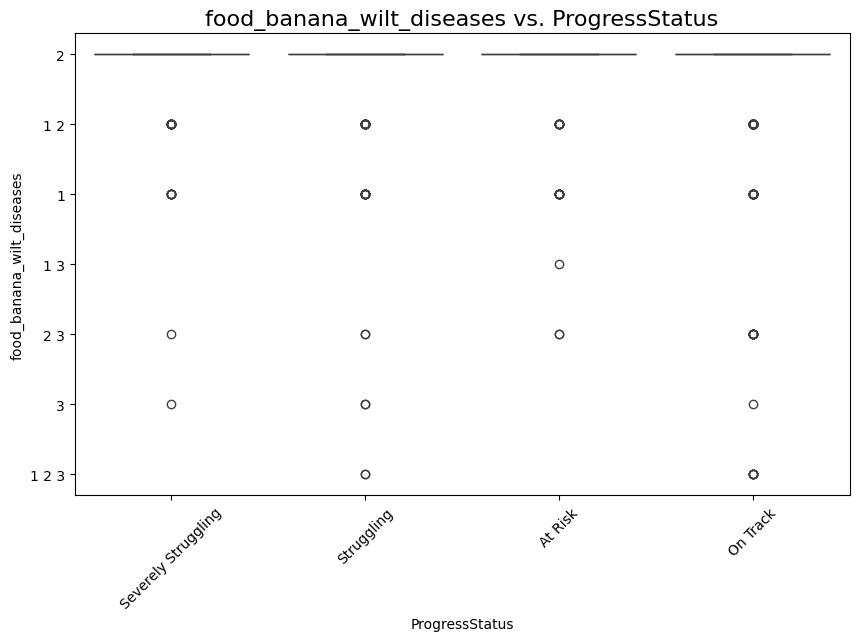

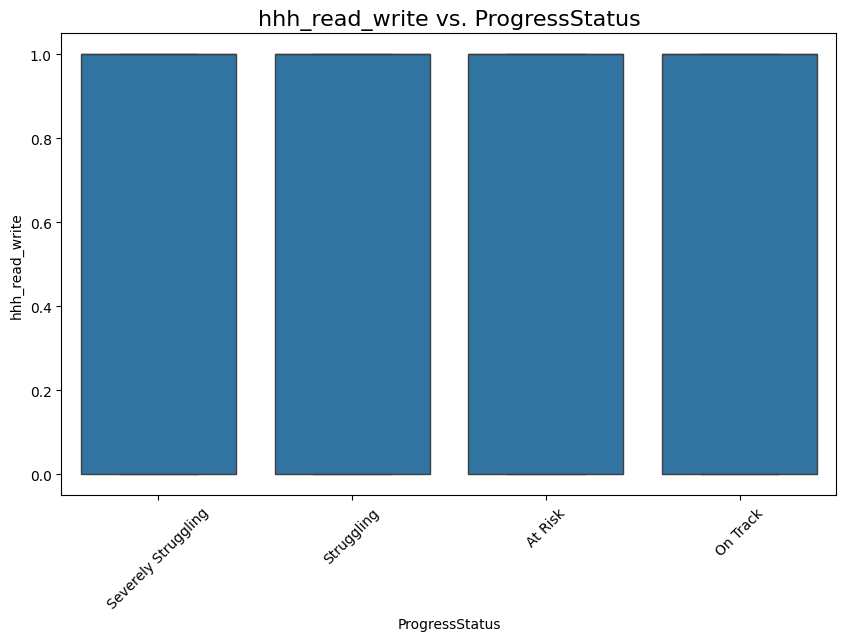

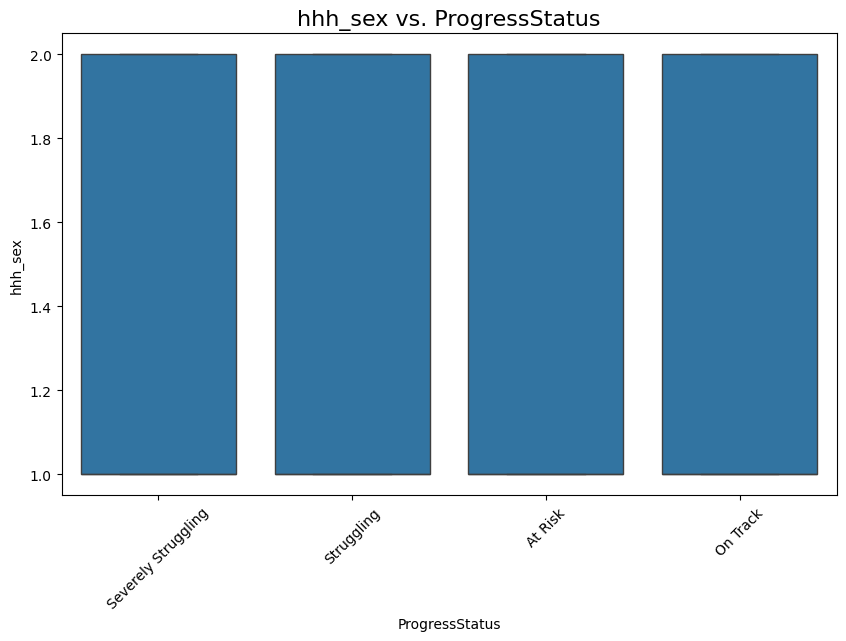

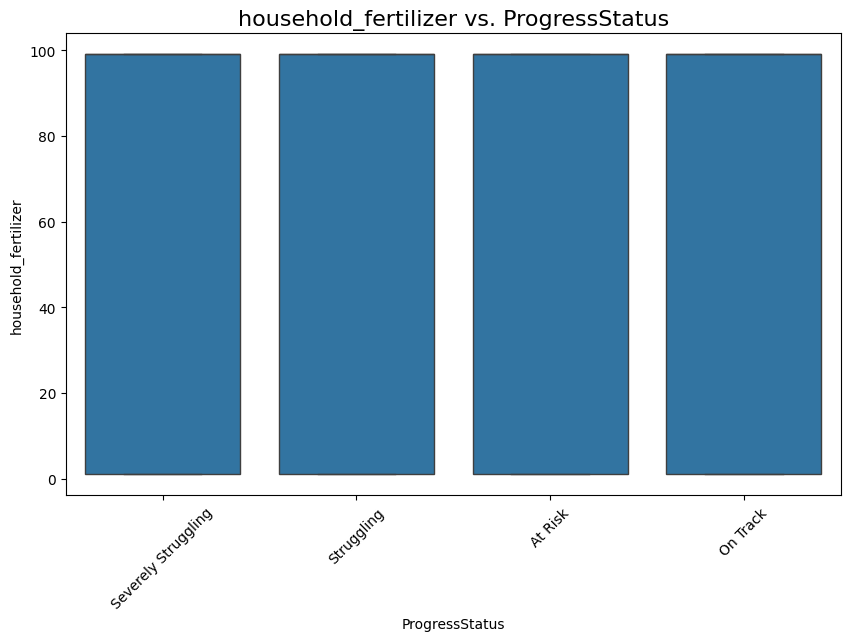

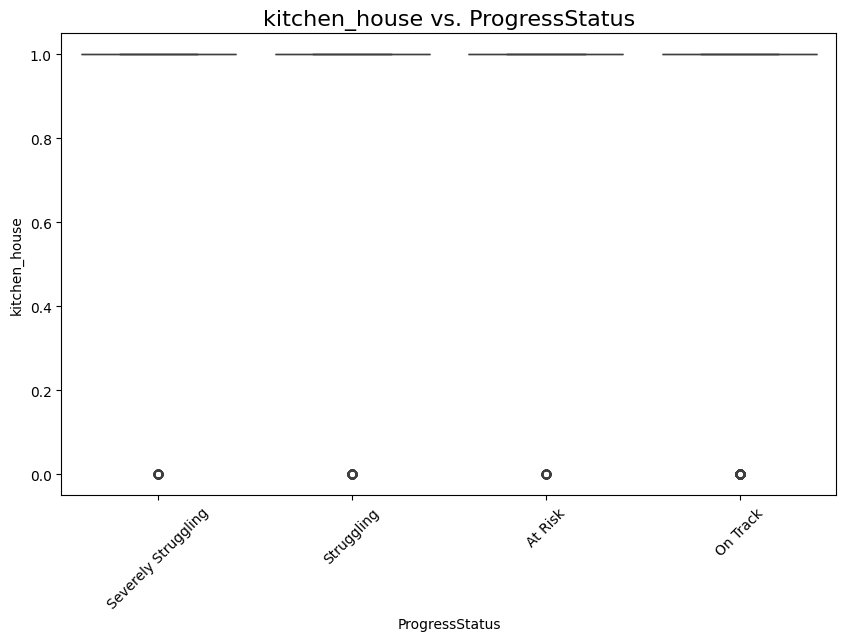

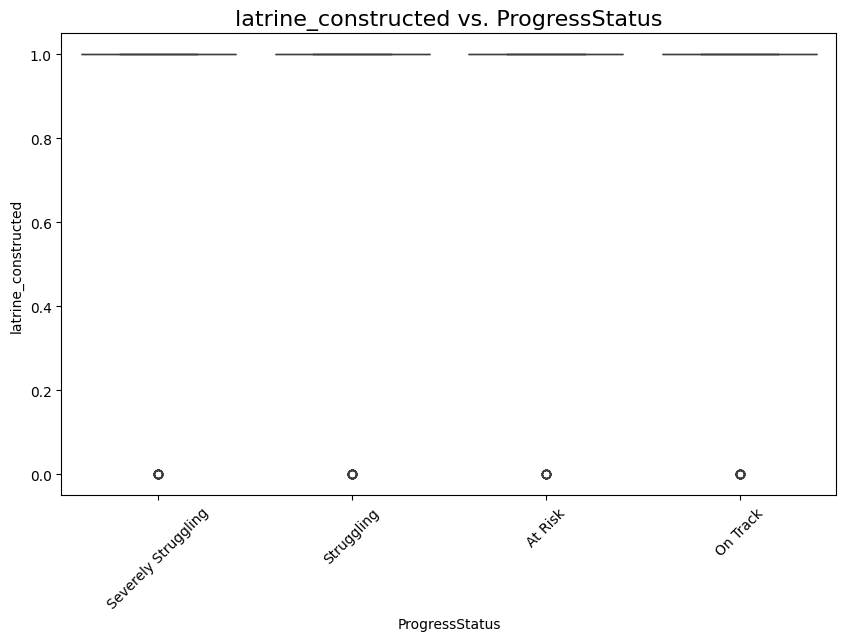

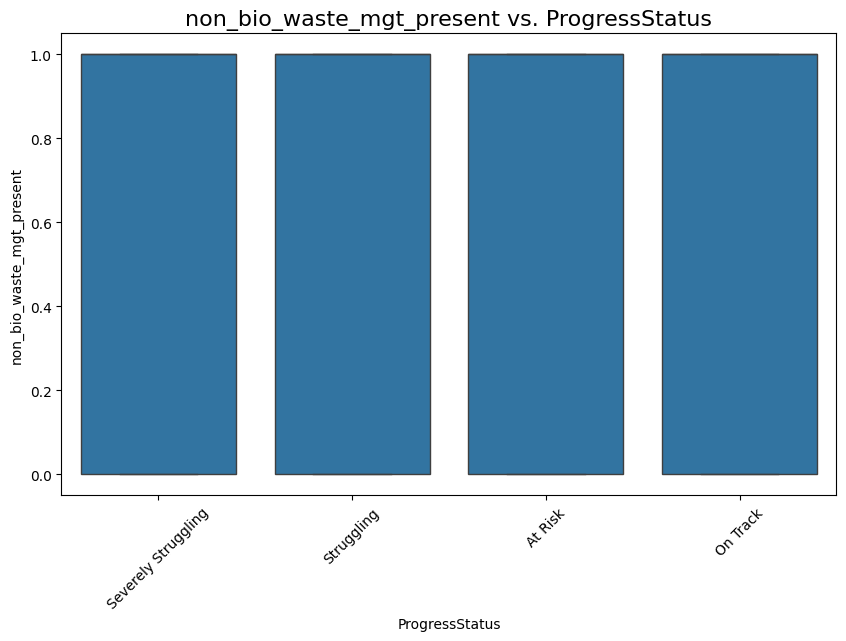

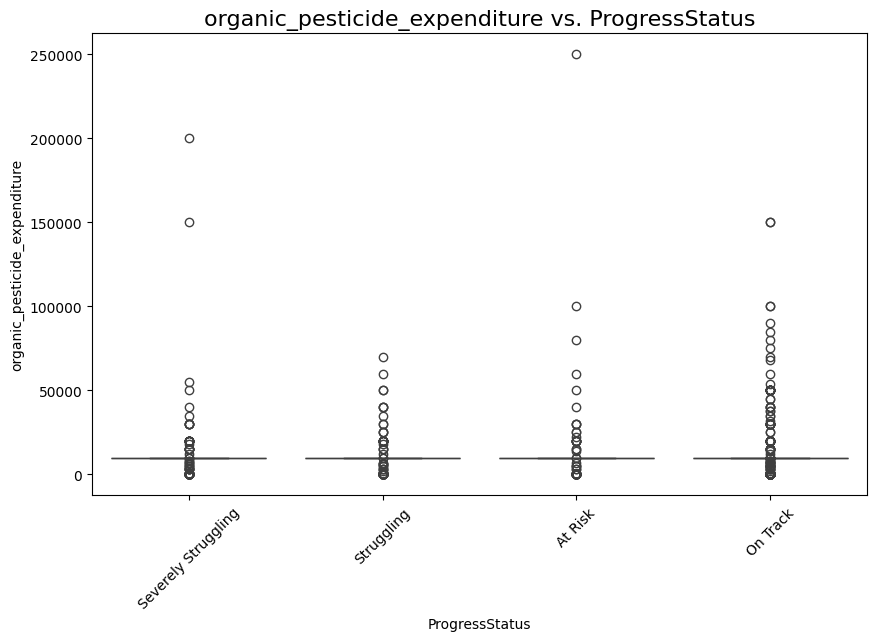

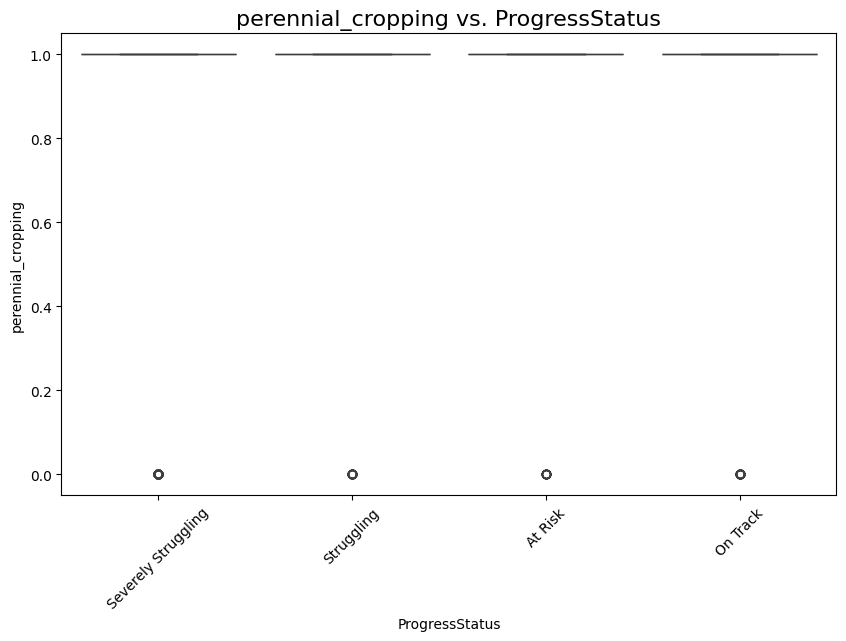

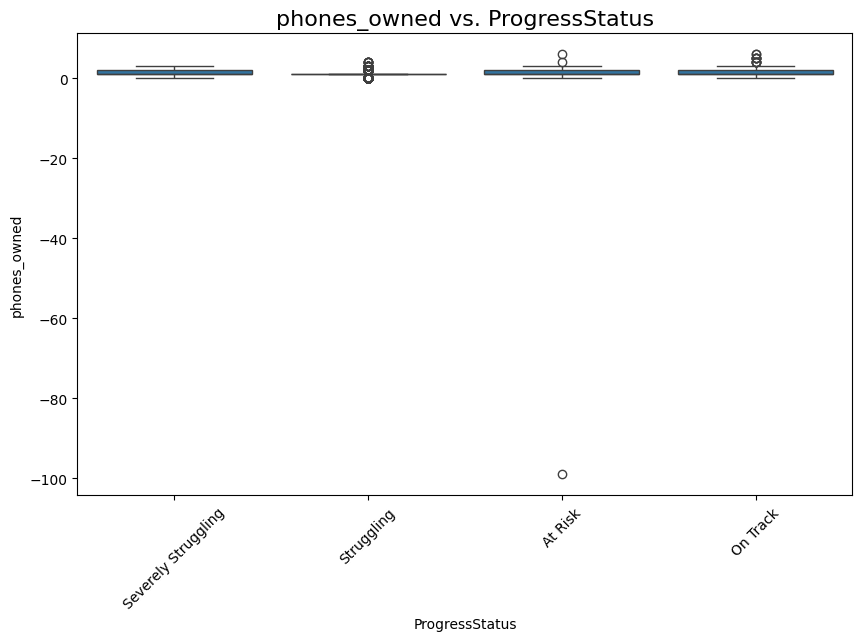

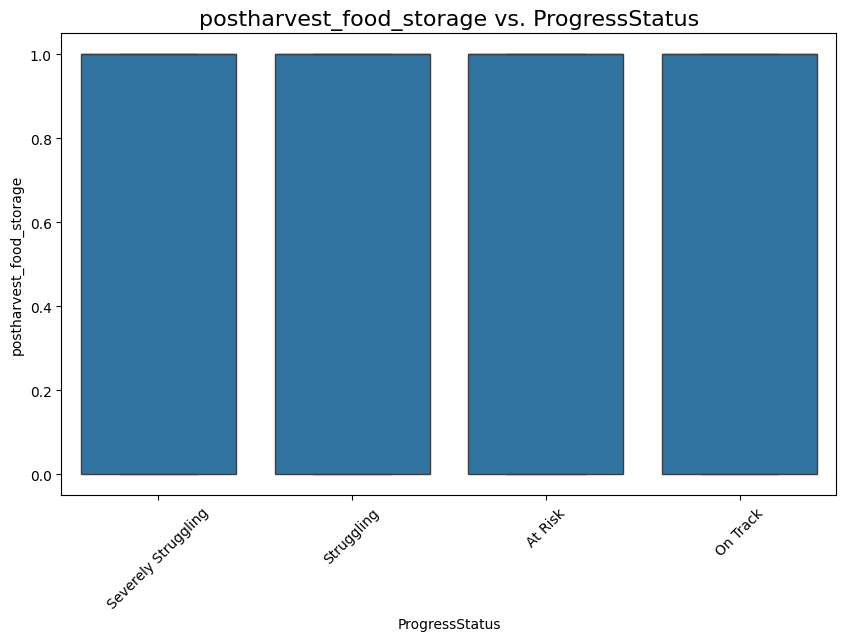

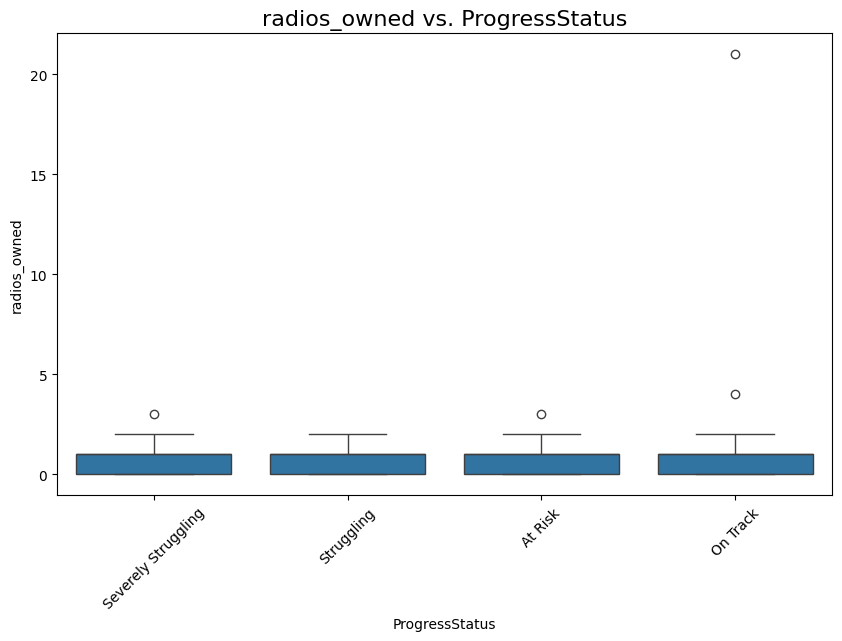

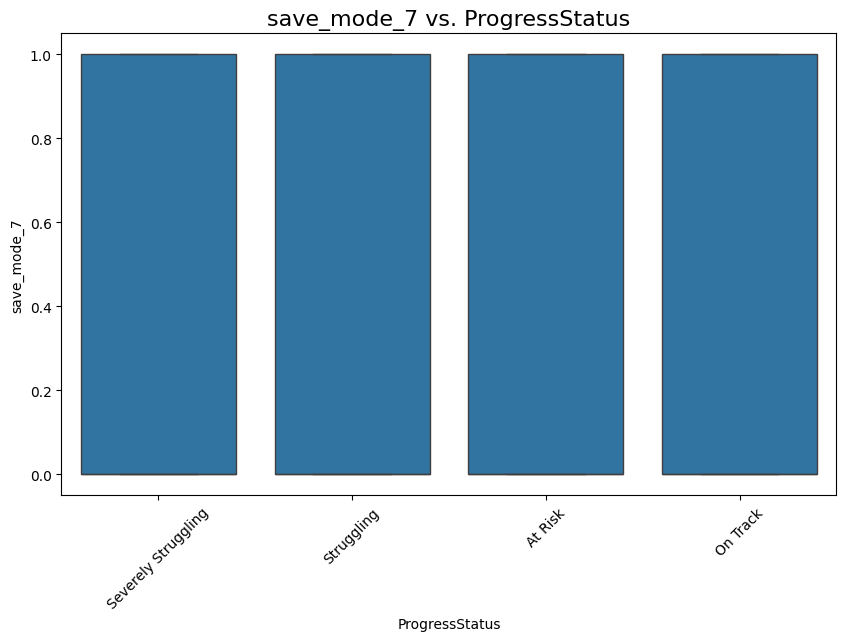

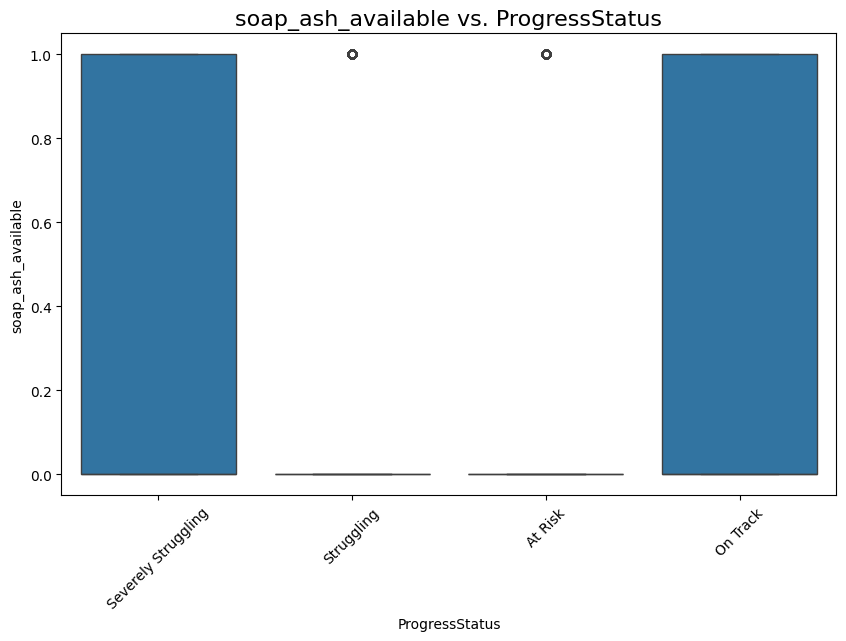

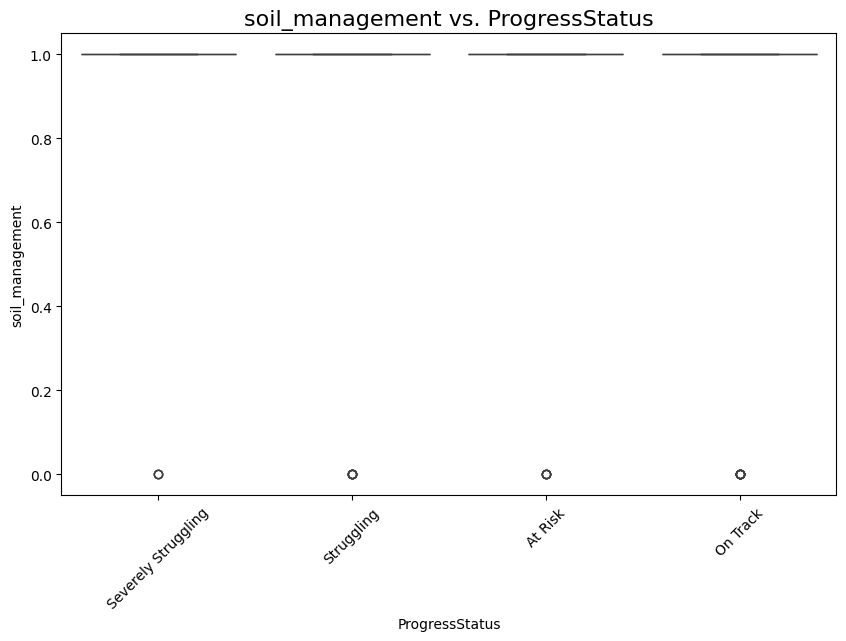

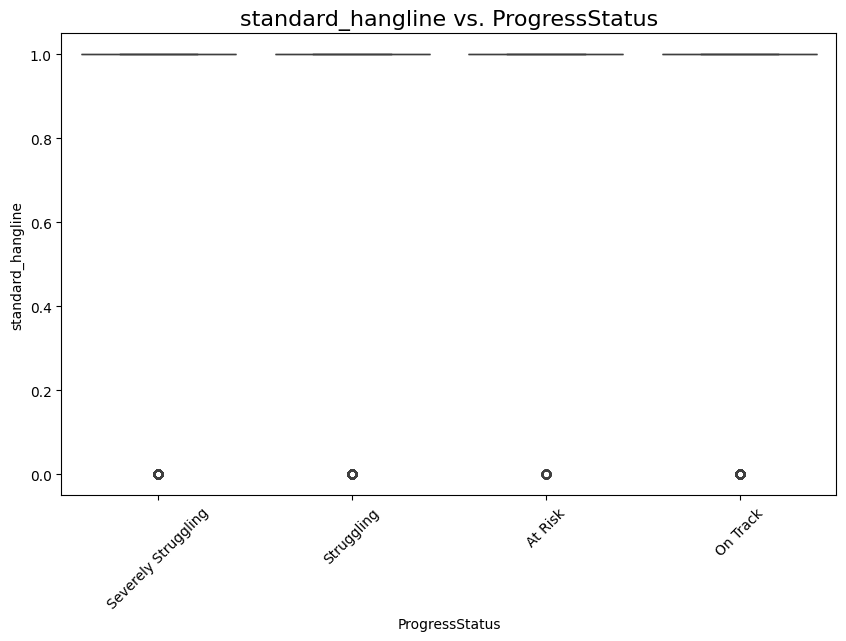

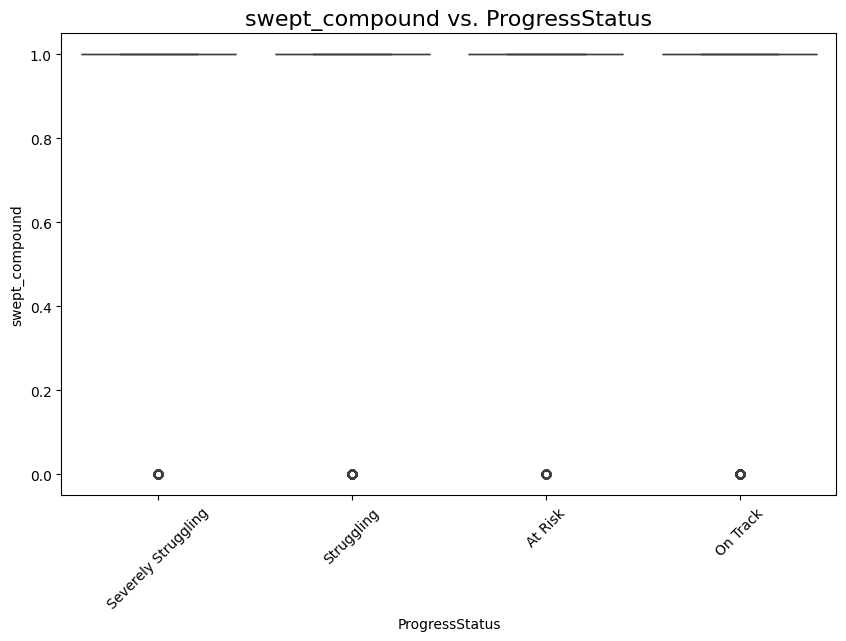

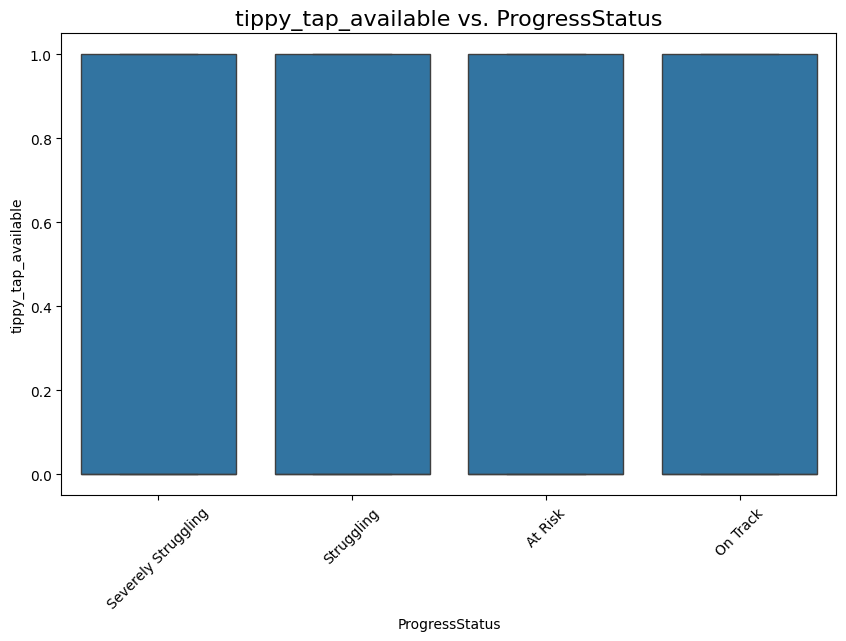

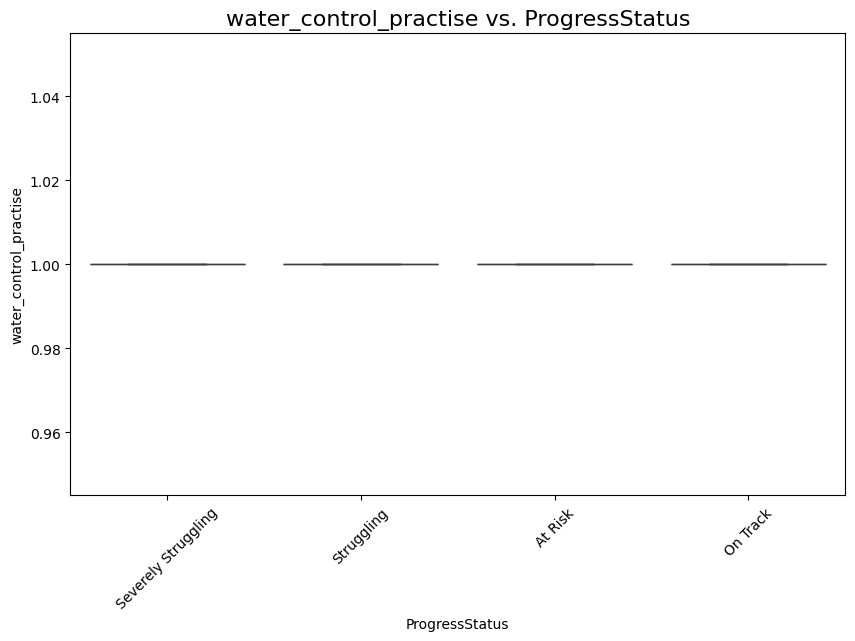

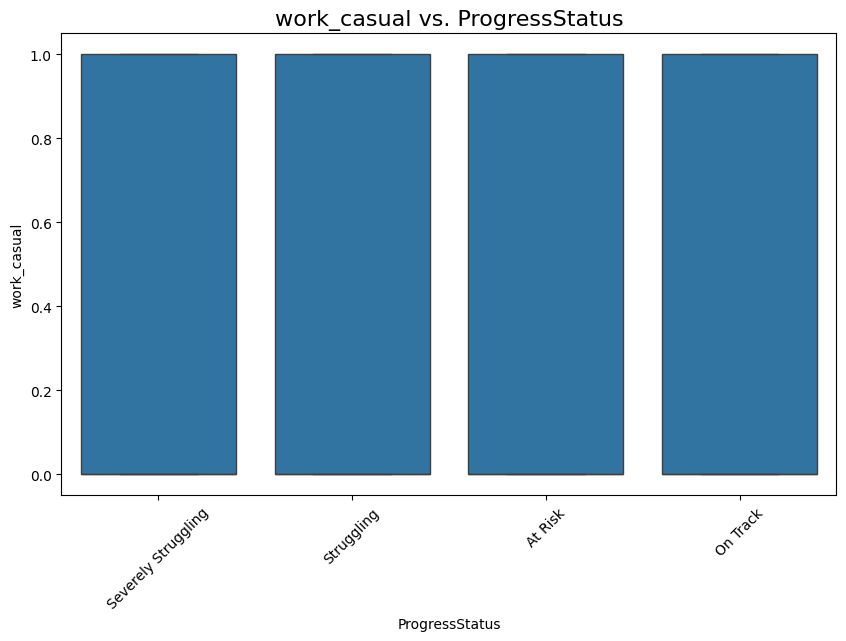

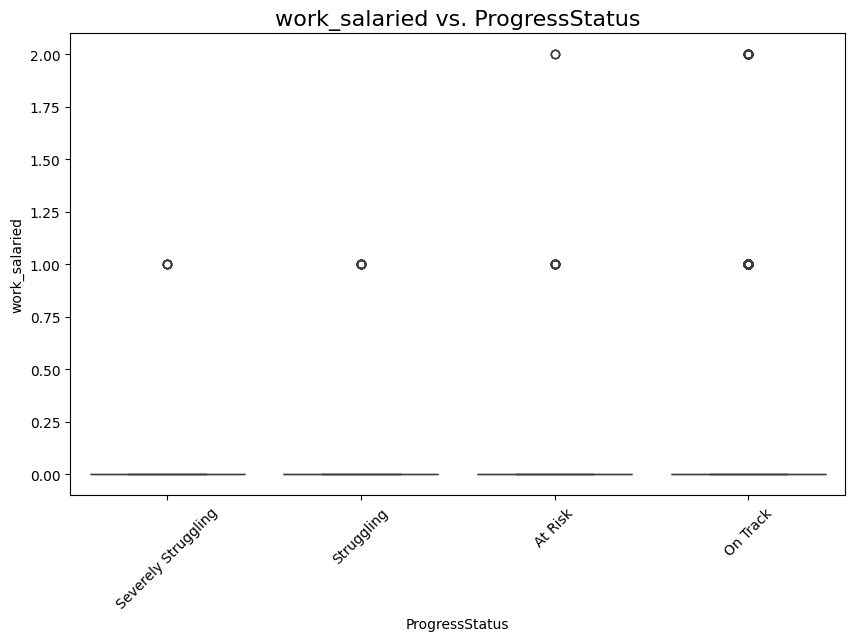

In [420]:

# Plot boxplots for numerical features against the target variable
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ProgressStatus', y=feature, data=data)
    plt.title(f'{feature} vs. ProgressStatus', fontsize=16)
    plt.xticks(rotation=45)
    plt.show()


In [421]:
data.head()

District    Cluster    Village        HouseHoldID  HouseholdSize  TimeToOPD  \
0  Kanungu  Rutendere   Kangyeyo  KAN-KAN-FER-K1768              3         60   
1  Kanungu    Kihanda  Omurwambu  KAN-OMU-KAN-K4711              3        120   
2  Kanungu   Bujengwe     Byumba  KAN-BYU-ANN-K4055              2         40   
3  Kanungu   Bujengwe     Byumba  KAN-BYU-YUS-K4026              8         15   
4  Kanungu   Bujengwe     Kazahi  KAN-KAZ-FAU-K2057              5        120   

   TimeToWater  AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0         35.0         0.250000                    0                    6   
1         10.0         1.000000                    2                    3   
2         10.0         1.583627                    3                    3   
3         40.0         1.000000                    2                    4   
4         51.0         1.000000                    2                    2   

   PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0                    1             0        0.000000                0.000000   
1                    3             0        0.000000                0.000000   
2                    2             0        0.000000                0.000000   
3                    4         20000        4.481111                0.000000   
4                    1             0        0.000000               22.405556   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                     0.0         0.000000               3.920972   
1                     0.0         0.000000               0.000000   
2                     0.0         0.000000               0.672167   
3                     0.0         0.000000               6.945722   
4                     0.0        22.405556              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0         0.0           0.000000          45.931389           45.931389   
1         0.0           0.000000          13.219278           13.219278   
2         0.0          43.018667          21.285278           64.303944   
3         0.0         123.230556           3.360833          126.591389   
4         0.0          22.405556           0.896222           23.301778   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0           31.367778              0.0           3.920972         115.500639   
1          103.065556              0.0          57.694306          75.058611   
2           14.787667              0.0          89.398167          55.005639   
3           27.782889              0.0         175.077011          87.381667   
4            0.000000              0.0          67.664778          35.624833   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0          119.421611           109.787222  229.208833   
1          132.752917           170.282222  303.035139   
2          144.403806            34.952667  179.356472   
3          262.458678            62.735556  325.194233   
4          103.289611           197.168889  300.458500   

   

In [422]:
result = data['ProgressStatus'].value_counts()
df = result.reset_index(name = 'count')
#Add percentages column
df['percentage'] = round(df['count'] * 100/ df['count'].sum(),2)
print(df)

        ProgressStatus  count  percentage
0             On Track   1704       43.73
1           Struggling    901       23.12
2  Severely Struggling    757       19.43
3              At Risk    535       13.73


C:\Users\ECO\AppData\Local\Temp\ipykernel_13908\51467280.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='ProgressStatus', y='percentage', palette=colors)


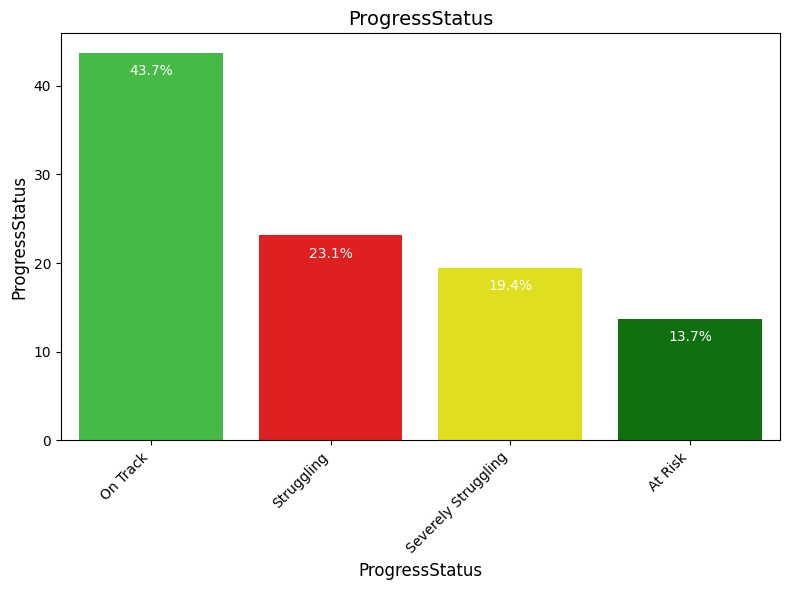

In [423]:
# Plot the histogram
colors = ['#32CD32','red','yellow','green'] # 'orange','chartreuse'
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='ProgressStatus', y='percentage', palette=colors)

# Annotate each bar with the number of orders inside the bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height - 2.5, f"{round(float(height),1)}%", ha="center", fontsize=10, color='white')

# Customize plot labels and title
plt.xlabel('ProgressStatus', fontsize=12)
plt.ylabel('ProgressStatus', fontsize=12)
plt.title('ProgressStatus', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [424]:
#Drop HouseHoldID
cols = ['HouseHoldID']
data = data.drop(columns=cols,axis=1)

In [425]:
# Define feature types
numeric_features = data.select_dtypes(exclude='object').columns
categorical_features = data.select_dtypes(include='object').columns

In [426]:
print(numeric_features)

Index(['HouseholdSize', 'TimeToOPD', 'TimeToWater', 'AgricultureLand',
       'Season1CropsPlanted', 'Season2CropsPlanted', 'PerennialCropsGrown',
       'VSLA_Profits', 'VSLA_Profits.1', 'Season1VegetableIncome',
       'Season2VegatableIncome', 'VegetableIncome', 'Season1VegetableValue',
       'Season2VegetableValue', 'SeasonalVegetableValue', 'FormalEmployment',
       'PersonalBusinessAndSelfEmployment', 'CasualLabour',
       'RemittancesAndGifts', 'RentIncome', 'Season1CropIncome',
       'Season2CropIncome', 'SeasonalCropIncome', 'PerenialCropIncome',
       'LivestockIncome', 'Season1AgricValue', 'Season2AgricValue',
       'SeasonalAgricValue', 'PerennialAgricValue', 'AgricValue',
       'LivestockIncomeConsumed', 'LivestockAssetValue', 'HouseholdIcome',
       'Consumption+Residues', 'HHIncome+Consumption+Residues',
       'HHIncome+Consumption+Assets+Residues', 'Assets', 'Assets.1',
       'HHIncome/Day', 'Consumption/Day',
       'HHIncome+Consumption+Assets+Residues/Day',

In [427]:
print(categorical_features)

Index(['District', 'Cluster', 'Village', 'business_number', 'Loan_from',
       'food_banana_wilt_diseases', 'ProgressStatus'],
      dtype='object')


In [428]:
#ProgressStatus before Encoding
data['ProgressStatus'].value_counts()

ProgressStatus
On Track               1704
Struggling              901
Severely Struggling     757
At Risk                 535
Name: count, dtype: int64

In [429]:
#Encoding all the categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['ProgressStatus'] = label_encoder.fit_transform(data['ProgressStatus'])
data['District'] = label_encoder.fit_transform(data['District'])
data['Cluster'] = label_encoder.fit_transform(data['Cluster'])
data['Village'] = label_encoder.fit_transform(data['Village'])

data['business_number'] = label_encoder.fit_transform(data['business_number'])
data['Loan_from'] = label_encoder.fit_transform(data['Loan_from'])
data['food_banana_wilt_diseases'] = label_encoder.fit_transform(data['food_banana_wilt_diseases'])

In [430]:
#ProgressStatus After Encoding, To be used At a later stage in defining the prediction function
data['ProgressStatus'].value_counts()

ProgressStatus
1    1704
3     901
2     757
0     535
Name: count, dtype: int64

In [431]:
#Model Development

In [432]:
#Non ML model
#Multinomial Logistic Regression

In [433]:
data.head()

District  Cluster  Village  HouseholdSize  TimeToOPD  TimeToWater  \
0         0       13       34              3         60         35.0   
1         0        5      122              3        120         10.0   
2         0        0       11              2         40         10.0   
3         0        0       11              8         15         40.0   
4         0        0       49              5        120         51.0   

   AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0         0.250000                    0                    6   
1         1.000000                    2                    3   
2         1.583627                    3                    3   
3         1.000000                    2                    4   
4         1.000000                    2                    2   

   PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0                    1             0        0.000000                0.000000   
1                    3             0        0.000000                0.000000   
2                    2             0        0.000000                0.000000   
3                    4         20000        4.481111                0.000000   
4                    1             0        0.000000               22.405556   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                     0.0         0.000000               3.920972   
1                     0.0         0.000000               0.000000   
2                     0.0         0.000000               0.672167   
3                     0.0         0.000000               6.945722   
4                     0.0        22.405556              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0         0.0           0.000000          45.931389           45.931389   
1         0.0           0.000000          13.219278           13.219278   
2         0.0          43.018667          21.285278           64.303944   
3         0.0         123.230556           3.360833          126.591389   
4         0.0          22.405556           0.896222           23.301778   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0           31.367778              0.0           3.920972         115.500639   
1          103.065556              0.0          57.694306          75.058611   
2           14.787667              0.0          89.398167          55.005639   
3           27.782889              0.0         175.077011          87.381667   
4            0.000000              0.0          67.664778          35.624833   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0          119.421611           109.787222  229.208833   
1          132.752917           170.282222  303.035139   
2          144.403806            34.952667  179.356472   
3          262.458678            62.735556  325.194233   
4          103.289611           197.168889  300.458500   

   LivestockIncomeConsumed  LivestockAssetValue  HouseholdIcome  \
0                      0.0             0.000000      155.718611   
1 

In [434]:
# Features and target variable
X = data.drop(columns=['ProgressStatus'])
y = data['ProgressStatus']

In [435]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X =st.fit_transform(X)

In [436]:
X

array([[-1.44439954,  1.21853421, -0.92993521, ...,  0.08035304,
         0.20103174,  0.82490346],
       [-1.44439954, -0.53316139,  1.07123359, ...,  0.08035304,
         0.20103174, -1.21226307],
       [-1.44439954, -1.62797115, -1.45296797, ...,  0.08035304,
        -4.17562021,  0.82490346],
       ...,
       [ 0.2936968 ,  0.34268641,  0.16161141, ...,  0.08035304,
         0.20103174,  0.82490346],
       [ 0.2936968 ,  0.99957226, -1.06637854, ...,  0.08035304,
         0.20103174,  0.82490346],
       [ 0.2936968 ,  0.34268641, -1.47570852, ...,  0.08035304,
         0.20103174,  0.82490346]])

In [437]:
print("Features shape:", X.shape)
print("Target shape:", len(y))

Features shape: (3897, 73)
Target shape: 3897


In [438]:
# Split data into training and test sets and define a model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [439]:
#Initialize Multinomial Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [440]:
model.fit(X_train, y_train) 

c:\Users\ECO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [441]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Perform cross-validation
score = cross_val_score(model, X, y, cv=5)
    
print(f"{model} accuracy is {round(accuracy * 100, 2)}%")
print("Classification Report:")
print(report)
print(f"{model} Avg cross val score is {np.mean(score)}")

c:\Users\ECO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ECO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ECO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ECO\AppData\Local\Programs\Python\Python312

LogisticRegression(max_iter=1000, multi_class='multinomial') accuracy is 97.31%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       115
           1       1.00      0.99      0.99       347
           2       0.99      0.99      0.99       135
           3       0.95      0.97      0.96       183

    accuracy                           0.97       780
   macro avg       0.96      0.97      0.97       780
weighted avg       0.97      0.97      0.97       780

LogisticRegression(max_iter=1000, multi_class='multinomial') Avg cross val score is 0.953814225996511


c:\Users\ECO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [442]:
#Machine Learning models
#Used Models are Decision tree classifier, Random forest classifer

In [443]:
# Features and target variable
X = data.drop(columns=['ProgressStatus'])
y = data['ProgressStatus']

In [444]:
# Initialize Decision Tree 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [445]:
#Feature selection - Feature Importance  using Recursive Feature Elimination

from sklearn.feature_selection import RFE
# Initialize RFE
selector = RFE(estimator=model, n_features_to_select=20)  
selector = selector.fit(X_train, y_train)
ranking = selector.ranking_

# Create a DataFrame for feature ranking
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
feature_ranking = feature_ranking.sort_values(by='Ranking')

feature_ranking.head(60)

Feature  Ranking
72                  postharvest_food_storage        1
38      HHIncome+Consumption+Assets+Residues        1
39                                    Assets        1
40                                  Assets.1        1
41                              HHIncome/Day        1
42                           Consumption/Day        1
43  HHIncome+Consumption+Assets+Residues/Day        1
44                                   hhh_sex        1
45                            hhh_read_write        1
46                            Material_walls        1
37             HHIncome+Consumption+Residues        1
71                 food_banana_wilt_diseases        1
70                           soil_management        1
69                    water_control_practise        1
68             organic_pesticide_expenditure        1
67                       apply_liquid_manure        1
66                 non_bio_waste_mgt_present        1
65                                  composts        1
64                         dish_rack_present        1
63                            swept_compound        1
62                      bathroom_constructed        2
47                              radios_owned        3
61                             kitchen_house        4
48                              phones_owned        5
60                         standard_hangline        6
49                           business_number        7
59                        soap_ash_available        8
50                               work_casual        9
58                       tippy_tap_available       10
51                             work_salaried       11
57                       latrine_constructed       12
52                               save_mode_7       13
56                               daily_meals       14
53                                 Loan_from       15
55                      household_fertilizer       16
54                        perennial_cropping       17
36                      Consumption+Residues       18
35                            HouseholdIcome       19
34                       LivestockAssetValue       20
33                   LivestockIncomeConsumed       21
32                                AgricValue       22
31                       PerennialAgricValue       23
30                        SeasonalAgricValue       24
29                         Season2AgricValue       25
28                         Season1AgricValue       26
27                           LivestockIncome       27
26                        PerenialCropIncome       28
25                        SeasonalCropIncome       29
24                         Season2CropIncome       30
23                         Season1CropIncome       31
22                                RentIncome       32
21                       RemittancesAndGifts       33
20                              CasualLabour       34
19         PersonalBusinessAndSelfEmployment       35
18                          FormalEmployment       36
17                    SeasonalVegetableValue       37
16                     Season2VegetableValue       38
15                     Season1VegetableValue       39
14                           VegetableIncome       40
13                    Season2VegatableIncome       41

In [446]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X =st.fit_transform(X)

In [447]:
#train the model 
model.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=42)

In [448]:
#test the model & apply K-Fold Cross Validation 

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Perform cross-validation
score = cross_val_score(model, X, y, cv=5)
    
print(f"{model} accuracy is {round(accuracy * 100, 2)}%")
print("Classification Report:")
print(report)   
print(f"{model} Avg cross val score is {np.mean(score)}")

DecisionTreeClassifier(random_state=42) accuracy is 100.0%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       347
           2       1.00      1.00      1.00       135
           3       1.00      1.00      1.00       183

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780

DecisionTreeClassifier(random_state=42) Avg cross val score is 0.9997435897435898


In [449]:
# Initialize Random Classifier and train the model & apply K-Fold Cross Validation 
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model.fit(X_train, y_train)  

RandomForestClassifier()

In [450]:
#Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Perform cross-validation
score = cross_val_score(model, X, y, cv=5)
    
print(f"{model} accuracy is {round(accuracy * 100, 2)}%")
print("Classification Report:")
print(report)   
print(f"{model} Avg cross val score is {np.mean(score)}")

RandomForestClassifier() accuracy is 99.36%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       115
           1       1.00      1.00      1.00       347
           2       1.00      1.00      1.00       135
           3       1.00      0.98      0.99       183

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780

RandomForestClassifier() Avg cross val score is 0.9907629768605378


In [451]:
#Save the best Model
#Decision tree classifier

In [452]:
#Decision Tree (DT)
DT = DecisionTreeClassifier(
    min_samples_split=5,     # Minimum number of samples required to split a node
    min_samples_leaf=5,      # Minimum number of samples required at a leaf node
    max_depth=5,             # Maximum depth of the tree
    max_features='sqrt'      # Number of features to consider when looking for the best split
)

In [453]:
X

array([[-1.44439954,  1.21853421, -0.92993521, ...,  0.08035304,
         0.20103174,  0.82490346],
       [-1.44439954, -0.53316139,  1.07123359, ...,  0.08035304,
         0.20103174, -1.21226307],
       [-1.44439954, -1.62797115, -1.45296797, ...,  0.08035304,
        -4.17562021,  0.82490346],
       ...,
       [ 0.2936968 ,  0.34268641,  0.16161141, ...,  0.08035304,
         0.20103174,  0.82490346],
       [ 0.2936968 ,  0.99957226, -1.06637854, ...,  0.08035304,
         0.20103174,  0.82490346],
       [ 0.2936968 ,  0.34268641, -1.47570852, ...,  0.08035304,
         0.20103174,  0.82490346]])

In [454]:
DT.fit(X,y)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5)

In [455]:
import joblib

In [456]:
joblib.dump(DT,'Progress_Status_Predictor')

['Progress_Status_Predictor']

In [457]:
model = joblib.load('Progress_Status_Predictor')

In [458]:
import pandas as pd
prediction_df = pd.DataFrame({
    'District': ['Kanungu'],
    'Cluster': ['Kihanda'],
    'Village':['Omurwambu'],
    'HouseHoldID':['KAN-PEP-FER-K1768'],
    'HouseholdSize': [4],
    'TimeToOPD': [10],
    'TimeToWater': [30],
    'AgricultureLand': [2.5],
    'Season1CropsPlanted': [4],  
    'Season2CropsPlanted': [3], 
    'PerennialCropsGrown': [2], 
    'VSLA_Profits': [1000],
    'VSLA_Profits.1': [0],
    'Season1VegetableIncome': [10000],
    'Season2VegatableIncome': [8000],
    'VegetableIncome': [18000],
    'Season1VegetableValue': [12000],
    'Season2VegetableValue': [10000],
    'SeasonalVegetableValue': [22000],
    'FormalEmployment': [100000],
    'PersonalBusinessAndSelfEmployment': [50000],
    'CasualLabour': [20000],
    'RemittancesAndGifts': [10000],
    'RentIncome': [5000],
    'Season1CropIncome': [30000],
    'Season2CropIncome': [25000],
    'SeasonalCropIncome': [55000],
    'PerenialCropIncome': [20000],
    'LivestockIncome': [15000],
    'Season1AgricValue': [60000],
    'Season2AgricValue': [55000],
    'SeasonalAgricValue': [115000],
    'PerennialAgricValue': [40000],
    'AgricValue': [155000],
    'LivestockIncomeConsumed': [5000],
    'LivestockAssetValue': [20000],
    'HouseholdIcome':[5000],
    'Consumption+Residues':[10000],
    'HHIncome+Consumption+Residues': [15000],
    'HHIncome+Consumption+Assets+Residues': [19000],
    'Assets': [10000],
    'Assets.1': [8000],
    'HHIncome/Day': [0.28],
    'Consumption/Day': [0.56],
    'HHIncome+Consumption+Assets+Residues/Day': [0.786],
    'hhh_sex': [1],
    'hhh_read_write': [0], 
    'Material_walls': [1],
    'radios_owned': [2],
    'phones_owned': [1],
    'business_number': [1],
    'work_casual':[1],
    'work_salaried': [0],
    'save_mode_7': [0], 
    'Loan_from': [7],
    'perennial_cropping':[1],
    'household_fertilizer': [8],
    'daily_meals': [3],
    'latrine_constructed': [0], 
    'tippy_tap_available': [0],
    'soap_ash_available': [0],
    'standard_hangline': [1],
    'kitchen_house':[0],
    'bathroom_constructed':[0],
    'swept_compound': [1], 
    'dish_rack_present':[0],
    'composts': [0.0],
    'non_bio_waste_mgt_present':[0],
    'apply_liquid_manure': [0],
    'organic_pesticide_expenditure':[10000],
    'water_control_practise': [1], 
    'soil_management':[1],
    'food_banana_wilt_diseases': [1],
    'Postharvest_food_storage': [1]

}, index=[0])

In [459]:
prediction_df

District  Cluster    Village        HouseHoldID  HouseholdSize  TimeToOPD  \
0  Kanungu  Kihanda  Omurwambu  KAN-PEP-FER-K1768              4         10   

   TimeToWater  AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0           30              2.5                    4                    3   

   PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0                    2          1000               0                   10000   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                    8000            18000                  12000   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0                  10000                   22000            100000   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                              50000         20000                10000   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0        5000              30000              25000               55000   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0               20000            15000              60000              55000   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0              115000                40000      155000   

   LivestockIncomeConsumed  LivestockAssetValue  HouseholdIcome  \
0                     5000                20000            5000   

   Consumption+Residues  HHIncome+Consumption+Residues  \
0                 10000                          15000   

   HHIncome+Consumption+Assets+Residues  Assets  Assets.1  HHIncome/Day  \
0                                 19000   10000      8000          0.28   

   Consumption/Day  HHIncome+Consumption+Assets+Residues/Day  hhh_sex  \
0             0.56                                     0.786        1   

   hhh_read_write  Material_walls  radios_owned  phones_owned  \
0               0               1             2             1   

   business_number  work_casual  work_salaried  save_mode_7  Loan_from  \
0                1            1              0            0          7   

   perennial_cropping  household_fertilizer  daily_meals  latrine_constructed  \
0                   1                     8            3                    0   

   tippy_tap_available  soap_ash_available  standard_hangline  kitchen_house  \
0                    0                   0                  1              0   

   bathroom_constructed  swept_compound  dish_rack_present  composts  \
0                     0               1                  0       0.0   

   non_bio_waste_mgt_present  apply_liquid_manure  \
0                          0                    0   

   organic_pesticide_expenditure  water_control_practise  soil_management  \
0                          10000                       1                1   

   food_banana_wilt_diseases  Postharvest_food_storage  
0                          1                         1

In [460]:

prediction_df = prediction_df.drop(columns='HouseHoldID',axis=1)

In [461]:
#Print shape for data used in training data and new prediction data
print("Features shape:", prediction_df.shape)
print("Features shape:", X.shape)

Features shape: (1, 73)
Features shape: (3897, 73)


In [462]:
prediction_df['District'] = label_encoder.fit_transform(prediction_df['District'])
prediction_df['Cluster'] = label_encoder.fit_transform(prediction_df['Cluster'])
prediction_df['Village'] = label_encoder.fit_transform(prediction_df['Village'])
prediction_df['business_number'] = label_encoder.fit_transform(prediction_df['business_number'])
prediction_df['Loan_from'] = label_encoder.fit_transform(prediction_df['Loan_from'])
prediction_df['food_banana_wilt_diseases'] = label_encoder.fit_transform(prediction_df['food_banana_wilt_diseases'])

In [463]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
prediction_df =st.fit_transform(prediction_df)

In [464]:
prediction_df

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [465]:
Progress_Status_Prediction = model.predict(prediction_df)

In [466]:
print(f"Progress Status Computer: {Progress_Status_Prediction}")

Progress Status Computer: [1]


In [467]:
for prediction in Progress_Status_Prediction:
        if prediction == 0:
            print("Progress Status:Household At Risk of Poverty")
        elif prediction == 1:
            print("Progress Status:Household Severely Struggling")
        elif prediction == 2:
            print("Progress Status:Household Struggling")
        else:
            print("Progress Status:Household On Track")

Progress Status:Household Severely Struggling


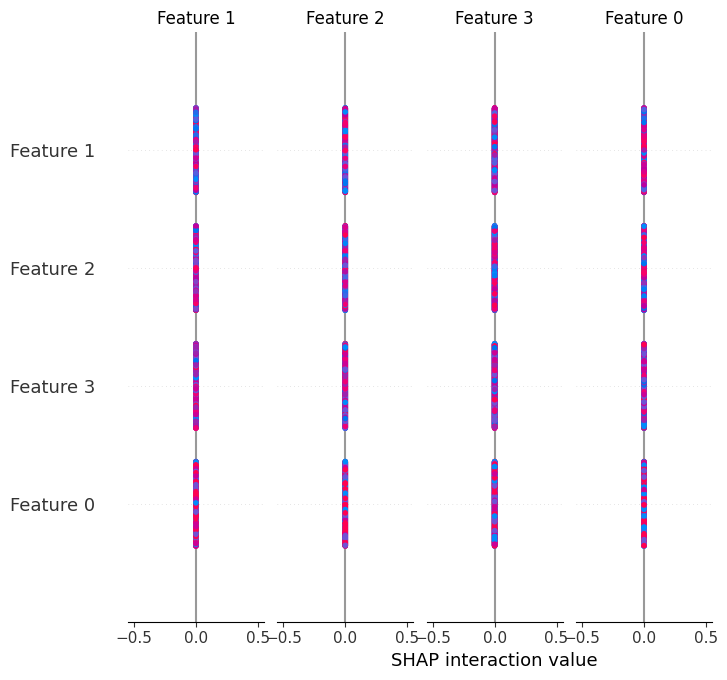

In [470]:
#Model explainability
import shap
explainer = shap.TreeExplainer(model)  # For tree-based models
shap_values = explainer.shap_values(X_test)

# SHAP summary plot (global interpretation)
shap.summary_plot(shap_values, X_test)

In [476]:
import tkinter as tk
from tkinter import *
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Initialize the main application window
master = tk.Tk()
master.title("Household Data Entry")

# Initialize the list to store entry widgets
entries = []

# Create and place labels and entries in a 4-column layout
labels = [
    "District", "Cluster", "Village", "HouseHoldID", "HouseholdSize", "TimeToOPD", "TimeToWater",
    "AgricultureLand", "Season1CropsPlanted", "Season2CropsPlanted", "PerennialCropsGrown",
    "VSLA_Profits", "VSLA_Profits.1", "Season1VegetableIncome", "Season2VegatableIncome",
    "VegetableIncome", "Season1VegetableValue", "Season2VegetableValue", "SeasonalVegetableValue",
    "FormalEmployment", "PersonalBusinessAndSelfEmployment", "CasualLabour", "RemittancesAndGifts",
    "RentIncome", "Season1CropIncome", "Season2CropIncome", "SeasonalCropIncome", "PerenialCropIncome",
    "LivestockIncome", "Season1AgricValue", "Season2AgricValue", "SeasonalAgricValue",
    "PerennialAgricValue", "AgricValue", "LivestockIncomeConsumed", "LivestockAssetValue",
    "HouseholdIcome", "Consumption+Residues", "HHIncome+Consumption+Residues",
    "HHIncome+Consumption+Assets+Residues", "Assets", "Assets.1", "HHIncome/Day", "Consumption/Day",
    "HHIncome+Consumption+Assets+Residues/Day", "hhh_sex", "hhh_read_write", "Material_walls",
    "radios_owned", "phones_owned", "business_number", "work_casual", "work_salaried", "save_mode_7",
    "Loan_from", "perennial_cropping", "household_fertilizer", "daily_meals", "latrine_constructed",
    "tippy_tap_available", "soap_ash_available", "standard_hangline", "kitchen_house",
    "bathroom_constructed", "swept_compound", "dish_rack_present", "composts", "non_bio_waste_mgt_present",
    "apply_liquid_manure", "organic_pesticide_expenditure", "water_control_practise", "soil_management",
    "food_banana_wilt_diseases", "Postharvest_food_storage"
]

# Create and place labels and entries in a 4-column layout
max_columns = 4
rows = (len(labels) + max_columns - 1) // max_columns  # Calculate the number of rows needed

for i, label in enumerate(labels):
    row = i // max_columns
    column = i % max_columns
    tk.Label(master, text=label).grid(row=row, column=column*2, padx=3, pady=3, sticky='e')
    entry = tk.Entry(master)
    entry.grid(row=row, column=column*2+1, padx=3, pady=3)
    entries.append(entry)


def show_entry():
    # Retrieve data from entries
    data = {label: entry.get() for label, entry in zip(labels, entries)}
    
    # Convert to DataFrame
    input_data_df = pd.DataFrame(data, index=[0])
    
    # Drop unnecessary columns
    input_data_df = input_data_df.drop(columns='HouseHoldID', axis=1)
    
    # Transform categorical variables
    categorical_columns = ['District', 'Cluster', 'Village', 'business_number', 'Loan_from', 'food_banana_wilt_diseases']
    for column in categorical_columns:
        if column in input_data_df.columns:
            input_data_df[column] = label_encoder.transform(input_data_df[column])
    
    # Standardize the input data
    st = StandardScaler()
    input_data_df = st.fit.transform(input_data_df)
    
    # Perform model prediction
    Progress_Status_Prediction = model.predict(input_data_df)
    
    # Display prediction results
    prediction_label = {
        0: "Progress Status: Household At Risk of Poverty",
        1: "Progress Status: Household Severely Struggling",
        2: "Progress Status: Household Struggling",
        3: "Progress Status: Household On Track"
    }
    
    result = prediction_label.get(Progress_Status_Prediction[0], "Unknown Status")
    tk.Label(master, text=result).grid(row=rows, column=0, columnspan=max_columns*2, pady=10)

# Create and place a button to call the show_entry function
tk.Button(master, text="Predict Household Status", command=show_entry).grid(row=rows, column=0, columnspan=max_columns*2, pady=10)

# Run the application
master.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\ECO\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\ECO\AppData\Local\Temp\ipykernel_13908\599911966.py", line 62, in show_entry
    input_data_df[column] = label_encoder.transform(input_data_df[column])
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ECO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py", line 132, in transform
    y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ECO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1381, in column_or_1d
    y = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\ECO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\